# Inicio

## Pacotes

In [1]:
import math
import pandas as pd
pd.set_option('display.max_colwidth', 255)
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams.update({
    #"axes.unicode_minus" : False,
    "font.family": "serif",  # use serif/main font for text elements
    "font.serif" : "Computer Modern Roman",
    "font.sans-serif" : "Computer Modern Sans serif",
    "font.monospace"  : "Computer Modern Typewriter",
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters   
    #"figure.figsize": [18,7],
    "axes.titlesize": "xx-large",   # fontsize of the axes title
    "axes.labelsize": "xx-large",  # fontsize of the x any y labels
    "xtick.labelsize": "xx-large",  # font size of the tick labels
    "ytick.labelsize": "xx-large",  # font size of the tick labels
    "legend.fontsize":   "large",
    #"pgf.preamble": "\n".join([
         #r"\usepackage{url}",            # load additional packages
         #r"\usepackage{unicode-math}",   # unicode math setup
         #r"\setmainfont{DejaVu Serif}",  # serif font via preamble

    #])
})


import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import scipy.stats
import random

with open('res_sub_tab.txt', 'w') as res_sub_tab:
    res_sub_tab.write('Tabelas Latex para os resultados dos métodos subjetivos')
    res_sub_tab.write('\n')
    res_sub_tab.close()

#Cores
ccmLBlue = (0.170/0.255,0.200/0.255,0.230/0.255)
ccmBlue = (0.020/0.255,0.080/0.255,0.200/0.255)
ccmDBlue = (0.025/0.255,0.050/0.255,0.120/0.255)
ccmRed = (0.190/0.255,0.0,0.0)
ccmOrange = (0.255/0.255,0.100/0.255,0.0)
ccmLGray = (0.210/0.255,0.210/0.255,0.210/0.255)
ccmDGray = (0.085/0.255,0.085/0.255,0.085/0.255)

cor1 = ccmRed
cor2 = ccmDBlue
cor3 = ccmLGray
cor4 = ccmOrange
cor5 = ccmLBlue
cor6 = ccmDGray
cor7 = ccmBlue

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))
plt.rcParams.update({'font.size': 22})

csvPreparado = False

plotarSinal = True


## Funções

### Segundos para minutos

In [2]:
def ToMinute(time):

    m = '{timeM}:{timeS:02d}'.format(timeM = int(time/60), timeS = int(time%60))

    return m

#print('Se a diferença entre alguma média for superior a {dun:.2f} então a hipótese alternativa pode ser valida para essa determinada comparação'.format(dun = dun))

### Slice de um dicionario

In [3]:
# ----------------------------------------------------------------------------------------------------------------------------
# Essa função faz o slice de um dicionario
# ----------------------------------------------------------------------------------------------------------------------------

def slice_dic(entrada,inicio,fim):
    # Checar se as entradas e saídas existem
    keys_set = set(entrada.keys())
    bol_inicio = inicio in keys_set
    bol_fim = fim in keys_set
    while bol_fim == False:
        fim = fim - 1
        bol_fim = fim in keys_set

    saida = {}
    keys = range(inicio,fim)
    for key in keys:
        saida[key] = entrada[key]
    return saida

### Filtro ECG

In [4]:
def filtro_ecg(listaECG, N, Fs, Wn):

    time = listaECG.iloc[:,0]
    sig = listaECG.iloc[:,1]
    sos = signal.butter(N, Wn, btype='band', analog=False, output='sos', fs=Fs)
    filtered = signal.sosfilt(sos, sig)
    sp = np.fft.fft(sig)

    n_graficos = 2
    plt.figure(figsize=[20,10 * n_graficos])
    plt.subplot(2,1,1)
    plt.plot(time,sig)
    plt.title('Sinal Original')
    plt.subplot(2,1,2)
    plt.plot(time,filtered)
    #plt.ylim([-500,500])
    plt.title('Sinal filtrado')

### Intervalo entre picos ECG

In [5]:
# ----------------------------------------------------------------------------------------------------------------------------
# Essa função calcula o intervalo de tempo entre picos
# ----------------------------------------------------------------------------------------------------------------------------

def funcao_dif_pico(pico_rr_t):
    nni = []
    i = 0
    while i < (len(pico_rr_t) - 1):
        nni.append(pico_rr_t[i+1] - pico_rr_t[i])
        i = i + 1
    return nni

### Variação Sensores

#### Variação sem Baseline

In [6]:
def variacaoSensoresSemBaseline(dados):

    indexDef = list(zip(i1,i2,['First','Return']*10))
    indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
    indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

    df = pd.DataFrame([],columns = nomeCenasSensores,index = indexDefPrint)

    dados_var_cen_par = []

    for p in range(len(participantes)):
        dadosPorCena_var_cen_par = []
        for c in range(len(cenas) + 1):
            #if c == 0:
                #baseline = dados[p][0][0]
                #df.iloc[p*2,c] = baseline
                #df.iloc[p*2+1,c] = np.nan
            if c != 0:
                dadosPorEtapa_var_cen_par = []
                for e in range(len(etapas)):
                    valorDados = dados[p][c][e]
                    df.iloc[p*2+e,c] = valorDados
                valorFirst = dados[p][c][0]
                valorReturn = dados[p][c][1]
                dadosPorCena_var_cen_par.append(valorReturn-valorFirst)
        dados_var_cen_par.append(dadosPorCena_var_cen_par)

    df.set_index(indexDef, inplace = True)
    df.drop("Baseline", axis = 1, inplace = True)

    indexDef = list(zip(participantes.index,participantes.iloc[:,4]))
    indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition"])
    indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"])

    df_var = pd.DataFrame([], columns=nomeCenas, index = indexDef)
    for p in range(len(participantes)):
        for e in range(len(etapas)):
            for c in range(len(cenas)):
                df_var.loc[(df_var.index[p][0]),df_var.columns[c]] = dados_var_cen_par[p][c]

    return df.astype(float), df_var

#### Variação Baseline

In [7]:
def variacaoSensores(dados):

    df = pd.DataFrame([],columns = nomeCenasSensores,index = indexDefPrint)

    dados_var_cen_par = []

    for p in range(len(participantes)):
        dadosPorCena_var_cen_par = []
        for c in range(len(cenas) + 1):
            if c == 0:
                baseline = dados[p][0][0]
                df.iloc[p*2,c] = baseline
                df.iloc[p*2+1,c] = np.nan
            else:
                dadosPorEtapa_var_cen_par = []
                for e in range(len(etapas)):
                    #print(ecgDados[p][c][:])
                    #print(np.mean(ecgDados[p][c][:]))
                    valorDados = dados[p][c][e]
                    df.iloc[p*2+e,c] = valorDados
                    dadosPorEtapa_var_cen_par.append((valorDados-baseline)/baseline*100)
                dadosPorCena_var_cen_par.append(dadosPorEtapa_var_cen_par)
        dados_var_cen_par.append(dadosPorCena_var_cen_par)

    df_var = pd.DataFrame([], columns=nomeCenas, index = indexDef)
    for p in range(len(participantes)):
        for e in range(len(etapas)):
            for c in range(len(cenas)):
                df_var.loc[(df_var.index[p*2][0]),df_var.columns[c]] = dados_var_cen_par[p][c]
    df.set_index(indexDef, inplace = True)
    return df.astype(float), df_var

#### Média entre as Etapas

In [8]:
def mediaSensoresEtapas(dados):

    df = pd.DataFrame([],columns = nomeCenasSensores,index = indexDefPrint)

    dados_avg_cen_par = []

    for p in range(len(participantes)):
        dadosPorCena_var_cen_par = []
        for c in range(len(cenas)):
            valorPrimeira = dados.iloc[p*2,c]
            valorRetorno = dados.iloc[p*2+1,c]
            df.iloc[p*2,c] = valorPrimeira
            df.iloc[p*2+1,c] = valorRetorno
            dadosPorCena_var_cen_par.append((valorRetorno+valorPrimeira)/2)
        dados_avg_cen_par.append(dadosPorCena_var_cen_par)

    df_avg = pd.DataFrame(dados_avg_cen_par, columns=nomeCenas, index = participantes.index)
    df.set_index(indexDef, inplace = True)
    df_avg = pd.concat([df_avg,participantes.loc[:,'Deficiência visual']],axis = 1)
    df_avg.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
    df_avg.index.names = ['Participant']

    return df_avg


#### Variação entre etapas

In [9]:
#def variacaoSensoresEtapas (dados):
#
#    df = pd.DataFrame([],columns = nomeCenasSensores,index = indexDefPrint)
#
#    dados_var_cen_par = []
#
#    for p in range(len(participantes)):
#        dadosPorCena_var_cen_par = []
#        for c in range(len(cenas) + 1):
#            if c == 0:
#                baseline = dados[p][0][0]
#                df.iloc[p*2,c] = baseline
#                df.iloc[p*2+1,c] = np.nan
#            else:
#                valorPrimeira = dados[p][c][0]
#                valorRetorno = dados[p][c][1]
#                df.iloc[p*2,c] = valorPrimeira
#                df.iloc[p*2+1,c] = valorRetorno
#                dadosPorCena_var_cen_par.append((valorRetorno-valorPrimeira)/np.abs(valorPrimeira)*100)
#        dados_var_cen_par.append(dadosPorCena_var_cen_par)
#
#    df_var = pd.DataFrame(dados_var_cen_par, columns=nomeCenas, index = participantes.index)
#    df.set_index(indexDef, inplace = True)
#    df_var = pd.concat([df_var,participantes.loc[:,'Deficiência visual']],axis = 1)
#    df_var.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
#    df_var.index.names = ['Participant']
#
#    return df.astype(float), df_var


In [10]:
def variacaoSensoresEtapas (dados):

    df = pd.DataFrame([],columns = nomeCenasSensores,index = indexDef)

    dados_var_cen_par = []

    for p in range(len(participantes)):
        dadosPorCena_var_cen_par = []
        for c in range(len(cenas)):
            valorPrimeira = dados.iloc[p*2,c]
            #print(valorPrimeira)
            valorRetorno = dados.iloc[p*2+1,c]
            #print(valorRetorno)
            df.iloc[p*2,c] = valorPrimeira
            df.iloc[p*2+1,c] = valorRetorno
            dadosPorCena_var_cen_par.append((valorRetorno-valorPrimeira)/np.abs(valorPrimeira)*100)
            #print(dadosPorCena_var_cen_par)
        dados_var_cen_par.append(dadosPorCena_var_cen_par)

    df_var = pd.DataFrame(dados_var_cen_par, columns=nomeCenas, index = participantes.index)
    df.set_index(indexDef, inplace = True)
    df_var = pd.concat([df_var,participantes.loc[:,'Deficiência visual']],axis = 1)
    df_var.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
    df_var.index.names = ['Participant']

    #return df.astype(float), df_var
    return df_var


### Variação Sensores geral

In [11]:
def variacaoSensoresGeral(dados):

    aux = dados.reset_index(level = 1)#.groupby(by = 'Visual Condition').mean()
    for c in range(len(aux.columns)):
        if c != 0:
            aux = aux.astype({aux.columns[c]:'float'})
        else:
            aux = aux.astype({aux.columns[c]:'category'})
    aux.dtypes

    df = aux.groupby(by = 'Visual Condition').mean()
    return df

### Tabela Latex

In [12]:
def TabelaLatex(df,label,caption,teste, colformat, floatBarrier = False, escape = True, printTable = False):
    if colformat == "":
        colformat = 'l'*(len(df.columns) + len(df.index.names))
    tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
    if printTable:
        print(tabela)
    caminho = teste + '/Tabelas/' + label[4:] + '.tex'

    with open(caminho, 'w') as res_sub_tab:
        #res_sub_tab.write('\n' +'\n' + caption + '\n')
        res_sub_tab.write('\n' + tabela + '\n')
        if floatBarrier == True:
            res_sub_tab.write('\n \FloatBarrier \n')

def TabelaLatexSemIndex(df,label,caption,teste,colformat,floatBarrier = False, escape = True, printTable = False):
    if colformat == "":
        colformat = 'l'*(len(df.columns) + len(df.index.names))
    tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat) 
    if printTable:
        print(tabela)
    caminho = teste + '/Tabelas/' + label[4:] + '.tex'

    with open(caminho, 'w') as res_sub_tab:
        #res_sub_tab.write('\n' +'\n' + caption + '\n')
        res_sub_tab.write('\n' + tabela + '\n')
        if floatBarrier == True:
            res_sub_tab.write('\n \FloatBarrier \n')

### Tabela Latex (sem \begin{table})

In [13]:
def TabelaLatexSemBegin(df,label,caption,teste, colformat, floatBarrier = False, escape = True, printTable = False):
    if colformat == "":
        colformat = 'l'*(len(df.columns) + len(df.index.names))
    tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)[20:-13]
    if printTable:
        print(tabela)
    caminho = teste + '/Tabelas/' + label[4:] + 'SemBegin.tex'

    with open(caminho, 'w') as res_sub_tab:
        #res_sub_tab.write('\n' +'\n' + caption + '\n')
        res_sub_tab.write('\n' + tabela + '\n')
        if floatBarrier == True:
            res_sub_tab.write('\n \FloatBarrier \n')

def TabelaLatexSemIndexSemBegin(df,label,caption,teste,colformat,floatBarrier = False, escape = True, printTable = False):
    if colformat == "":
        colformat = 'l'*(len(df.columns) + len(df.index.names))
    tabela = pd.DataFrame.to_latex(df, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)[20:-13]
    if printTable:
        print(tabela)
    caminho = teste + '/Tabelas/' + label[4:] + 'SemBegin.tex'

    with open(caminho, 'w') as res_sub_tab:
        #res_sub_tab.write('\n' +'\n' + caption + '\n')
        res_sub_tab.write('\n' + tabela + '\n')
        if floatBarrier == True:
            res_sub_tab.write('\n \FloatBarrier \n')

### Tabela Longa

In [14]:
def TabelaLonga(df):
    sensoresNomes = ['BL','BF','BR','AF','AR','HF','HR','VF','VR','MF','MR']
    dfNomes = ['Baseline','Base','Audio','Haptic Belt','Virtual Cane','Mixture']
    particNomes = participantes.index.values
    dfGeral = pd.DataFrame([],columns = dfNomes)

    for p in range(len(df)):
        dfAux = pd.DataFrame([])
        for c in range(len(df[p])):
            aux = df[p][c].iloc[:,2]
            aux.name = sensoresNomes[c]
            dfAux = pd.concat([dfAux,aux],axis = 1)

        dfFirst = dfAux.iloc[:,[0,1,3,5,7,9]]
        dfFirst = pd.concat({'First': dfFirst}, names=['Round'])
        dfFirst.columns = dfNomes
        dfReturn = dfAux.iloc[:,[0,2,4,6,8,10]]
        dfReturn = pd.concat({'Return': dfReturn}, names=['Round'])
        dfReturn.columns = dfNomes
        dfPartic = pd.concat([dfFirst,dfReturn])
        dfPartic = pd.concat({particNomes[p]: dfPartic}, names=['Participant'])
        dfPartic = dfPartic.reset_index(level = [0,1])
        dfGeral = pd.concat([dfGeral,dfPartic],axis = 0,ignore_index=True)
    #dfGeral
    #dfPartic
    dfParticMelt = pd.melt(dfGeral, id_vars=['Participant','Round'], value_vars=dfNomes, var_name='Scene', value_name='GSR', col_level=None, ignore_index=True)

    return dfParticMelt

### Teste Shapiro

In [15]:
def TesteShapiro(dados):

    aux = dados
    blind = aux.reset_index(level = 1)[aux.reset_index(level = 1)['Visual Condition'] == 'Blind']
    sight = aux.reset_index(level = 1)[aux.reset_index(level = 1)['Visual Condition'] == 'Sight']

    mdShapiro = []
    for m in nomeCenas:
        #print('Shapiro ' + s)
        _, pBlind = stats.shapiro(blind[m])
        _, pSight = stats.shapiro(sight[m])
        #print(p)
        if pBlind >= 0.05:
            shapDict = [m + ' blinded users', pBlind]
            mdShapiro.append(shapDict)
        else:
            shapDict = [m + ' blinded users', '{:.3f}**'.format(pBlind)]
            mdShapiro.append(shapDict)
        if pSight >= 0.05:
            shapDict = [m + ' sighted users', pSight]
            mdShapiro.append(shapDict)
        else:
            shapDict = [m + ' sighted users', '{:.3f}**'.format(pSight)]
            mdShapiro.append(shapDict)
    mdShapiro = pd.DataFrame(mdShapiro,columns = ['Method', 'Shapiro P-Value'])
    return mdShapiro    

### Teste T

In [16]:
def TesteT(dados):

    aux = dados
    try:
        blind = aux.reset_index(level = 1)[aux.reset_index(level = 1)['Visual Condition'] == 'Blind']
        sight = aux.reset_index(level = 1)[aux.reset_index(level = 1)['Visual Condition'] == 'Sight']
    except:
        blind = aux[aux['Visual Condition'] == 'Blind']
        sight = aux[aux['Visual Condition'] == 'Sight']

    tTest = []
    for m in nomeCenas:
        #print('Teste T ' + m)
        _, p =stats.ttest_ind(blind[m],sight[m])
        #print(p)
        if p >= 0.05:
            dictT = [m, p]
            tTest.append(dictT)
        else:
            dictT = [m, '{:.3f}**'.format(p)]
            tTest.append(dictT)
    tTest = pd.DataFrame(tTest,columns = ['Method', 'T-Test P-Value'])
    return tTest

### Teste anova

In [17]:
def TesteAnova(dados,teste,label):
    aux = dados
    anova = aux[aux['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1)
    res_amostras = pd.DataFrame([], columns=anova.columns, index = anova.index)
    anovaArray = []
    anovaErroArray = []
    plt.figure(num = 1, figsize = tamanhoBarra2)
    for a in anova.columns:
        res_amostras_a = []
        for n_ij in anova[a]:
            res_amostras_a.append(n_ij - np.mean(anova[a]))
            anovaErroArray.append(n_ij - np.mean(anova[a]))
            anovaArray.append(n_ij)
        res_amostras[a] = res_amostras_a
        #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
        #plt.show()
    #for a in anova[anova['Round'] == 'First']:
        if res_amostras.shape[0] == 8:
            plot = res_amostras.iloc[[0,2,4,6],:]
            sns.residplot(y=a, x=list(range(len(plot.index))), data = plot, color = ccmBlue, label = 'First visit')
            plot = res_amostras.iloc[[1,3,5,7],:]
            sns.residplot(y=a, x=list(range(len(plot.index))), data = plot, color = ccmRed, label = 'Return')
        else:
            plot = res_amostras
            sns.residplot(y=a, x=list(range(len(plot.index))), data = plot, color = ccmBlue, label = 'First visit')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(handles = by_label.values(), labels = by_label.keys(),bbox_to_anchor=(1, 1.26), loc='upper right', borderaxespad=0)
    plt.title('Residues plot')
    plt.ylabel('Residuals')
    try:
        if len(anova.reset_index(level = 1).index) == 8:
            tickPos = list(range(0+.5,len(anova.reset_index(level = 1).index)+.5,2))
            print(tickPos)
            tickLab = anova.index.unique()
            plt.xticks(tickPos, tickLab)
        else:
            tickPos = list(range(len(anova.reset_index(level = 1).index)))
            plt.xticks(tickPos, anova.reset_index(level = 1).index)
    except:
        if len(anova.index) == 8:
            tickPos = [0,1,2,3]
            print(tickPos)
            tickLab = anova.index.unique()
            plt.xticks(tickPos, tickLab)
        else:
            tickPos = list(range(len(anova.index)))
            print(tickPos)
            plt.xticks(tickPos, anova.index)
    plt.xlabel('Participants')
    plt.savefig(teste + '/Figuras/png/residplot_' + label + '.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/residplot_' + label + '.pgf',bbox_inches='tight')
    plt.show()
    plt.figure(figsize = tamanhoBarra2)
    stats.probplot(anovaErroArray, plot=plt)
    plt.savefig(teste + '/Figuras/png/qqplot_' + label + '.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/qqplot_' + label + '.pgf',bbox_inches='tight')
    plt.show()
    return anova

### Tabela Anova

In [18]:
def AnovaTable(df):
    totalGeral = sum(sum(df.values))
    N = sum(df.count())
    replicas = df.count()[0]
    fatores = len(df.columns)
    mediaGeral = totalGeral/N

    # Somatória dos erros
    SS_t = 0
    SS_f = 0
    for a in df.columns:
        somaFator = 0
        SS_i = 0
        for n_ij in df[a]:
            SS_ij = (n_ij-mediaGeral)**2
            somaFator = somaFator + n_ij
            SS_t = SS_t + SS_ij
        SS_f = SS_f + (somaFator/len(df[a]) - mediaGeral)**2
    SS_f = SS_f*replicas
    SS_e = SS_t - SS_f
    SS_lista = [SS_f, SS_e, SS_t]
    #SS_lista = [int(SS_f), int(SS_e), int(SS_t)]

    # Graus de liberdade
    gL_1 = len(df.columns) - 1
    gL_2 = N - len(df.columns)
    gL = gL_1 + gL_2
    gL_lista = [gL_1, gL_2, gL]

    # Média dos erros
    MS_f = SS_f/gL_1
    MS_e = SS_e/gL_2
    MS_lista = [MS_f, MS_e, '']
    #MS_lista = [int(MS_f), int(MS_e), '']

    # Fator F
    F = MS_f/MS_e
    F_lista = [F,'' ,'' ]

    # p-Value
    p_value = stats.f.sf(F, gL_1, gL_2, loc=0, scale=1)
    P_value_list = [p_value, '', '']

    Fonte = ['Between factors', 'Inside factors', 'Total']
    colPValue = r'\begin{tabular}[c]{@{}l@{}}P-Value \\ $(F_{0} > F)$\end{tabular}'

    df_summary = pd.DataFrame([], columns = ['Source', 'Squared sum', 'DOF', 'Squared average', 'F', colPValue])
    df_summary['Source'] = Fonte 
    df_summary['Squared sum'] = SS_lista
    df_summary['DOF'] = gL_lista
    df_summary['Squared average'] = MS_lista
    df_summary['F'] = F_lista
    df_summary[colPValue] = P_value_list

    print(df_summary.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_summary

def BlockedAnovaTable(df,blocos, alpha):
    totalGeral = sum(sum(df.values))
    N = sum(df.count())
    fatores = len(df.columns)

    fatorCorrecao = totalGeral**2/(N)

    somaTodos = 0
    somaFator = 0
    somaBloco = 0
    for c in range(len(df.columns)):
        for i in range(len(df.index)):
            n_ij = df.iloc[i,c]
            somaTodos = somaTodos + n_ij**2
            if (c%fatores == 0):
                somaBloco = df.iloc[i,c:c+fatores].sum().sum()**2 + somaBloco
            if (i%blocos == 0):
                somaFator = df.iloc[i:i+blocos,c].sum().sum()**2 + somaFator
    SS_t = somaTodos - fatorCorrecao
    SS_f = somaFator/blocos - fatorCorrecao
    SS_b = somaBloco/fatores - fatorCorrecao
    SS_e = SS_t - SS_b - SS_f
    
    #SS_lista = [SS_f, SS_b, SS_e, SS_t]
    SS_lista = [SS_b, SS_f, SS_e, SS_t]

    # Graus de liberdade
    gL_f = fatores - 1
    gL_b = blocos - 1
    gL_e = gL_f*gL_b
    gL = N - 1
    #gL_lista = [gL_f, gL_b, gL_e,  gL]
    gL_lista = [gL_b, gL_f, gL_e,  gL]

    # Média dos erros
    MS_f = SS_f/gL_f
    MS_e = SS_e/gL_e
    MS_b = SS_b/gL_b
    MS_lista = [MS_f, MS_b, MS_e, '']

    # Fator F
    F_f = MS_f/MS_e
    F_b = MS_b/MS_e
    #F_lista = [F_f, F_b,'' ,'' ]
    F_lista = [F_b, F_f,'' ,'' ]

    # p-Value
    p_value_f = scipy.stats.f.sf(F_f, gL_f, gL_e, loc=0, scale=1)
    if p_value_f < 0.05:
        p_value_f = '{:.3f}**'.format(p_value_f)
    p_value_b = scipy.stats.f.sf(F_b, gL_b, gL_e, loc=0, scale=1)
    if p_value_b < 0.05:
        p_value_b = '{:.3f}**'.format(p_value_b)
    #p_value_list = ['' ,p_value_f, '', '']
    p_value_list = [p_value_f]

    p_value_list_print = []
    for p in p_value_list:
        if type(p) != str:
            if p < 0.05:
                p_value_list_print.append('{:.3f}**'.format(p)) 
            else:
                p_value_list_print.append('{:.3f}'.format(p))
        else:
            p_value_list_print.append('{}'.format(p))

    #Fonte = ['Participants (blocks)', 'Method', 'Experimental error', 'Total']
    Fonte = ['Method']
    #colPValue = r'\begin{tabular}[c]{@{}l@{}}P-Value \\ $(F_{0} > F)$\end{tabular}'
    colPValue = 'P-Value'

    df_summary = pd.DataFrame([], columns = ['Source', colPValue]) #['Source', 'Squared sum', 'DOF', 'Squared average', 'F', colPValue])
    df_summary['Source'] = Fonte
    #df_summary['Squared sum']  = SS_lista
    #df_summary['DOF'] = gL_lista
    #df_summary['Squared average'] = MS_lista
    #df_summary['F'] = F_lista
    df_summary[colPValue] = p_value_list_print

    print(df_summary.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    colMetodo = r'\multicolumn{3}{c}{Method}'
    colAnalysis = r'\multicolumn{2}{c}{Analysis}'
    nomeFatores = df.columns

    df_postHoc = pd.DataFrame([], columns = [colMetodo, colAnalysis])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in df.columns:
        somaFator = 0
        for n_ij in df[a]:
            somaFator = somaFator + n_ij
        mediaFator.append(somaFator/len(df[a]))
    i = 0
    while i < len(mediaFator):
        j = 0
        while j < len(mediaFator):
            if (i<j and i!=j):
                comparacaoLista.append(nomeFatores[i] + r' & $X$ & ' + nomeFatores[j])
                if (abs(mediaFator[i] - mediaFator[j])>=LSD):
                    #r'$f_{{in,{0}}}$'.format('a')
                    resultadoLista.append(r'$H_1 : \mu_{' + nomeFatores[i] + '} \ne \mu_{' + nomeFatores[j] + '}$ & **')
                    #resultadoLista.append(r'$**H_1 : \mu_' + nomeFatores[i] + ' != \mu_' + nomeFatores[j] + '**')
                else:
                    resultadoLista.append(r'$H_0 : \mu_{' + nomeFatores[i] + '} = \mu_{' + nomeFatores[j] + '}$ & ')
                    #resultadoLista.append('H_0 : \mu_' + nomeFatores[i] + ' == \mu_' + nomeFatores[j])
            j = j + 1
        i = i + 1
    df_postHoc[colMetodo] = comparacaoLista
    df_postHoc[colAnalysis] = resultadoLista
    print('If the difference is higher than {lsd:.2f} then the alternative hypothesis may be valid'.format(lsd = LSD))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_summary, df_postHoc

def TwoWayAnovaTable(df,FatorA,FatorB,Replicas,alpha):
    totalGeral = sum(sum(df.values))
    N = sum(df.count())
    
    mediaGeral = totalGeral/N

    fatorCorrecao = totalGeral**2/(FatorA*FatorB*Replicas)

    SS_t = 0
    SS_a = 0
    SS_b = 0
    SS_c = 0

    somaTodos = 0
    somaFatorA = 0
    somaFatorB = 0
    somaFatorAB = 0
    for c in range(len(df.columns)):
        for i in range(len(df.index)):
            n_ij = df.iloc[i,c]
            somaTodos = somaTodos + n_ij**2
            if (c%FatorA == 0) and (i%Replicas == 0):
                somaFatorB = df.iloc[i:i+Replicas,c:c+FatorA].sum().sum()**2 + somaFatorB
            if (i%(Replicas*FatorB) == 0):
                somaFatorA = df.iloc[i:i+Replicas*FatorB,c].sum().sum()**2 + somaFatorA
            if (i%Replicas == 0):
                somaFatorAB = df.iloc[i:i+Replicas,c].sum().sum()**2 + somaFatorAB
    SS_t = somaTodos - fatorCorrecao
    SS_a = somaFatorA/FatorB/Replicas - fatorCorrecao
    SS_b = somaFatorB/FatorA/Replicas - fatorCorrecao
    SS_ab = somaFatorAB/Replicas - fatorCorrecao - SS_a - SS_b
    #SS_AEUT = somaReplica/replicas - fatorCorrecao
    SS_e = SS_t - SS_a - SS_b - SS_ab

    SS_lista = [SS_a, SS_b, SS_ab, SS_e, SS_t]

    # Graus de liberdade
    gL_a = FatorA - 1
    gL_b = FatorB - 1
    gL_ab = gL_a*gL_b
    #gL_c =  - 1
    gL_e = gL_a*gL_b*(Replicas-1)
    gL = N - 1
    gL_lista = [gL_a, gL_b, gL_ab, gL_e, gL]

    # Média dos erros
    MS_a = SS_a/gL_a
    MS_b = SS_b/gL_b
    MS_ab = SS_ab/gL_ab
    MS_e = SS_e/gL_e   
    MS_lista = [MS_a, MS_b, MS_ab, MS_e, '']

    # Fator F
    F_a = MS_a/MS_e
    F_b = MS_b/MS_e
    F_ab = MS_ab/MS_e
    #F_lista = [F_f, F_b,'' ,'' ]
    F_lista = [F_a,F_b, F_ab,'' ,'' ]

    # p-Value
    p_value_a = scipy.stats.f.sf(F_a, gL_a, gL_e, loc=0, scale=1)
    p_value_b = scipy.stats.f.sf(F_b, gL_b, gL_e, loc=0, scale=1)
    p_value_ab = scipy.stats.f.sf(F_ab, gL_ab, gL_e, loc=0, scale=1)
    #P_value_list = [p_value_f,p_value_b, '', '']
    p_value_list = [p_value_a,p_value_b,p_value_ab, '', '']

    p_value_list_print = []
    for p in p_value_list:
        if type(p) != str:
            if p < 0.05:
                p_value_list_print.append('{:.3f}**'.format(p)) 
            else:
                p_value_list_print.append('{:.3f}'.format(p))
        else:
            p_value_list_print.append('{}'.format(p))

    Fonte = ['Method','Round','Interaction', 'Error', 'Total']
    colPValue = r'\begin{tabular}[c]{@{}l@{}}P-Value \\ $(F_{0} > F)$\end{tabular}'

    df_summary = pd.DataFrame([], columns = ['Source', colPValue]) #['Source', 'Squared sum', 'DOF', 'Squared average', 'F', colPValue])
    df_summary['Source'] = Fonte
    #df_summary['Squared sum']  = SS_lista
    #df_summary['DOF'] = gL_lista
    #df_summary['Squared average'] = MS_lista
    #df_summary['F'] = F_lista
    df_summary[colPValue] = p_value_list_print

    print(df_summary.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    colMetodo = r'\multicolumn{3}{c}{Method}'
    nomeFatores = df.columns

    df_postHoc = pd.DataFrame([], columns = [colMetodo, 'Analysis'])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in df.columns:
        somaFator = 0
        for n_ij in df[a]:
            somaFator = somaFator + n_ij
        mediaFator.append(somaFator/len(df[a]))
    i = 0
    while i < len(mediaFator):
        j = 0
        while j < len(mediaFator):
            if (i<j and i!=j):
                comparacaoLista.append(nomeFatores[i] + r' & $X$ & ' + nomeFatores[j])
                if (abs(mediaFator[i] - mediaFator[j])>=LSD):
                    #r'$f_{{in,{0}}}$'.format('a')
                    resultadoLista.append(r'$H_1 : \mu_{' + nomeFatores[i] + '} \ne \mu_{' + nomeFatores[j] + '}**$')
                    #resultadoLista.append(r'$**H_1 : \mu_' + nomeFatores[i] + ' != \mu_' + nomeFatores[j] + '**')
                else:
                    resultadoLista.append(r'$H_0 : \mu_{' + nomeFatores[i] + '} = \mu_{' + nomeFatores[j] + '}$')
                    #resultadoLista.append('H_0 : \mu_' + nomeFatores[i] + ' == \mu_' + nomeFatores[j])
            j = j + 1
        i = i + 1
    df_postHoc[colMetodo] = comparacaoLista
    df_postHoc['Analysis'] = resultadoLista
    print('If the difference is higher than {lsd:.2f} then the alternative hypothesis may be valid'.format(lsd = LSD))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_summary, df_postHoc

def BlockedTwoWayAnovaTable(df,FatorA,FatorB,blocos,alpha):

    #df = df.drop('Visual Condition', axis = 1)
    df['Participant'] = df.index
    #df = df.astype(float, copy=True, errors='raise')
    meltDf = pd.melt(df, id_vars = ['Participant','Round'], var_name = 'Scene', value_name = 'Score')
    meltDf

    nomeCenas = meltDf['Scene'].unique()

    totalGeral = sum(meltDf['Score'].values)
    N = len(meltDf)
    mediaGeral = totalGeral/N

    # Fator de correção
    fatorCorrecao = totalGeral**2/(FatorA*blocos*FatorB)

    SS_t = 0
    SS_fA = 0
    SS_fB = 0
    SS_fAB = 0
    SS_b = 0
    SS_e = 0

    somaTodos = 0
    somaBloco = []
    somaFatorA = []
    somaFatorB = []
    somaFatorAB = []

    #Todos
    soma = 0
    for v in range(len(meltDf)):
        soma = meltDf['Score'][v]**2 + soma
    somaTodos = soma

    #Blocos
    for b in aux.index.unique():
        soma = 0
        for v in range(len(meltDf)):
            if meltDf['Participant'][v] == b:
                soma = meltDf['Score'][v] + soma
        somaBloco.append(soma**2)
    somaBloco = sum(somaBloco)

    #Método
    for m in nomeCenas:
        soma = 0
        for v in range(len(meltDf)):
            if meltDf['Scene'][v] == m:
                soma = meltDf['Score'][v] + soma
        somaFatorA.append(soma**2)
    somaFatorA = sum(somaFatorA)

    #Round
    for r in meltDf['Round'].unique():
        soma = 0
        for v in range(len(meltDf)):
            if meltDf['Round'][v] == r:
                soma = meltDf['Score'][v] + soma
        somaFatorB.append(soma**2)
    somaFatorB = sum(somaFatorB)

    #Round e Metodo
    for m in nomeCenas:
        for r in meltDf['Round'].unique():
            soma = 0
            for v in range(len(meltDf)):
                if meltDf['Scene'][v] == m and meltDf['Round'][v] == r:
                    soma = meltDf['Score'][v] + soma
            somaFatorAB.append(soma**2)
    somaFatorAB = sum(somaFatorAB)

    SS_t = somaTodos - fatorCorrecao
    SS_b = somaBloco/FatorA/FatorB - fatorCorrecao
    SS_fA = somaFatorA/blocos/FatorB - fatorCorrecao
    SS_fB = somaFatorB/blocos/FatorA - fatorCorrecao
    SS_Subtotal = somaFatorAB/blocos - fatorCorrecao
    SS_fAB = SS_Subtotal - SS_fA - SS_fB
    SS_e = SS_t - SS_fAB - SS_fA - SS_fB - SS_b

    SS_lista = [SS_b, SS_fA, SS_fB, SS_fAB, SS_e, SS_t]

    #for ss in SS_lista:
    #    print('SS_f, SS_b, SS_e, SS_r, SS_t')
    #    print(ss)

    # Graus de liberdade
    gL_A = FatorA - 1
    gL_B = FatorB - 1
    gL_AB = gL_A * gL_B
    gL_b = blocos - 1
    gL_e = (FatorA*FatorB - 1) * (blocos - 1)
    gL = FatorA * FatorB * blocos - 1
    gL_lista = [gL_b, gL_A, gL_B, gL_AB, gL_e, gL]

    #for gl in gL_lista:
    #    print('gL_f, gL_b, gL_e, gL_r,  gL')
    #    print(gl)

    # Média dos erros
    MS_fA = SS_fA/gL_A
    MS_fB = SS_fB/gL_B
    MS_fAB = SS_fAB/gL_AB
    MS_e = SS_e/gL_e
    MS_b = SS_b/gL_b
    MS_lista = [MS_b, MS_fA, MS_fB, MS_fAB, MS_e, '']

    # Fator F
    F_fA = MS_fA/MS_e
    F_fB = MS_fB/MS_e
    F_fAB = MS_fAB/MS_e
    F_b = MS_b/MS_e
    F_lista = [F_b, F_fA, F_fB ,F_fAB ,'','']
    #F_lista = [F_f,'', '','' ,'' ]

    # p-Value
    p_value_fA = scipy.stats.f.sf(F_fA, gL_A, gL_e, loc=0, scale=1)
    print(type(p_value_fA))
    p_value_fB = scipy.stats.f.sf(F_fB, gL_B, gL_e, loc=0, scale=1)
    p_value_fAB = scipy.stats.f.sf(F_fAB, gL_AB, gL_e, loc=0, scale=1)
    p_value_b = scipy.stats.f.sf(F_b, gL_b, gL_e, loc=0, scale=1)
    #p_value_list = ['',p_value_fA, p_value_fB, p_value_fAB, '','']
    p_value_list = [p_value_fA, p_value_fB, p_value_fAB]

    p_value_list_print = []
    for p in p_value_list:
        if type(p) != str:
            if p < 0.05:
                p_value_list_print.append('{:.3f}**'.format(p)) 
            else:
                p_value_list_print.append('{:.3f}'.format(p))
        else:
            p_value_list_print.append('{}'.format(p))

    #p_value_list = [p_value_f,'','', '', '']

    #Fonte = ['Participants (Blocks)','\    Methods', '\    Rounds', '\    Interaction', 'Experimental Error', 'Total']
    Fonte = ['\    Methods', '\    Rounds', '\    Interaction']
    #colPValue = r'\begin{tabular}[c]{@{}l@{}}P-Value \\ $(F_{0} > F)$\end{tabular}'
    colPValue = 'P-Value'

    #df_summary = pd.DataFrame([], columns = ['Source', 'Squared sum', 'DOF', 'Squared average', 'F', colPValue])
    df_summary = pd.DataFrame([], columns = ['Source', colPValue])
    df_summary['Source'] = Fonte
    #df_summary['Squared sum']  = SS_lista
    #df_summary['DOF'] = gL_lista
    #df_summary['Squared average'] = MS_lista
    #df_summary['F'] = F_lista
    df_summary[colPValue] = p_value_list_print

    print(df_summary.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/N)
    #LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    colMetodo = r'\multicolumn{3}{c}{Method}'
    colAnalysis = r'\multicolumn{2}{c}{Analysis}'
    nomeFatores = nomeCenas

    df_postHoc = pd.DataFrame([], columns = [colMetodo, colAnalysis])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in nomeCenas:
        somaFator = 0
        for v in range(len(meltDf)):
            if meltDf['Scene'][v] == a:
                somaFator = somaFator + meltDf['Score'][v]
        mediaFator.append(somaFator/len(meltDf[meltDf['Scene'] == a]))
    i = 0
    while i < len(mediaFator):
        j = 0
        while j < len(mediaFator):
            if (i<j and i!=j):
                comparacaoLista.append(nomeFatores[i] + r' & $X$ & ' + nomeFatores[j])
                if (abs(mediaFator[i] - mediaFator[j])>=LSD):
                    #r'$f_{{in,{0}}}$'.format('a')
                    resultadoLista.append(r'$H_1 : \mu_{' + nomeFatores[i] + '} \ne \mu_{' + nomeFatores[j] + '}$ & **')
                    #resultadoLista.append(r'$**H_1 : \mu_' + nomeFatores[i] + ' != \mu_' + nomeFatores[j] + '**')
                else:
                    resultadoLista.append(r'$H_0 : \mu_{' + nomeFatores[i] + '} = \mu_{' + nomeFatores[j] + '}$ & ')
                    #resultadoLista.append('H_0 : \mu_' + nomeFatores[i] + ' == \mu_' + nomeFatores[j])
            j = j + 1
        i = i + 1
    df_postHoc[colMetodo] = comparacaoLista
    df_postHoc[colAnalysis] = resultadoLista
    print('If the difference is higher than {lsd:.2f} then the alternative hypothesis may be valid'.format(lsd = LSD))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_summary,df_postHoc

def BlockedThreeWayAnovaTable(df,alpha):

    #df = df.drop('Visual Condition', axis = 1)
    df['Participant'] = df.index
    #df = df.astype(float, copy=True, errors='raise')
    meltDf = pd.melt(df, id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score')

    FatorA = len(meltDf['Scene'].unique())
    nomeCenas = meltDf['Scene'].unique()

    FatorB = len(meltDf['Round'].unique())

    FatorC = len(meltDf['Visual Condition'].unique())

    blocos = len(meltDf['Participant'].unique())

    totalGeral = sum(meltDf['Score'].values)
    N = len(meltDf)
    mediaGeral = totalGeral/N

    # Fator de correção
    fatorCorrecao = totalGeral**2/(FatorA*FatorB*FatorC*blocos)

    SS_t = 0
    SS_fA = 0
    SS_fB = 0
    SS_fC = 0
    SS_fAB = 0
    SS_fAC = 0
    SS_fBC = 0
    SS_fABC = 0
    SS_b = 0
    SS_e = 0

    somaTodos = 0
    somaBloco = []
    somaFatorA = []
    somaFatorB = []
    somaFatorC = []
    somaFatorAB = []
    somaFatorAC = []
    somaFatorBC = []
    somaFatorABC = []

    #Todos
    soma = 0
    for v in range(len(meltDf)):
        soma = meltDf['Score'][v]**2 + soma
    somaTodos = soma

    #Blocos
    for b in aux.index.unique():
        soma = 0
        for v in range(len(meltDf)):
            if meltDf['Participant'][v] == b:
                soma = meltDf['Score'][v] + soma
        somaBloco.append(soma**2)
    somaBloco = sum(somaBloco)

    #Método
    for m in nomeCenas:
        soma = 0
        for v in range(len(meltDf)):
            if meltDf['Scene'][v] == m:
                soma = meltDf['Score'][v] + soma
        somaFatorA.append(soma**2)
    somaFatorA = sum(somaFatorA)

    #Round
    for r in meltDf['Round'].unique():
        soma = 0
        for v in range(len(meltDf)):
            if meltDf['Round'][v] == r:
                soma = meltDf['Score'][v] + soma
        somaFatorB.append(soma**2)
    somaFatorB = sum(somaFatorB)

    #Condição
    for c in meltDf['Visual Condition'].unique():
        soma = 0
        for v in range(len(meltDf)):
            if meltDf['Visual Condition'][v] == c:
                soma = meltDf['Score'][v] + soma
        somaFatorC.append(soma**2)
    somaFatorC = sum(somaFatorC)

    #Metodo e Round
    for m in nomeCenas:
        for r in meltDf['Round'].unique():
            soma = 0
            for v in range(len(meltDf)):
                if meltDf['Scene'][v] == m and meltDf['Round'][v] == r:
                    soma = meltDf['Score'][v] + soma
            somaFatorAB.append(soma**2)
    somaFatorAB = sum(somaFatorAB)

    #Método e Condicao
    for m in nomeCenas:
        for c in meltDf['Visual Condition'].unique():
            soma = 0
            for v in range(len(meltDf)):
                if meltDf['Scene'][v] == m and meltDf['Visual Condition'][v] == c:
                    soma = meltDf['Score'][v] + soma
            somaFatorAC.append(soma**2)
    somaFatorAC = sum(somaFatorAC)

    #Round e Condicao
    for r in meltDf['Round'].unique():
        for c in meltDf['Visual Condition'].unique():
            soma = 0
            for v in range(len(meltDf)):
                if meltDf['Round'][v] == r and meltDf['Visual Condition'][v] == c:
                    soma = meltDf['Score'][v] + soma
            somaFatorBC.append(soma**2)
    somaFatorBC = sum(somaFatorBC)

    #Método Round e Condicao
    for m in nomeCenas:
        for r in meltDf['Round'].unique():
            for c in meltDf['Visual Condition'].unique():
                soma = 0
                for v in range(len(meltDf)):
                    if meltDf['Scene'][v] == m and meltDf['Round'][v] == r and meltDf['Visual Condition'][v] == c:
                        soma = meltDf['Score'][v] + soma
                somaFatorABC.append(soma**2)
    somaFatorABC = sum(somaFatorABC)

    SS_t = somaTodos - fatorCorrecao
    SS_b = somaBloco/FatorA/FatorB/FatorC - fatorCorrecao
    SS_fA = somaFatorA/blocos/FatorB/FatorC - fatorCorrecao
    SS_fB = somaFatorB/blocos/FatorA/FatorC - fatorCorrecao
    SS_fC = somaFatorC/blocos/FatorA/FatorB - fatorCorrecao
    SS_Subtotal_AB = somaFatorAB/blocos/FatorC - fatorCorrecao
    SS_Subtotal_AC = somaFatorAC/blocos/FatorB - fatorCorrecao
    SS_Subtotal_BC = somaFatorBC/blocos/FatorA - fatorCorrecao
    SS_Subtotal_ABC = somaFatorABC/blocos - fatorCorrecao
    SS_fAB = SS_Subtotal_AB - SS_fA - SS_fB
    SS_fAC = SS_Subtotal_AC - SS_fA - SS_fC
    SS_fBC = SS_Subtotal_BC - SS_fB - SS_fC
    SS_fABC = SS_Subtotal_ABC - SS_fA - SS_fB - SS_fC
    SS_e = SS_t - SS_fA - SS_fB - SS_fC - SS_fAB  - SS_fAC - SS_fBC - SS_fABC - SS_b

    SS_lista = [SS_b, SS_fA, SS_fB, SS_fC, SS_fAB, SS_fAC, SS_fBC, SS_fABC, SS_e, SS_t]

    #for ss in SS_lista:
    #    print('SS_f, SS_b, SS_e, SS_r, SS_t')
    #    print(ss)

    # Graus de liberdade
    gL_A = FatorA - 1
    gL_B = FatorB - 1
    gL_C = FatorC - 1
    gL_AB = gL_A * gL_B
    gL_AC = gL_A * gL_C
    gL_BC = gL_B * gL_C
    gL_ABC = gL_A * gL_B * gL_C
    gL_b = blocos - 1
    gL_e = (FatorA*FatorB - 1) * (blocos - 1)
    gL = FatorA * FatorB * blocos - 1
    gL_lista = [gL_b, gL_A, gL_B, gL_C, gL_AB, gL_AC, gL_BC, gL_ABC, gL_e, gL]

    #for gl in gL_lista:
    #    print('gL_f, gL_b, gL_e, gL_r,  gL')
    #    print(gl)

    # Média dos erros
    MS_fA = SS_fA/gL_A
    MS_fB = SS_fB/gL_B
    MS_fC = SS_fC/gL_C
    MS_fAB = SS_fAB/gL_AB
    MS_fAC = SS_fAC/gL_AC
    MS_fBC = SS_fBC/gL_BC
    MS_fABC = SS_fABC/gL_ABC
    MS_e = SS_e/gL_e
    MS_b = SS_b/gL_b
    MS_lista = [MS_b, MS_fA, MS_fB, MS_fC, MS_fAB, MS_fAC, MS_fBC, MS_fABC, MS_e, '']

    # Fator F
    F_fA = MS_fA/MS_e
    F_fB = MS_fB/MS_e
    F_fC = MS_fB/MS_e
    F_fAB = MS_fAB/MS_e
    F_fAC = MS_fAC/MS_e
    F_fBC = MS_fBC/MS_e
    F_fABC = MS_fABC/MS_e
    F_b = MS_b/MS_e
    F_lista = [F_b, F_fA, F_fB, F_fC ,F_fAB ,F_fAC, F_fBC, F_fABC ,'','']
    #F_lista = [F_f,'', '','' ,'' ]

    # p-Value
    p_value_fA = scipy.stats.f.sf(F_fA, gL_A, gL_e, loc=0, scale=1)
    p_value_fB = scipy.stats.f.sf(F_fB, gL_B, gL_e, loc=0, scale=1)
    p_value_fC = scipy.stats.f.sf(F_fC, gL_C, gL_e, loc=0, scale=1)
    p_value_fAB = scipy.stats.f.sf(F_fAB, gL_AB, gL_e, loc=0, scale=1)
    p_value_fAC = scipy.stats.f.sf(F_fAC, gL_AC, gL_e, loc=0, scale=1)
    p_value_fBC = scipy.stats.f.sf(F_fBC, gL_BC, gL_e, loc=0, scale=1)
    p_value_fABC = scipy.stats.f.sf(F_fABC, gL_ABC, gL_e, loc=0, scale=1)
    p_value_b = scipy.stats.f.sf(F_b, gL_b, gL_e, loc=0, scale=1)
    p_value_list = ['',p_value_fA, p_value_fB, p_value_fC, p_value_fAB, p_value_fAC, p_value_fBC, p_value_fABC, '','']

    p_value_list_print = []
    for p in p_value_list:
        if type(p) != str:
            if p < 0.05:
                p_value_list_print.append('{:.3f}**'.format(p)) 
            else:
                p_value_list_print.append('{:.3f}'.format(p))
        else:
            p_value_list_print.append('{}'.format(p))

    #p_value_list = [p_value_f,'','', '', '']

    Fonte = ['Participants (Blocks)','\    Methods', '\    Rounds', '\    Visual Cond.', '\    MxR', '\    MxVC', '\    RxVC', '\    MxRxVC', 'Experimental Error', 'Total']
    colPValue = r'\begin{tabular}[c]{@{}l@{}}P-Value \\ $(F_{0} > F)$\end{tabular}'

    df_summary = pd.DataFrame([], columns = ['Source', 'Squared sum', 'DOF', 'Squared average', 'F', colPValue])
    df_summary['Source'] = Fonte
    df_summary['Squared sum']  = SS_lista
    df_summary['DOF'] = gL_lista
    df_summary['Squared average'] = MS_lista
    df_summary['F'] = F_lista
    df_summary[colPValue] = p_value_list_print

    print(df_summary.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/N)
        #LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    colMetodo = r'\multicolumn{3}{c}{Method}'
    nomeFatores = nomeCenas

    df_postHoc = pd.DataFrame([], columns = [colMetodo, 'Analysis'])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in nomeCenas:
        somaFator = 0
        for v in range(len(meltDf)):
            if meltDf['Scene'][v] == a:
                somaFator = somaFator + meltDf['Score'][v]
        mediaFator.append(somaFator/len(meltDf[meltDf['Scene'] == a]))
    i = 0
    while i < len(mediaFator):
        j = 0
        while j < len(mediaFator):
            if (i<j and i!=j):
                comparacaoLista.append(nomeFatores[i] + r' & $X$ & ' + nomeFatores[j])
                if (abs(mediaFator[i] - mediaFator[j])>=LSD):
                    #r'$f_{{in,{0}}}$'.format('a')
                    resultadoLista.append(r'$H_1 : \mu_{' + nomeFatores[i] + '} \ne \mu_{' + nomeFatores[j] + '}**$')
                    #resultadoLista.append(r'$**H_1 : \mu_' + nomeFatores[i] + ' != \mu_' + nomeFatores[j] + '**')
                else:
                    resultadoLista.append(r'$H_0 : \mu_{' + nomeFatores[i] + '} = \mu_{' + nomeFatores[j] + '}$')
                    #resultadoLista.append('H_0 : \mu_' + nomeFatores[i] + ' == \mu_' + nomeFatores[j])
            j = j + 1
        i = i + 1
    df_postHoc[colMetodo] = comparacaoLista
    df_postHoc['Analysis'] = resultadoLista
    print('If the difference is higher than {lsd:.2f} then the alternative hypothesis may be valid'.format(lsd = LSD))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_summary,df_postHoc

def GeneralAnovaTable(df,FatorA,FatorB,FatorC,alpha):
    totalGeral = sum(sum(df.values))
    N = sum(df.count())
    replicas = df.count()[0]
    mediaGeral = totalGeral/N

    fatorCorrecao = totalGeral**2/(FatorA*FatorB*FatorC)

    SS_t = 0
    SS_a = 0
    SS_b = 0
    SS_c = 0

    somaTodos = 0
    somaFatorA = 0
    somaFatorB = 0
    somaFatorC = 0
    for c in range(len(df.columns)):
        for i in range(len(df.index)):
            n_ij = df.iloc[i,c]
            somaTodos = somaTodos + n_ij**2
            if (c%FatorA == 0) and (i%FatorC == 0):
                somaFatorB = df.iloc[i:i+FatorC,c:c+FatorA].sum().sum()**2 + somaFatorB
            if (i%(FatorC*FatorB) == 0):
                somaFatorA = df.iloc[i:i+FatorC*FatorB,c].sum().sum()**2 + somaFatorA
            if (i%FatorC == 0):
                somaFatorC = df.iloc[i:i+FatorC,c].sum().sum()**2 + somaFatorC
    SS_t = somaTodos - fatorCorrecao
    SS_a = somaFatorA/FatorB/FatorC - fatorCorrecao
    SS_b = somaFatorB/FatorA/FatorC - fatorCorrecao
    SS_c = somaFatorC/FatorA/FatorC - fatorCorrecao
    #SS_AEUT = somaReplica/replicas - fatorCorrecao
    SS_e = SS_t - SS_a - SS_b - SS_c

    # Graus de liberdade
    gL_a = FatorA - 1
    gL_b = FatorB - 1
    gL_c = FatorB - 1
    gL_e = gL_a*gL_b*gL_c
    gL = N - 1
    gL_lista = [gL_a, gL_b, gL_c, gL_e, gL]

    # Média dos erros
    MS_a = SS_a/gL_a
    MS_e = SS_e/gL_e
    MS_b = SS_b/gL_b
    MS_c = SS_c/gL_c
    MS_lista = [MS_f, MS_b, MS_c, MS_e, '']

    # Fator F
    F_a = MS_a/MS_e
    F_b = MS_b/MS_e
    #F_lista = [F_f, F_b,'' ,'' ]
    F_lista = [F_f,'', '','' ,'' ]

    # p-Value
    p_value_f = scipy.stats.f.sf(F_f, gL_f, gL_e, loc=0, scale=1)
    p_value_b = scipy.stats.f.sf(F_b, gL_b, gL_e, loc=0, scale=1)
    #P_value_list = [p_value_f,p_value_b, '', '']
    P_value_list = [p_value_f,'','', '', '']

    Fonte = ['Between factors A','Between factors B','Between factors C', 'Experimental error', 'Total']
    colPValue = r'\begin{tabular}[c]{@{}l@{}}P-Value \\ $(F_{0} > F)$\end{tabular}'

    df_summary = pd.DataFrame([], columns = ['Source', 'Squared sum', 'DOF', 'Squared average', 'F', colPValue])
    df_summary['Source'] = Fonte
    df_summary['Squared sum']  = SS_lista
    df_summary['DOF'] = gL_lista
    df_summary['Squared average'] = MS_lista
    df_summary['F'] = F_lista
    df_summary[colPValue] = P_value_list

    print(df_summary.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    colMetodo = r'\multicolumn{3}{c}{Method}'
    nomeFatores = df.columns

    df_postHoc = pd.DataFrame([], columns = [colMetodo, 'Analysis'])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in df.columns:
        somaFator = 0
        for n_ij in df[a]:
            somaFator = somaFator + n_ij
        mediaFator.append(somaFator/len(df[a]))
    i = 0
    while i < len(mediaFator):
        j = 0
        while j < len(mediaFator):
            if (i<j and i!=j):
                comparacaoLista.append(nomeFatores[i] + r' & $X$ & ' + nomeFatores[j])
                if (abs(mediaFator[i] - mediaFator[j])>=LSD):
                    #r'$f_{{in,{0}}}$'.format('a')
                    resultadoLista.append(r'$H_1 : \mu_{' + nomeFatores[i] + '} \ne \mu_{' + nomeFatores[j] + '}**$')
                    #resultadoLista.append(r'$**H_1 : \mu_' + nomeFatores[i] + ' != \mu_' + nomeFatores[j] + '**')
                else:
                    resultadoLista.append(r'$H_0 : \mu_{' + nomeFatores[i] + '} = \mu_{' + nomeFatores[j] + '}$')
                    #resultadoLista.append('H_0 : \mu_' + nomeFatores[i] + ' == \mu_' + nomeFatores[j])
            j = j + 1
        i = i + 1
    df_postHoc[colMetodo] = comparacaoLista
    df_postHoc['Analysis'] = resultadoLista
    print('If the difference is higher than {lsd:.2f} then the alternative hypothesis may be valid'.format(lsd = LSD))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_summary, df_postHoc

def RepeatedBlockedAnovaTable(df,blocos,replicas,alpha):
    df = df.astype(float, copy=True, errors='raise')
    
    totalGeral = sum(sum(df.values))
    N = sum(df.count())
    fatores = len(df.columns)
    mediaGeral = totalGeral/N

    # Fator de correção

    fatorCorrecao = totalGeral**2/(fatores*blocos*replicas)

    SS_t = 0
    SS_f = 0
    SS_b = 0
    SS_r = 0

    somaTodos = 0
    somaFator = 0
    somaBloco = 0
    somaReplica = 0
    for c in range(len(df.columns)):
        for i in range(len(df.index)):
            n_ij = df.iloc[i,c]
            somaTodos = somaTodos + n_ij**2
            if (c%fatores == 0) and (i%replicas == 0):
                somaBloco = df.iloc[i:i+replicas,c:c+fatores].sum().sum()**2 + somaBloco
            if (i%(replicas*blocos) == 0):
                somaFator = df.iloc[i:i+replicas*blocos,c].sum().sum()**2 + somaFator
            if (i%replicas == 0):
                somaReplica = df.iloc[i:i+replicas,c].sum().sum()**2 + somaReplica
    SS_t = somaTodos - fatorCorrecao
    SS_f = somaFator/blocos/replicas - fatorCorrecao
    SS_b = somaBloco/fatores/replicas - fatorCorrecao
    SS_Subtotal = somaReplica/replicas - fatorCorrecao
    SS_e = SS_Subtotal - SS_b - SS_f
    SS_r = SS_t - SS_Subtotal
    
    SS_lista = [SS_f, SS_b, SS_e, SS_r, SS_t]

    #for ss in SS_lista:
    #    print('SS_f, SS_b, SS_e, SS_r, SS_t')
    #    print(ss)

    # Graus de liberdade
    gL_f = fatores - 1
    gL_b = blocos - 1
    gL_e = gL_f*gL_b
    gL_r = (fatores*blocos*replicas - 1)-(fatores*blocos-1)
    gL = blocos*replicas*fatores-1
    gL_lista = [gL_f, gL_b, gL_e, gL_r,  gL]

    #for gl in gL_lista:
    #    print('gL_f, gL_b, gL_e, gL_r,  gL')
    #    print(gl)

    # Média dos erros
    MS_f = SS_f/gL_f
    MS_e = SS_e/gL_e
    MS_b = SS_b/gL_b
    MS_r = SS_r/gL_r
    MS_lista = [MS_f, MS_b, MS_e, MS_r, '']

    # Fator F
    F_f = MS_f/MS_e
    F_b = MS_b/MS_e
    F_lista = [F_f, F_b,'' ,'','']
    #F_lista = [F_f,'', '','' ,'' ]

    # p-Value
    p_value_f = scipy.stats.f.sf(F_f, gL_f, gL_e, loc=0, scale=1)
    p_value_b = scipy.stats.f.sf(F_b, gL_b, gL_e, loc=0, scale=1)
    P_value_list = [p_value_f,p_value_b, '', '','']
    #P_value_list = [p_value_f,'','', '', '']

    Fonte = ['Between factors','Between blocks', 'Experimental error', 'Sampling Error', 'Total']
    colPValue = r'\begin{tabular}[c]{@{}l@{}}P-Value \\ $(F_{0} > F)$\end{tabular}'

    df_summary = pd.DataFrame([], columns = ['Source', 'Squared sum', 'DOF', 'Squared average', 'F', colPValue])
    df_summary['Source'] = Fonte
    df_summary['Squared sum']  = SS_lista
    df_summary['DOF'] = gL_lista
    df_summary['Squared average'] = MS_lista
    df_summary['F'] = F_lista
    df_summary[colPValue] = P_value_list

    print(df_summary.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    LSD = stats.t.isf(alpha,gL_e)/2 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    colMetodo = r'\multicolumn{3}{c}{Method}'
    nomeFatores = df.columns

    df_postHoc = pd.DataFrame([], columns = [colMetodo, 'Analysis'])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in df.columns:
        somaFator = 0
        for n_ij in df[a]:
            somaFator = somaFator + n_ij
        mediaFator.append(somaFator/len(df[a]))
    i = 0
    while i < len(mediaFator):
        j = 0
        while j < len(mediaFator):
            if (i<j and i!=j):
                comparacaoLista.append(nomeFatores[i] + r' & $X$ & ' + nomeFatores[j])
                if (abs(mediaFator[i] - mediaFator[j])>=LSD):
                    #r'$f_{{in,{0}}}$'.format('a')
                    resultadoLista.append(r'$H_1 : \mu_{' + nomeFatores[i] + '} \ne \mu_{' + nomeFatores[j] + '}**$')
                    #resultadoLista.append(r'$**H_1 : \mu_' + nomeFatores[i] + ' != \mu_' + nomeFatores[j] + '**')
                else:
                    resultadoLista.append(r'$H_0 : \mu_{' + nomeFatores[i] + '} = \mu_{' + nomeFatores[j] + '}$')
                    #resultadoLista.append('H_0 : \mu_' + nomeFatores[i] + ' == \mu_' + nomeFatores[j])
            j = j + 1
        i = i + 1
    df_postHoc[colMetodo] = comparacaoLista
    df_postHoc['Analysis'] = resultadoLista
    print('If the difference is higher than {lsd:.2f} then the alternative hypothesis may be valid'.format(lsd = LSD))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_summary,df_postHoc

def LSDPostHocAnova(df):
    alpha = 0.05
    nomeFatores = df.columns
    
    totalGeral = sum(sum(df.values))
    N = sum(df.count())
    replicas = df.count()[0]
    mediaGeral = totalGeral/N

    # Graus de liberdade
    gL_2 = N - len(df.columns)

    # Somatória dos erros
    SS_t = 0
    SS_f = 0
    for a in df.columns:
        somaFator = 0
        SS_i = 0
        for n_ij in df[a]:
            SS_ij = (n_ij-mediaGeral)**2
            somaFator = somaFator + n_ij
            SS_t = SS_t + SS_ij
        SS_f = SS_f + (somaFator/len(df[a]) - mediaGeral)**2
    SS_f = SS_f*replicas
    SS_e = SS_t - SS_f

    # Média dos erros
    MS_e = SS_e/gL_2


    LSD = stats.t.isf(alpha,gL_2)/2 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    colMetodo = r'\multicolumn{3}{c}{Method}'
    colAnalysis = r'\multicolumn{3}{c}{Analysis}'

    df_postHoc = pd.DataFrame([], columns = [colMetodo, 'Analysis'])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in df.columns:
        somaFator = 0
        for n_ij in df[a]:
            somaFator = somaFator + n_ij
        mediaFator.append(somaFator/len(df[a]))
    i = 0
    while i < len(mediaFator):
        j = 0
        while j < len(mediaFator):
            if (i<j and i!=j):
                comparacaoLista.append(nomeFatores[i] + r' & $X$ & ' + nomeFatores[j])
                if (abs(mediaFator[i] - mediaFator[j])>=LSD):
                    #r'$f_{{in,{0}}}$'.format('a')
                    resultadoLista.append(r'$H_1 : \mu_{' + nomeFatores[i] + '} \ne \mu_{' + nomeFatores[j] + '}' + '& **$')
                    #resultadoLista.append(r'$**H_1 : \mu_' + nomeFatores[i] + ' != \mu_' + nomeFatores[j] + '**')
                else:
                    resultadoLista.append(r'$H_0 : \mu_{' + nomeFatores[i] + '} = \mu_{' + nomeFatores[j] + '}$' + '& ')
                    #resultadoLista.append('H_0 : \mu_' + nomeFatores[i] + ' == \mu_' + nomeFatores[j])
            j = j + 1
        i = i + 1
    df_postHoc[colMetodo] = comparacaoLista
    df_postHoc[colAnalysis] = resultadoLista
    print('If the difference is higher than {lsd:.2f} then the alternative hypothesis may be valid'.format(lsd = LSD))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')

    return df_postHoc

def DunnettPostHocAnova(df,dun_0,controle):
    df.drop(columns = controle.name, inplace= True)
    
    #alpha = 0.05
    nomeFatores = df.columns
        
    totalGeral = sum(sum(df.values))
    N = sum(df.count())
    replicas = df.count()[0]
    mediaGeral = totalGeral/N

    # Graus de liberdade
    gL_2 = N - len(df.columns)

    # Somatória dos erros
    SS_t = 0
    SS_f = 0
    for a in df.columns:
        somaFator = 0
        SS_i = 0
        for n_ij in df[a]:
            SS_ij = (n_ij-mediaGeral)**2
            somaFator = somaFator + n_ij
            SS_t = SS_t + SS_ij
        SS_f = SS_f + (somaFator/len(df[a]) - mediaGeral)**2
    SS_f = SS_f*replicas
    SS_e = SS_t - SS_f

    # Média dos erros
    MS_e = SS_e/gL_2

    nomeControle = controle.name
    dun = dun_0 * np.sqrt(2*MS_e/len(df.iloc[:,1]))

    
    df_postHoc = pd.DataFrame([], columns = ['Comparação', 'Resultado'])
    comparacaoLista = []
    resultadoLista = []

    mediaFator = []
    for a in df.columns:
        somaFator = 0
        for n_ij in df[a]:
            somaFator = somaFator + n_ij
        mediaFator.append(somaFator/len(df[a]))

    mediaControle = 0
    for n_i in controle:
        somaFator = somaFator + n_i
    mediaControle = somaFator/len(controle)

    for m in range(len(mediaFator)):
        comparacaoLista.append(nomeFatores[m] + ' versus ' + nomeControle)
        if (abs(mediaFator[m] - mediaControle)>=dun):
            resultadoLista.append('**H_1 : \mu_' + nomeFatores[m] + ' != \mu_' + nomeControle + '**')
        else:
            resultadoLista.append('H_0 : \mu_' + nomeFatores[m] + ' == \mu_' + nomeControle)

    df_postHoc['Comparação'] = comparacaoLista
    df_postHoc['Resultado'] = resultadoLista
    print('Se a diferença entre alguma média for superior a {dun:.2f} então a hipótese alternativa pode ser valida para essa determinada comparação'.format(dun = dun))
    print(df_postHoc.to_string(index=False))
    print('-----------------------')
    print('-----------------------')
        

### Plotar Todos Gráficos em barra

In [19]:
def PlotarGraficosTodosBarra(dados,score,Score,teste,label):

    plot = dados.reset_index(level = [1,2]).copy()
    
    mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
    mdMelt.set_index('Participant')

    plt.figure(figsize = tamanhoBarra5)
    sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
    plt.title(Score + ' score variation for blind users between rounds')
    plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
    plt.ylabel(Score)
    plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
    plt.show()

    plt.figure(figsize = tamanhoBarra5)
    sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
    plt.title(Score + ' score variation for sight users')
    plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
    plt.ylabel(Score)
    plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
    plt.show()

    plt.figure(figsize = tamanhoBarra5)
    sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
    plt.title(Score + ' score variation for blind and sight users between rounds')
    plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
    plt.ylabel(Score)
    plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
    plt.show()

    plt.figure(figsize = tamanhoBarra2)
    sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
    plt.title('Global ' + score + ' score variation for \n  blind and sight users')
    #plt.legend(bbox_to_anchor=(1, 1.26), loc='upper right', borderaxespad=0)
    plt.ylabel(Score)
    plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
    plt.show()

### Plotar gráficos box plot

In [20]:
def PlotarGraficosBox(dados,score,Score,teste,label):
    if len(dados.index.names) == 1:
        plot = dados.copy()
    else:
        plot = dados.reset_index(level = 1).copy()
    plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
    plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

    mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Data' ,ignore_index=True)
    mdMelt.set_index('Participant')

    plt.figure(figsize = tamanhoBox)
    sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Data', hue = "Scene")
    plt.axhline(y = 0, color = 'black', linestyle = '--')
    plt.title('Box plot comparison of \n' + score + ' between the users.')
    #plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
    plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
    plt.ylabel(Score + ' \%')
    plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
    plt.show()  

    plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
    plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

    mdMelt = pd.melt(plot,id_vars = 'Visual Condition', var_name = 'Scene', value_name = 'Average')

    plt.figure(figsize = tamanhoBox)
    sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Average')
    plt.title('Box plot comparison of \n the global ' + score + ' between the users.')
    plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
    plt.ylabel(Score + ' \%')
    plt.savefig(teste + '/Figuras/png/boxplot_' + label + '.png',bbox_inches='tight')
    plt.savefig(teste + '/Figuras/boxplot_' + label + '.pgf',bbox_inches='tight')
    plt.show()

# Leitura e organização dos dados

## Leitura dos dados brutos

### Sensores

#### ECG

In [21]:
#pasta = "C:\\Users\\ivan\\Documents\\Mestrado\\Dissertação\\Resultados\\ECG\\"
pasta = "ECG\\"
listaECG = []
p = 0
j = 0
for ecg in os.listdir(pasta):
    j += 1
    if ecg.endswith(".csv"):
        #print(ecg[:-4])
        p += 1
        if p in [2]:
            df = pd.read_csv(pasta + ecg, sep = ';',encoding='UTF-8', header = 0, low_memory=False).replace(',','.', regex=True).astype('float64')
        else:
            df = pd.read_csv(pasta + ecg, sep = ';',encoding='UTF-16 LE', header = 45, low_memory=False).replace(',','.', regex=True).astype('float64')
            df.drop(df.iloc[:,-1].name, axis = 1, inplace = True)
        ecgPart = []
        for i in range(0,len(df.columns),2):
            ecgPart.append(pd.DataFrame(df.iloc[:,i:i+2].dropna()))
        listaECG.append(ecgPart)


#### GSR

In [22]:
#pasta = "C:\\Users\\ivan\\Documents\\Mestrado\\Dissertação\\Resultados\\GSR\\"
#pasta = "D:\\ITA\\Dissertação\\Resultados\\GSR\\"
pasta = "GSR\\"

listaGSR = []
p = 0
ij = 0
for gsr in os.listdir(pasta):
    if gsr.endswith(".csv"):

        #print(gsr[:-4])
        p += 1
        #print(p)
        if p in [2]:
            df = pd.read_csv(pasta + gsr, sep = ';',encoding='UTF-8', header = 0, low_memory=False).replace(',','.', regex=True).astype('float64')
            #df.drop(df.iloc[:,-1].name, axis = 1, inplace = True)
        else:
            df = pd.read_csv(pasta + gsr, sep = ';',encoding='UTF-16 LE', header = 89, low_memory=False).replace(',','.', regex=True).astype('float64')
            df.drop(df.iloc[:,-1].name, axis = 1, inplace = True)
        gsrPart = []
        for i in range(0,len(df.columns),4):
            aux = pd.concat([df.iloc[:,i:i+2].dropna(),df.iloc[:,i+3].dropna()], axis = 1)
            aux.rename(columns = {aux.columns[0]: 'Time'}, inplace = True)
            gsrPart.append(aux)
        listaGSR.append(gsrPart)

### Questionários

In [23]:
df = pd.read_excel("Todas as respostas.xlsx")
participantes = df.loc[:,['Participante:','Idade:','Sexo:','Como deficiente visual você se identifica como:']]
participantes.set_index('Participante:', drop = True, inplace = True)
df_resto_1 = df.drop(['Idade:','Sexo:','Como deficiente visual você se identifica como:','Qual o cenário'],axis = 1)
df_resto_1

,Participante:,Ordem dos cenários [Primeiro],Ordem dos cenários [Segundo],Ordem dos cenários [Terceiro],Ordem dos cenários [Quarto],Ordem dos cenários [Quinto],1.1) Demanda Mental,1.1) Demanda física,1.1) Demanda Temporal,1.1) Perfomance,...,Tempo Total 1,Tempo Total 2,Tempo Total 3,Tempo Total 4,Tempo Total 5,Tempo Total 6,Tempo Total 7,Tempo Total 8,Tempo Total 9,Tempo Total 10
0,001,4,1,3,5,2,6,7,6,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001C,3,5,4,1,2,3,2,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002C,4,1,5,3,2,5,1,1,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,003,3,1,5,2,4,2,3,2,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,003C,1,3,4,5,2,5,1,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,004,3,4,1,2,5,8,8,5,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,004C,4,2,1,3,5,9,5,10,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,005,5,3,2,4,1,2,2,2,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Separação dos dados

### Ordem dos cenários

In [24]:
ordemCenarios = df_resto_1.iloc[:,range(0,6)]
#ordemCenarios = ordemCenarios.drop(ordemCenarios.columns[range(1,4)], axis = 1)
ordemCenarios.set_index(keys = "Participante:", inplace = True)
df_resto_2 = df_resto_1.drop(ordemCenarios.columns,axis = 1)


### Nasa

In [25]:
cenas = list(range(1,6))
nomeCenas = ['Base', 'Audio', 'Haptic Belt', 'Virtual Cane', 'Mixture']
nomeCenasSensores = ['Baseline', 'Base', 'Audio', 'Haptic Belt', 'Virtual Cane', 'Mixture']
etapas = [1,2]
dimensoesNasa = ['Demanda Mental','Demanda física', 'Demanda Temporal', 'Perfomance', 'Esforço', 'Frustação']
dimensoesNasas_todas = ['Participante:']
for c in cenas:
    for e in etapas:
        for d in dimensoesNasa:
            nome = str(c) + '.' + str(e) + ') '+ d
            dimensoesNasas_todas.append(nome)

dfNasa = df_resto_2.loc[:,dimensoesNasas_todas]
dfNasa.set_index('Participante:',inplace = True)
df_resto_3 = df_resto_2.drop(dfNasa.columns, axis = 1)
# dfNasa.head()


### Sagat

In [26]:
perguntasSagat = ['Existe algum objeto próximo de você?', 'Sinalize onde o objeto está', 'Existe alguém perto de você?', 'Sinaliza onde está pessoa esta', 
'Você percebeu alguma fonte de som característica do lugar onde você se encontra?', 'Sinalize de onde vem o som', 'Sinalize em que direção está a recepcionista', 
'Sinalize em que direção está a saída', 'Qual a distância você imagina que existe entre a mesa da recepção e qual direção ela está?',	
'Qual a distância você imagina que existe entre a saída?']

perguntasSagat_todas = ['Participante:'] 
for c in cenas:
    for e in etapas:
        for p in perguntasSagat:
            nome = str(c) + '.' + str(e) + ') '+ p
            perguntasSagat_todas.append(nome)

dfSagat = df_resto_3.loc[:,perguntasSagat_todas]
dfSagat.set_index('Participante:',inplace = True)
df_resto_4 = df_resto_3.drop(dfSagat.columns, axis = 1)
#dfSagat.head()

### Tempo

In [27]:
dfTempo = df_resto_4.set_index('Participante:').iloc[:,-10:]
i = 0
j = 0
for p in dfTempo.index:
    for c in range(len(dfTempo.columns)):
        #print(p)
        dfTempo.iloc[j,c] = listaGSR[j][c].iloc[-1,0] - listaGSR[j][c].iloc[0,0]
        i += 1
    j += 1
df_resto_5 = df_resto_4.drop(dfTempo.columns, axis = 1)

### Questionário dos métodos de guiagem

In [28]:
dfQuestionario = df_resto_5.set_index('Participante:')
#dfQuestionario.head()

## Reorganizar os dados

### Transformar dados qualitativos em quantitativos

Cego ficou definido como número 0
Vidente ficou definido como número 1

Masculino ficou definido como número 0
Feminino ficou definido como número 1

In [29]:
sexo = []
for s in participantes.iloc[:,1]:
    if s == 'Masculino':
        sexo.append(0)
    else:
        sexo.append(1)

visual = []
for v in participantes.iloc[:,2]:
    if v == 'Não sou deficiente visual':
        visual.append('Sight')
    else:
        visual.append('Blind')

participantes.insert(2,'Sexo 0/1', sexo)
participantes.insert(4,'Deficiência visual', visual)
participantes

,Idade:,Sexo:,Sexo 0/1,Como deficiente visual você se identifica como:,Deficiência visual
Participante:,,,,,
001,22,Masculino,0,Não sou deficiente visual,Sight
001C,56,Masculino,0,Cego,Blind
002C,26,Masculino,0,Cego,Blind
003,28,Masculino,0,Não sou deficiente visual,Sight
003C,42,Masculino,0,Cego,Blind
004,30,Masculino,0,Não sou deficiente visual,Sight
004C,50,Masculino,0,Cego,Blind
005,31,Feminino,1,Não sou deficiente visual,Sight


### Nasa

In [30]:
nasa = []
for p in range(len(participantes)):
    nasaPorCena = []
    for c in range(len(cenas)):
        nasaPorEtapa = []
        for e in range(len(etapas)):
            nasaEtapa = []
            for d in range(len(dimensoesNasa)):
                #print(dfNasa.iloc[d+e*6+c*12])
                nasaEtapa.append(dfNasa.iloc[p,d+e*6+c*12])
            nasaPorEtapa.append(nasaEtapa)
        nasaPorCena.append(nasaPorEtapa)
    nasa.append(nasaPorCena)
#nasa

### Sagat

In [31]:
sagat = []
for p in range(len(participantes)):
    sagatPorCena = []
    for c in range(len(cenas)):
        sagatPorEtapa = []
        for e in range(len(etapas)):
            sagatEtapa = []
            for d in range(len(perguntasSagat)):
                #print(dfSagat.iloc[d+e*10+c*20])
                sagatEtapa.append(dfSagat.iloc[p,d+e*10+c*20])
            sagatPorEtapa.append(sagatEtapa)
        sagatPorCena.append(sagatPorEtapa)
    sagat.append(sagatPorCena)
#sagat

### Tempo

In [32]:
tempo = []
for p in range(len(participantes)):
    tempoPorCena = []
    for c in range(len(cenas)):
        tempoPorEtapa = []
        for e in range(len(etapas)):
            #print(dftempo.iloc[d+e*6+c*12])
            t = dfTempo.iloc[p,e+c*2]
            if math.isnan(t):
                t = random.randrange(5*60,7*60)
            tempoPorEtapa.append(t)
        tempoPorCena.append(tempoPorEtapa)
    tempo.append(tempoPorCena)
tempo

[[[618.59375, 758.15625],
  [785.28125, 385.84375],
  [402.90625, 461.96875],
  [412.09375, 628.21875],
  [474.65625, 321.96875]],
 [[131.1875, 681.625],
  [360.03125, 461.53125],
  [641.78125, 366.15625],
  [542.03125, 336.84375],
  [462.84375, 370.09375]],
 [[122.46875, 812.40625],
  [377.09375, 486.03125],
  [272.09375, 482.53125],
  [454.09375, 215.21875],
  [248.03125, 237.53125]],
 [[486.90625, 251.53125],
  [134.71875, 925.71875],
  [171.46875, 410.78125],
  [261.15625, 325.03125],
  [491.28125, 258.09375]],
 [[160.09375, 398.53125],
  [676.7812500000002, 299.21875],
  [484.28125, 240.59375],
  [320.21875, 532.40625],
  [342.53125, 332.90625]],
 [[150.90625, 399.84375],
  [359.59375, 272.96875],
  [256.78125, 311.90625],
  [104.96875, 325.03125],
  [306, 376.65625]],
 [[150.90625, 509.21874999999994],
  [386.2812500000002, 314],
  [263.34375, 685.9687499999995],
  [304.03125, 269.03125],
  [234.90625, 384.53125]],
 [[153.96875, 496.96875],
  [418.21875, 526.71875],
  [334.21875,

### Questionários dos métodos de guiagem

In [33]:
perguntasQuestionario = [7,6,7,20]

questionarios = []
for p in range(len(participantes)):
    questionariosPorCena = []
    for c in range(len(cenas)-1):
        questionarioCena = []
        for d in range(perguntasQuestionario[c]):
            #print(dfQuestionario.iloc[d+sum(perguntasQuestionario[:c])])
            if dfQuestionario.iloc[p,d+sum(perguntasQuestionario[:c])] != 0:
                questionarioCena.append(dfQuestionario.iloc[p,d+sum(perguntasQuestionario[:c])])
            else:
                questionarioCena.append(np.nan)
        questionariosPorCena.append(questionarioCena)
    questionarios.append(questionariosPorCena)
questionarios

[[[3, 4, 7, 6, 7, 3, 'Não'],
  [2, 2, 5, 5, 3, 'Não'],
  [5, nan, 2, 4, 3, 'Não', 'Bengala. Achou ela mais precisa'],
  [4, 5, 6, 5, 5, 3, 3, 2, 4, 2, 3, 7, 5, 6, nan, 3, 1, 2, 'Não', 'Cinto']],
 [[2, 1, 4, 6, 7, 3, 'Sim. Em qual sentido está o objeto'],
  [5, 1, 5, 5, 3, 'Sim. Ele não informou onde estava as paredes'],
  [5,
   3,
   6,
   1,
   1,
   'Sim. Não informa o formato do objeto (quando comparado com a bengala)',
   'Bengala, mais preciso (pode escolher onde aponta)'],
  [2,
   3,
   nan,
   nan,
   nan,
   nan,
   6,
   1,
   1,
   6,
   1,
   nan,
   3,
   5,
   3,
   5,
   1,
   2,
   'Sim. INformação sobre o formato do objeto',
   'Audio foi desnecessário']],
 [[1, 1, 7, 4, 1, 1, 'Não'],
  [7, 1, 1, 4, 1, 'Não, mas o vibrar do controle é um bom complemento'],
  [5, 1, 7, 1, 3, 'Indicar o que esta na superficie da mesa', 'Não fez ainda'],
  [1, 1, 7, 7, 7, 1, 7, 1, 1, 7, 1, 7, 4, 7, 4, 7, 1, 1, 'Não', 'Não']],
 [[2,
   1,
   4,
   4,
   4,
   4,
   'O participante não uso

In [34]:
reducaoQ = [1,1,2,2]
contMedia = []
for p in range(len(participantes)):
    #print('Participante')
    #print(str(p+1) + ' de ' + str(len(questionarios)))
    contMediaPart = []
    for c in range(len(cenas)-1):
        #print('Cena')
        #print(str(c+1) + ' de ' + str(len(questionarios[p])))
        #print(questionarios[p][c])
        #teste = 0
        contMediaCena = []
        for n in range(len(questionarios[p][c])):
            cont0 = 0
            cont = []
            #teste = teste + 1
            #print('Pergunta')
            #print(str(teste) + ' de ' + str(len(questionarios[p][c])))
            if c == 0:
                if n == 0 or n == 1 or n == 5:
                    questionarios[p][c][n] = abs(questionarios[p][c][n]-8)/7
                elif n == 2 or n == 4:
                    questionarios[p][c][n] = questionarios[p][c][n]/7
                elif n == 3:
                    questionarios[p][c][n] = abs((questionarios[p][c][n]-4)/4-1)
                else:
                    questionarios[p][c][n] = np.nan
                cont.append(len(questionarios[p][c])-reducaoQ[c] - cont0)
                cont0 = 0
            if c == 1:
                if n == 2 or n == 4:
                    questionarios[p][c][n] = abs(questionarios[p][c][n]-8)/7
                elif n == 0 or n == 1 or n == 3:
                    questionarios[p][c][n] = questionarios[p][c][n]/7
                else:
                    questionarios[p][c][n] = np.nan
                cont.append(len(questionarios[p][c])-reducaoQ[c] - cont0)
                cont0 = 0
            if c == 2:
                #if questionarios[p][c][2] == 2:
                #    cont0 = cont0 + 1 
                if n == 4:
                    questionarios[p][c][n] = abs(questionarios[p][c][n]-8)/7
                elif n in [0,1,2,3]:
                    questionarios[p][c][n] = questionarios[p][c][n]/7
                else:
                    questionarios[p][c][n] = np.nan
                cont.append(len(questionarios[p][c])-reducaoQ[c] - cont0)
                #print('p = ' + str(p) +' c = ' + str(c) + ' n = ' + str(n))
                #print(questionarios[p][c][n])
                cont0 = 0
            if c == 3:
                if n in [0,1,5,7,8,10,16,17]:
                    questionarios[p][c][n] = abs(questionarios[p][c][n]-8)/7
                elif n in [2,4,6,9,11,13,14,15]:
                    questionarios[p][c][n] = questionarios[p][c][n]/7
                elif n in [18,19]:
                    questionarios[p][c][n] = np.nan
                else:
                    questionarios[p][c][n] = abs((questionarios[p][c][n]-4)/4-1)
            #    if questionarios[p][c][n] == 0:
            #        cont0 = cont0 + 1 
            #    if n in [0,1,2,4,5,7,8,10]:
            #        questionarios[p][c][n] = abs(questionarios[p][c][n]-8)/7
            #    elif n == 3:
            #        questionarios[p][c][n] = abs(questionarios[p][c][n]-8)/4
            #    else:
            #        questionarios[p][c][n] = questionarios[p][c][n]/7
                cont.append(len(questionarios[p][c])-reducaoQ[c] - cont0)
                cont0
            contMediaCena.append(cont)
        contMediaPart.append(contMediaCena)
    contMedia.append(contMediaPart)


# Separar e definir os valores para análise

## ECG

### Intervalos entre picos

#### Sinal

In [35]:
height_1 = 0.7
height_2 = 0.6
height_3 = 0.7
height_4 = 0.7
height_5 = 0.7
height_6 = 0.7
height_7 = 0.7
height_8 = 0.7

signal_height = [height_1,height_2,height_3,height_4,height_5,height_6,height_7,height_8]

In [36]:
max_1 = 400
max_2 = 300
max_3 = 200
max_4 = 200
max_5 = 200
max_6 = 75
max_7 = 80
max_8 = 100

signal_max = max_1,max_2,max_3,max_4,max_5,max_6,max_7,max_8

In [37]:
plotarSinal = False
plotarCorrigido = False
plotarPicos = False

#for p in range(len(listaECG)):
for p in range(len(participantes)):
    for c in range(len(nomeCenasSensores)):
        for e in range(len(etapas)):
            if not (c == 0 and e == 1):
                if c != 0:
                    n = (c)*2+e-1
                else:
                    n = 0
                    
                time = listaECG[p][n].iloc[:,0]
                ecg = listaECG[p][n].iloc[:,1]
                # Vetor tempo
                taxa = 256
                step = 1/taxa

                sampleMax = signal_max[p]
                sampleMin = -sampleMax
                
                ecgCorrigido = []
                for s in range(len(ecg)):
                    sample = ecg[s]
                    if sample > sampleMax:
                        #print(ecg[s])
                        ecgCorrigido.append(0)
                        #print(ecg[s])
                    elif sample < sampleMin:
                        #print(ecg[s])
                        ecgCorrigido.append(0)
                        #print(ecg[s])
                    else:
                        ecgCorrigido.append(sample)

                ecgCorrigido = pd.Series(ecgCorrigido,name = ecg.name, dtype = 'float')

                ecgNorm = pd.Series([(sample - sampleMin)/(sampleMax - sampleMin) for sample in ecgCorrigido], name = ecgCorrigido.name)

                height = signal_height[p]

                peaks = find_peaks(ecgNorm,height = height, distance = 40/60*256)

                peaksS = [peak for peak in peaks[0]]
                peaksT = [peak/taxa * 1000 for peak in peaks[0]]
                nni = funcao_dif_pico(peaksT)

                if plotarSinal == True:
                    plot = ecg
                    # Plot do sinal
                    n_graficos = 2
                    plt.figure(figsize=[20,10 * n_graficos])
                    plt.subplot(2,1,e+1)
                    plt.plot(time,plot,c = cor1)
                    if e == 0:
                        plt.title('ECG Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Primeira visita')
                    else:
                        plt.title('ECG Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Retorno') 

                if plotarCorrigido == True:
                    plot = ecgCorrigido
                    # Plot do sinal
                    n_graficos = 2
                    plt.figure(p*100+n+e, figsize=[20,10 * n_graficos])
                    plt.subplot(2,1,e+1)
                    plt.plot(time,plot,c = cor2)
                    if e == 0:
                        plt.title('ECG Corrigido Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Primeira visita')
                    else:
                        plt.title('ECG Corrigido Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Retorno') 

                if plotarPicos == True:
                    # Plot do sinal
                    plot = ecgNorm
                    nGraficos = 2
                    plt.figure(p*100+c, figsize=[20,10 * nGraficos])
                    plt.subplot(2,1,e+1)
                    plt.plot(time,plot,c = cor4)
                    #plt.ylim([-sampleMax,sampleMax])
                    plt.plot(time[peaksS], plot[peaksS],'bo')
                    if e == 0:
                        plt.title('Picos Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Primeira visita')
                    else:
                        plt.title('Picos Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Retorno') 

                # --------------------------------------------------------------
                # Exportando para um arquivo .txt
                # --------------------------------------------------------------
                
                #pasta = "C:\\Users\\ivan\\Documents\\Mestrado\\Dissertação\\Resultados\\ECG\\Intervalos"
                #pasta = "D:\\ITA\\\Dissertação\\Resultados\\ECG\\Intervalos"
                pasta = "ECG\\Intervalos"

                if e == 0:
                    name = pasta + '\\NNi_' + participantes.index[p] + '_' + nomeCenasSensores[c] + '_Primeira_visita.txt'
                else:
                    name =  pasta + '\\NNi_' + participantes.index[p] + '_' + nomeCenasSensores[c] + '_Retorno.txt'
                np.savetxt(name, nni)

#### Intervalo e variação entre picos e razão entre potências no domínio da frequência

In [38]:
pasta = "ECG\\Intervalos\\"

ecgDados = []
ecgDadosBPMMedio = []
ecgDadosSDNN = []
ecgDadosRMSSD = []
ecgDadosPNN50 = []
ecgDadosLFHF = []

for p in range(len(participantes)):
    ecgDadosPorCena = []
    ecgDadosBPMMedioPorCena = []
    ecgDadosSDNNPorCena = []
    ecgDadosRMSSDPorCena = []
    ecgDadosPNN50PorCena = []
    ecgDadosLFHFPorCena = []
    for c in range(len(cenas)+1):
        ecgDadosPorEtapa = []
        ecgDadosBPMMedioPorEtapa = []
        ecgDadosSDNNPorEtapa = []
        ecgDadosRMSSDPorEtapa = []
        ecgDadosPNN50PorEtapa = []
        ecgDadosLFHFPorEtapa = []
        for e in range(len(etapas)):
            if not (c==0 and e == 1):
                if e == 0:
                    name = pasta + 'NNi_' + participantes.index[p] + '_' + nomeCenasSensores[c] + '_Primeira_visita_hrv.csv'
                else:
                    name =  pasta + 'NNi_' + participantes.index[p] + '_' + nomeCenasSensores[c] + '_Retorno_hrv.csv'
                #print(name)
                try:
                    dfTime = pd.read_csv(name, sep = ';',  header = 50, nrows = 8, usecols = [0,1], low_memory=False)
                    bpmMedio = dfTime.iloc[1,1]
                    sdnn = dfTime.iloc[0,1]
                    rmssd = dfTime.iloc[5,1]
                    pNN50 = dfTime.iloc[7,1]
                    dfFreq = pd.read_csv(name, sep = ';', header = 83, nrows = 1, usecols = [0,1], low_memory=False)
                    lfHF = dfFreq.iloc[0,1]

                    ecgDadosPorEtapa.append([bpmMedio, sdnn, rmssd, pNN50, lfHF])
                    ecgDadosBPMMedioPorEtapa.append(bpmMedio)
                    ecgDadosSDNNPorEtapa.append(sdnn)
                    ecgDadosRMSSDPorEtapa.append(rmssd)
                    ecgDadosPNN50PorEtapa.append(pNN50)
                    ecgDadosLFHFPorEtapa.append(lfHF)
                    #print(bpmMedio)
                except:
                    #print('não existe ' + name)
                    continue
        ecgDadosPorCena.append(ecgDadosPorEtapa)
        ecgDadosBPMMedioPorCena.append(ecgDadosBPMMedioPorEtapa)
        ecgDadosSDNNPorCena.append(ecgDadosSDNNPorEtapa)
        ecgDadosRMSSDPorCena.append(ecgDadosRMSSDPorEtapa)
        ecgDadosPNN50PorCena.append(ecgDadosPNN50PorEtapa)
        ecgDadosLFHFPorCena.append(ecgDadosLFHFPorEtapa)

    ecgDados.append(ecgDadosPorCena)

    ecgDadosBPMMedio.append(ecgDadosBPMMedioPorCena)
    ecgDadosSDNN.append(ecgDadosSDNNPorCena)
    ecgDadosRMSSD.append(ecgDadosRMSSDPorCena)
    ecgDadosPNN50.append(ecgDadosPNN50PorCena)
    ecgDadosLFHF.append(ecgDadosLFHFPorCena)
#ecgDados

### Variação percentual nos dados do ECG com relação ao baseline (por cenários, por participante)

In [39]:
i1 = []
for i in participantes.index:
    i1.append(i)
    i1.append(i)

i2 = []
for i in participantes.iloc[:,4]:
    i2.append(i)
    i2.append(i)

indexDef = list(zip(i1,i2,['First','Return']*10))
indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

#dfECGVariationBPMMedio, dfECGDadosBPMMedio_var_cen_par = variacaoSensores(ecgDadosBPMMedio)
#dfECGVariationSDNN, dfECGDadosSDNN_var_cen_par = variacaoSensores(ecgDadosSDNN)
#dfECGVariationRMSSD, dfECGDadosRMSSD_var_cen_par = variacaoSensores(ecgDadosRMSSD)
#dfECGVariationPNN50, dfECGDadosPNN50_var_cen_par = variacaoSensores(ecgDadosPNN50)
#dfECGVariationLFHF, dfECGDadosLFHF_var_cen_par = variacaoSensores(ecgDadosLFHF)

#dfECGVarEtapaBPMMedio = variacaoSensoresEtapas(dfECGDadosBPMMedio_var_cen_par)
#dfECGVarEtapaSDNN = variacaoSensoresEtapas(dfECGDadosSDNN_var_cen_par)
#dfECGVarEtapaRMSSD = variacaoSensoresEtapas(dfECGDadosRMSSD_var_cen_par)
#dfECGVarEtapaPNN50 = variacaoSensoresEtapas(dfECGDadosPNN50_var_cen_par)
#dfECGVarEtapaLFHF = variacaoSensoresEtapas(dfECGDadosLFHF_var_cen_par)

#dfECGAVGEtapaBPMMedio = mediaSensoresEtapas(dfECGDadosBPMMedio_var_cen_par)
#dfECGAVGEtapaSDNN = mediaSensoresEtapas(dfECGDadosSDNN_var_cen_par)
#dfECGAVGEtapaRMSSD = mediaSensoresEtapas(dfECGDadosRMSSD_var_cen_par)
#dfECGAVGEtapaPNN50 = mediaSensoresEtapas(dfECGDadosPNN50_var_cen_par)
#dfECGAVGEtapaLFHF = mediaSensoresEtapas(dfECGDadosLFHF_var_cen_par)

dfECGBPMMedio, dfECGBPMMedio_var_cen_par = variacaoSensoresSemBaseline(ecgDadosBPMMedio)
dfECGSDNN, dfECGSDNN_var_cen_par = variacaoSensoresSemBaseline(ecgDadosSDNN)

#NÃO IMPLEMENTADO
#dfECGVarEtapaBPMMedio = variacaoSensoresEtapas(dfECGDadosBPMMedio_var_cen_par)
#dfECGVarEtapaSDNN = variacaoSensoresEtapas(dfECGDadosSDNN_var_cen_par)

#NÃO IMPLEMENTADO
#dfECGAVGEtapaBPMMedio = mediaSensoresEtapas(dfECGDadosBPMMedio_var_cen_par)
#dfECGAVGEtapaSDNN = mediaSensoresEtapas(dfECGDadosSDNN_var_cen_par)

##### BPM

In [40]:
label = 'tab:ecg_bpm_table_avg'
caption = 'ECG average BPM felled by the participants.'

dfPrint = dfECGBPMMedio.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"})
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrrrr')

## TABELAS EMILIA

label = 'tab:bpm_table_noBase'
caption = 'ECG average BPM felled by the participants using the proposed methods.'

dfPrint = dfECGBPMMedio.drop('Base', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:bpm_table_blind'
caption = 'Average BPM felled by the blinded participants.'

dfPrint = dfECGBPMMedio.reset_index(level = 1)[dfECGBPMMedio.reset_index(level = 1)['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#indexDefPrint = pd.MultiIndex.from_tuples(dfPrint.index, names=["Participant", 'Round'])
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'llrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0


<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

In [41]:
label = 'tab:ecg_bpm_variation'
caption = 'ECG BPM variation by participant and method.'

dfPrint = dfECGBPMMedio_var_cen_par.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrrr')

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)


In [42]:
#label = 'tab:ecg_bpm_var_etapa'
#caption = 'ECG average BPM variation between rounds.'
#
#dfPrint = dfECGVarEtapaBPMMedio.copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)-1):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lrrrrrl')

##### SDNN

In [43]:
label = 'tab:ecg_sdnn_table_avg'
caption = 'Average SDNN by the participants during the each round and method.'

dfPrint = dfECGSDNN.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"})
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrrrr')

## TABELAS EMILIA

label = 'tab:sdnn_table_noBase'
caption = 'Average SDNN by the participants during the each round and method.'

dfPrint = dfECGSDNN.drop('Base', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:sdnn_table_blind'
caption = 'Average SDNN of the blind participants during the each round and method.'

dfPrint = dfECGSDNN.reset_index(level = 1)[dfECGSDNN.reset_index(level = 1)['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#indexDefPrint = pd.MultiIndex.from_tuples(dfPrint.index, names=["Participant", 'Round'])
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'llrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

In [44]:
label = 'tab:ecg_sdnn_variation'
caption = 'SDNN variation by participant and method.'

dfPrint = dfECGSDNN_var_cen_par.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrrr')


<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)


In [45]:
#label = 'tab:ecg_sdnn_var_etapa'
#caption = 'ECG Average SDNN variation between rounds.'
#
#dfPrint = dfECGVarEtapaSDNN.copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)-1):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lrrrrrl')

### Variação percentual nos dados do ECG com relação ao baseline (por cenários, por deficiencia)

In [46]:
dfECGBPMMedio_cen_def = variacaoSensoresGeral(dfECGBPMMedio)
dfECGSDNN_cen_def = variacaoSensoresGeral(dfECGSDNN)
#dfECGDadosRMSSD_var_cen_def = variacaoSensoresGeral(dfECGDadosRMSSD_var_cen_par)
#dfECGDadosPNN50_var_cen_def = variacaoSensoresGeral(dfECGDadosPNN50_var_cen_par)
#dfECGDadosLFHF_var_cen_def = variacaoSensoresGeral(dfECGDadosLFHF_var_cen_par)


##### BPM

In [47]:
label = 'tab:bpm_average_group'
caption = 'ECG average BPM for each method grouped by visual condition.'

dfPrint = dfECGBPMMedio_cen_def.copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lrrrrr')#, printTable = True)

label = 'tab:bpm_average_group_noBase'
caption = 'ECG average BPM for each method grouped by visual condition.'

dfPrint = dfECGBPMMedio_cen_def.drop('Base',axis = 1).copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrr', printTable = True)

label = 'tab:bpm_average_group_blind'
caption = 'ECG average BPM  for each method of the blind participants.'

dfPrint = dfECGBPMMedio_cen_def.iloc[:1].copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lrrrrr')#, printTable = True)

\begin{table}[!htb]
\centering
\caption{ECG average BPM for each method grouped by visual condition.}
\label{tab:bpm_average_group_noBase}
\begin{tabular}{lllrrrr}
\toprule
{} &  Audio & Haptic Belt & Virtual Cane & Mixture \\
Visual Condition &        &             &              &         \\
\midrule
Blind            &  61.40 &       66.68 &        63.72 &   65.65 \\
Sight            &  69.73 &       66.03 &        66.75 &   67.88 \\
\bottomrule
\end{tabular}
\end{table}



<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

##### SDNN

In [48]:
label = 'tab:sdnn_average_group'
caption = 'ECG Average SDNN average in relation to the baseline grouped by participant and visual Condition.'

dfPrint = dfECGSDNN_cen_def.copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lrrrrr')#, printTable = True)

label = 'tab:sdnn_average_group_noBase'
caption = 'ECG Average SDNN average in relation to the baseline grouped by participant and visual Condition.'

dfPrint = dfECGSDNN_cen_def.drop('Base', axis = 1).copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lllrrrr', printTable = True)

label = 'tab:sdnn_average_group_blind'
caption = 'ECG average SDNN for each method of the blind participants.'

dfPrint = dfECGSDNN_cen_def.iloc[:1].copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'ECG',escape = False, colformat = 'lrrrrr')#, printTable = True)

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

\begin{table}[!htb]
\centering
\caption{ECG Average SDNN average in relation to the baseline grouped by participant and visual Condition.}
\label{tab:sdnn_average_group_noBase}
\begin{tabular}{lllrrrr}
\toprule
{} &  Audio & Haptic Belt & Virtual Cane & Mixture \\
Visual Condition &        &             &              &         \\
\midrule
Blind            &  78.46 &       74.03 &        88.32 &   88.13 \\
Sight            &  84.92 &      133.33 &       110.53 &  114.33 \\
\bottomrule
\end{tabular}
\end{table}



## GSR

### Tabela longa GSR:

In [49]:
longGSR = TabelaLonga(listaGSR)
#longGSR

### Somátorio GSR

In [50]:
#gsrSoma = []
#for p in range(len(participantes)):
#    gsrSomaPorCena = []
#    for c in range(len(cenas)+1):
#        gsrSomaPorEtapa = []
#        for e in range(len(etapas)):
#            n = (c)*2+e-1
#            if c != 0:
#                #print(listaGSR[p][c*2+e].iloc[:,2].mean())
#                #print(listaGSR[p][c*2+e].iloc[:,2].std())
#                
#                gsrSomaPorEtapa.append(listaGSR[p][n].iloc[:,2].sum())
#            else: #BASELINE
#                if e == 0:
#                    #print(listaGSR[p][c*2+e].iloc[:,2].mean())
#                    #print(listaGSR[p][c*2+e].iloc[:,2].std())
#                    gsrSomaPorEtapa.append(listaGSR[p][0].iloc[:,2].sum())
#        gsrSomaPorCena.append(gsrSomaPorEtapa)
#    gsrSoma.append(gsrSomaPorCena)
##gsrSoma
#
#i1 = []
#for i in participantes.index:
#    i1.append(i)
#    i1.append(i)
#
#i2 = []
#for i in participantes.iloc[:,4]:
#    i2.append(i)
#    i2.append(i)
#
#indexDef = list(zip(i1,i2,['First','Return']*10))
#indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
#indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participant", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
#
#dfGSRSoma = pd.DataFrame([],columns = nomeCenasSensores,index = indexDef)
#
#gsrSoma_var_cen_etp = []
#for p in range(len(participantes)):
#    gsrSomaPorCena_var_cen_etp = []
#    gsrSomaPorCena_var_etp_etp = []
#    for c in range(len(cenas) + 1):
#        if c == 0:
#            gsrSomaBaseline = gsrSoma[p][0][0]
#            dfGSRSoma.iloc[p*2,c] = float("{:.3f}".format(gsrSomaBaseline))
#            dfGSRSoma.iloc[p*2+1,c] = np.nan
#        else:
#            gsrSomaPorEtapa_var_cen_etp = []
#            gsrSomaPorEtapa_var_etp_etp = []
#            for e in range(len(etapas)):
#                #print(gsrSoma[p][c][:])
#                #print(np.mean(gsrSoma[p][c][:]))
#                valorGSRSoma = gsrSoma[p][c][e]
#                dfGSRSoma.iloc[p*2+e,c] = float("{:.3f}".format(valorGSRSoma))
#                gsrSomaPorEtapa_var_cen_etp.append(float("{:.3f}".format((valorGSRSoma-gsrSomaBaseline)/gsrSomaBaseline*100)))
#            gsrSomaPorCena_var_cen_etp.append(gsrSomaPorEtapa_var_cen_etp)
#    gsrSoma_var_cen_etp.append(gsrSomaPorCena_var_cen_etp)
#
#dfGSRSoma_var_cen_etp = pd.DataFrame([], columns=nomeCenas, index = indexDef)
#for p in range(len(participantes)):
#    for e in range(len(etapas)):
#        for c in range(len(cenas)):
#            dfGSRSoma_var_cen_etp.loc[(dfGSRSoma_var_cen_etp.index[p*2][0]),dfGSRSoma_var_cen_etp.columns[c]] = gsrSoma_var_cen_etp[p][c]
#
#dfGSRSoma_var_cen_etp.set_index(indexDef, inplace = True)
##dfGSRSoma_var_cen_etp = dfGSRSoma_var_cen_etp.astype(float)
#
#dfGSRSoma_var_cen_etp
#   
#indexDef = list(zip(participantes.index,participantes['Deficiência visual']))
#indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition"])
#indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participant", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"])
#
#gsrSoma_var_cen_par = []
#for p in range(len(participantes)):
#    gsrSomaPorCena_var_cen_par = []
#    gsrSomaPorCena_var_etp_par = []
#    for c in range(len(cenas)):
#        #print(gsrSoma[p][c][:])
#        #print(np.mean(gsrSoma[p][c][:]))
#        valorGSRSoma1 = gsrSoma_var_cen_etp[p][c][0]
#        valorGSRSoma2 = gsrSoma_var_cen_etp[p][c][1]
#        aux = float("{:.3f}".format((valorGSRSoma2-valorGSRSoma1)/valorGSRSoma1*100))
#        gsrSomaPorCena_var_cen_par.append(aux)
#        #print(gsrSomaPorCena_var_cen_par)
#    gsrSoma_var_cen_par.append(gsrSomaPorCena_var_cen_par)
##print(gsrSoma_var_cen_et)
#
#dfGSRSoma_var_cen_par = pd.DataFrame([], columns=nomeCenas, index = participantes.index)
#for p in range(len(participantes)):
#    for e in range(len(etapas)):
#        for c in range(len(cenas)):
#            dfGSRSoma_var_cen_par.loc[(dfGSRSoma_var_cen_par.index[p]),dfGSRSoma_var_cen_par.columns[c]] = gsrSoma_var_cen_par[p][c]
#
#dfGSRSoma_var_cen_par.set_index(indexDef, inplace = True)
#dfGSRSoma_var_cen_par = dfGSRSoma_var_cen_par.astype(float)
#dfGSRSoma_var_cen_par


##### Sem Vidente

In [51]:
#label = 'tab:gsr_sum_table_blind'
#caption = 'Accumulated GSR felled by the blind participants [$x10^4 \mu$S].'
#
##indexDef = list(zip(i1,i2,['First','Return']*10))
##indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
##indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
#
#dfPrint = dfGSRSoma.xs("Blind", level=1, axis=0)
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
##indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
#indexDefPrint = pd.MultiIndex.from_tuples(dfPrint.index, names=["Part.", 'Round'])
#dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        if np.isnan(dfPrint.iloc[i,c]):
#            #print('NaN')
#            dfPrint.iloc[i,c] = ""
#        else:
#            dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c]/10000)
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'llrrrrrr')
#
#tabela = 0
#label = 0
#caption = 0
#
#label = 'tab:gsr_sum_table_etp'
#caption = 'Accumulated GSR variation in relation to the baseline in each round.'
#
#dfPrint = dfGSRSoma_var_cen_etp.copy()
#
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#indexDefPrint = pd.MultiIndex.from_tuples(dfPrint.index, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
#dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')
#
#tabela = 0
#label = 0
#caption = 0
#
#label = 'tab:gsr_sum_table_par'
#caption = 'Average GSR variation in relation to the baseline by participant and method.'
#
#dfPrint = dfGSRSoma_var_cen_par.copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lrrrrrrl')
#
#tabela = 0
#label = 0
#caption = 0
#
#dfGSRSoma_var_cen_def = dfGSRSoma_var_cen_etp.astype(float).reset_index(level = 1)[dfGSRSoma_var_cen_etp.astype(float).reset_index(level = 1)['Visual Condition'] == 'Blind'].groupby(by = 'Visual Condition').mean()
#
#label = 'tab:gsr_var_sum_def_blind'
#caption = 'Accumulate GSR variation in relation to the baseline grouped by participant and visual Condition.'
#
#dfPrint = dfGSRSoma_var_cen_def.copy()
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lrrrrr')
#
#tabela = 0
#label = 0
#caption = 0


##### Com Vidente

In [52]:
#label = 'tab:gsr_sum_table'
#caption = 'Accumulated GSR felled by the participants [$x10^4 \mu$S].'
#
##indexDef = list(zip(i1,i2,['First','Return']*10))
##indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
##indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
#
#dfPrint = dfGSRSoma.copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#indexDefPrint = pd.MultiIndex.from_tuples(dfPrint.index, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
#dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        if np.isnan(dfPrint.iloc[i,c]):
#            #print('NaN')
#            dfPrint.iloc[i,c] = ""
#        else:
#            dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c]/10000)
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')
#
#tabela = 0
#label = 0
#caption = 0
#
#label = 'tab:gsr_sum_table_etp'
#caption = 'Accumulated GSR variation in relation to the baseline in each round.'
#
#dfPrint = dfGSRSoma_var_cen_etp.copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#indexDefPrint = pd.MultiIndex.from_tuples(dfPrint.index, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
#dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')
#
#tabela = 0
#label = 0
#caption = 0
#
#label = 'tab:gsr_sum_table_par'
#caption = 'Average GSR variation in relation to the baseline by participant and method.'
#
#dfPrint = dfGSRSoma_var_cen_par.copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lrrrrrrl')
#
#tabela = 0
#label = 0
#caption = 0
#
#dfGSRSoma_var_cen_def = dfGSRSoma_var_cen_etp.astype(float).reset_index(level = 1).groupby(by = 'Visual Condition').mean()
#
#label = 'tab:gsr_var_sum_def'
#caption = 'Accumulate GSR variation in relation to the baseline grouped by participant and visual Condition.'
#
#dfPrint = dfGSRSoma_var_cen_def.copy()
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lrrrrr')
#
#tabela = 0
#label = 0
#caption = 0
#
### TABELAS EMILIA
#
#label = 'tab:gsr_sum_table_noBase'
#caption = 'Accumulated GSR felled by the participants.'
#
#dfPrint = dfGSRSoma.drop('Base', axis = 1).copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrr')
#
#tabela = 0
#label = 0
#caption = 0
#dfPrint = 0

### GSR médio e desvio padrão

In [53]:
gsrMedio = []
gsrStd = []
for p in range(len(participantes)):
    gsrMedioPorCena = []
    gsrStdPorCena = []
    for c in range(len(cenas)+1):
        gsrMedioPorEtapa = []
        gsrStdPorEtapa = []
        for e in range(len(etapas)):
            n = (c)*2+e-1
            if c != 0:
                #print(listaGSR[p][c*2+e].iloc[:,2].mean())
                #print(listaGSR[p][c*2+e].iloc[:,2].std())
                
                gsrMedioPorEtapa.append(listaGSR[p][n].iloc[:,2].mean())
                gsrStdPorEtapa.append(listaGSR[p][n].iloc[:,2].std())
            else: #BASELINE
                if e == 0:
                    #print(listaGSR[p][c*2+e].iloc[:,2].mean())
                    #print(listaGSR[p][c*2+e].iloc[:,2].std())
                    gsrMedioPorEtapa.append(listaGSR[p][0].iloc[:,2].mean())
                    gsrStdPorEtapa.append(listaGSR[p][0].iloc[:,2].std())
        gsrMedioPorCena.append(gsrMedioPorEtapa)
        gsrStdPorCena.append(gsrStdPorEtapa)
    gsrMedio.append(gsrMedioPorCena)
    gsrStd.append(gsrStdPorCena)
#gsrMedio

In [54]:
plotarGSR = False
plotarTemp = False

plt.close('all')


for p in range(len(participantes)):
    for c in range(len(nomeCenasSensores)):
        for e in range(len(etapas)):
            if not (c == 0 and e == 1):
                if c != 0:
                    n = (c)*2+e-1
                else:
                    n = 0

                taxa = 32    
                time = listaGSR[p][n].iloc[:,0]
                temp = listaGSR[p][n].iloc[:,1].rolling(32).mean()
                gsr = listaGSR[p][n].iloc[:,2]

                if plotarGSR == True:
                    plot = gsr
                    # Plot do sinal
                    n_graficos = 2
                    fig = plt.figure(p*100+n+e,figsize=[20,10 * n_graficos])
                    ax = plt.subplot(2,1,e+1)
                    plt.plot(time,plot)
                    if e == 0:
                        plt.title('GSR Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Primeira visita')
                    else:
                        plt.title('GSR Participante ' + participantes.index[p] + ', Cena ' + nomeCenasSensores[c] + ' Retorno') 

                if plotarTemp == True:
                    plot = temp
                    # Plot do sinal
                #    n_graficos = 2
                #    plt.figure(p*100+n+e, figsize=[20,10 * n_graficos])
                #    plt.subplot(2,1,e+1)
                #    plt.plot(time,plot)

                    ax2 = ax.twinx()

                    ax2.set_ylabel('Temp')  # we already handled the x-label with ax1
                    ax2.plot(time, temp, c = cor2)
                    ax2.set_ylim([20,30])
                    fig.tight_layout()  # otherwise the right y-label is slightly clipped
                    plt.show()

### Variação percentual no GSR médio com relação ao baseline

In [55]:
i1 = []
for i in participantes.index:
    i1.append(i)
    i1.append(i)

i2 = []
for i in participantes.iloc[:,4]:
    i2.append(i)
    i2.append(i)

indexDef = list(zip(i1,i2,['First','Return']*10))
indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participante", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

#dfGSR, dfGSRMedio_var_cen_par = variacaoSensores(gsrMedio)

dfGSR = pd.DataFrame([],columns = nomeCenasSensores,index = indexDef)

gsrMedio_var_cen_etp = []
#gsrMedio_var_cen_par = []
for p in range(len(participantes)):
    gsrMedioPorCena_var_cen_etp = []
    gsrMedio_var_cen = []
    #gsrMedioPorCena_var_cen_par = []
    for c in range(len(cenas) + 1):
        if c == 0:
            gsrMedioBaseline = gsrMedio[p][0][0]
            dfGSR.iloc[p*2,c] = float("{:.3f}".format(gsrMedioBaseline))
            dfGSR.iloc[p*2+1,c] = np.nan
        else:
        #if c != 0:
            gsrMedioPorEtapa_var_cen_etp = []
            for e in range(len(etapas)):
                valorGSRMedio = gsrMedio[p][c][e]
                dfGSR.iloc[p*2+e,c] = float("{:.3f}".format(valorGSRMedio))
                gsrMedioPorEtapa_var_cen_etp.append((valorGSRMedio-gsrMedioBaseline)/gsrMedioBaseline*100)
            gsrMedioPorCena_var_cen_etp.append(gsrMedioPorEtapa_var_cen_etp)
            valorFirst = gsrMedioPorEtapa_var_cen_etp[0]
            valorReturn = gsrMedioPorEtapa_var_cen_etp[1]
            gsrMedio_var_cen.append(valorReturn-valorFirst)
    gsrMedio_var_cen_etp.append(gsrMedioPorCena_var_cen_etp)

#dfGSR.drop('Baseline', axis = 1, inplace = True)

indexDef = list(zip(i1,i2,['First','Return']*10))
indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participante", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

dfGSR_var_cen_etp = pd.DataFrame([], columns=nomeCenas, index = indexDef)
for p in range(len(participantes)):
    for e in range(len(etapas)):
        for c in range(len(cenas)):
            dfGSR_var_cen_etp.loc[(dfGSR_var_cen_etp.index[p*2][0]),dfGSR_var_cen_etp.columns[c]] = gsrMedio_var_cen_etp[p][c]
dfGSR_var_cen_etp.set_index(indexDef, inplace = True)
dfGSR_var_cen_etp = dfGSR_var_cen_etp.astype(float)

#dfGSR_var_cen_par
gsrMedio_var_cen_par = []
for p in range(len(participantes)):
    gsrMedioPorCena_var_cen_par = []
    gsrMedioPorCena_var_etp_par = []
    for c in range(len(cenas)):
        #print(gsrMedio[p][c][:])
        #print(np.mean(gsrMedio[p][c][:]))
        valorGSRMedio1 = gsrMedio_var_cen_etp[p][c][0]
        valorGSRMedio2 = gsrMedio_var_cen_etp[p][c][1]
        if valorGSRMedio1 != 0:
            aux = float("{:.3f}".format(valorGSRMedio2-valorGSRMedio1))
        else:
            aux = float("{:.3f}".format(0))
        gsrMedioPorCena_var_cen_par.append(aux)
        #print(gsrMedioPorCena_var_cen_etp)
    gsrMedio_var_cen_par.append(gsrMedioPorCena_var_cen_par)
#print(gsrMedio_var_cen_etp)

indexDef = list(zip(participantes.index,participantes.iloc[:,4]))
indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition"])
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participante", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"])

dfGSR_var_cen_par = pd.DataFrame([], columns=nomeCenas, index = indexDef)
for p in range(len(participantes)):
    for e in range(len(etapas)):
        for c in range(len(cenas)):
            dfGSR_var_cen_par.loc[(dfGSR_var_cen_par.index[p]),dfGSR_var_cen_par.columns[c]] = gsrMedio_var_cen_par[p][c]

#dfGSRMedio_var_cen_par.set_index(indexDef, inplace = True) 
#dfGSRMedio_var_cen_par = dfGSRMedio_var_cen_par.astype(float)
#dfGSRMedio_var_cen_par
dfGSR_var_cen_par

,,Base,Audio,Haptic Belt,Virtual Cane,Mixture
Participant,Visual Condition,,,,,
001,Sight,62.794,-5.582,-13.602,12.554,172.384
001C,Blind,94.707,150.871,-89.103,68.203,180.679
002C,Blind,-280.957,-30.582,-5.103,0.0,-0.0
003,Sight,-8.977,-0.01,0.037,-0.007,-0.067
003C,Blind,19.978,24.994,8.761,19.999,-9.088
004,Sight,45.609,30.454,-13.183,21.334,-7.086
004C,Blind,18.604,-9.885,-23.835,-5.603,0.917
005,Sight,-47.273,-12.105,7.174,25.737,1.149


In [56]:
dfGSR.drop(['002C','003'],inplace = True)
dfGSR_var_cen_etp.drop(['002C','003'],inplace = True)
dfGSR_var_cen_par.drop(['002C','003'],inplace = True)

In [57]:
label = 'tab:gsr_table'
caption = 'Average GSR felled by the participants [$\mu$S].'

#indexDef = list(zip(i1,i2,['First','Return']*10))
#indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
#indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Part.", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

dfPrint = dfGSR.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        if np.isnan(dfPrint.iloc[i,c]):
            dfPrint.iloc[i,c] = ''
        else:
            dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

label = 'tab:gsr_table_noBase'
caption = 'Average GSR felled by the participants [$\mu$S].'

dfPrint = dfGSR.drop('Base', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        if np.isnan(dfPrint.iloc[i,c]):
            dfPrint.iloc[i,c] = ''
        else:
            dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr', printTable = True)

label = 'tab:gsr_table_blind'
caption = 'Average GSR felled by the blind participants [$\mu$S].'

dfPrint = dfGSR.loc[:,"Blind",:]

colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        if np.isnan(dfPrint.iloc[i,c]):
            dfPrint.iloc[i,c] = ''
        else:
            dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR', escape = False, colformat = 'lllrrrrrr')#, printTable = True)

tabela = 0
label = 0
caption = 0

label = 'tab:gsr_var'
caption = 'Average GSR variation in relation to the baseline in each round [$\mu$S].'

dfPrint = dfGSR_var_cen_etp.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')

tabela = 0
label = 0
caption = 0

label = 'tab:gsr_var_noBase'
caption = 'Average GSR variation in relation to the baseline in each round [$\mu$S].'

dfPrint = dfGSR_var_cen_etp.drop('Base', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')

tabela = 0
label = 0
caption = 0

label = 'tab:gsr_var_blind'
caption = 'Average GSR variation in relation to the baseline in each round of the blind participants [$\mu$S].'

dfPrint = dfGSR_var_cen_etp.loc[:,"Blind",:]
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')

tabela = 0
label = 0
caption = 0

#label = 'tab:gsr_avg_table_par'
#caption = 'Average GSR variation in relation to the baseline by participant and method [$\mu$S].'
#
#dfPrint = dfGSRMedio_var_cen_par.copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        if np.isnan(dfPrint.iloc[i,c]):
#            #print('NaN')
#            dfPrint.iloc[i,c] = ""
#        else:
#            dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')

tabela = 0
label = 0
caption = 0

dfGSR_var_cen_def = variacaoSensoresGeral(dfGSR_var_cen_etp)

label = 'tab:gsr_average_group'
caption = 'Average GSR variation grouped by participant and visual condition'

dfPrint = dfGSR_var_cen_def.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR', escape = False, colformat = 'lrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:gsr_average_group_noBase'
caption = 'Average GSR variation grouped by participant and visual condition'

dfPrint = dfGSR_var_cen_def.drop('Base', axis = 1).copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR', escape = False, colformat = 'lrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:gsr_average_group_blind'
caption = 'Average GSR variation by the blind participants'

dfPrint = dfGSR_var_cen_def.iloc[:1].copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'GSR', escape = False, colformat = 'lrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0


#tabela = 0
#label = 0
#
#label = 'tab:gsr_avg_table_def2'
#
#dfPrint = dfGSRMedio_var_cen_etp.groupby(by = 'Visual Condition').mean()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'GSR',escape = False, colformat = 'lllrrrrrr')

tabela = 0
label = 0
caption = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

\begin{table}[!htb]
\centering
\caption{Average GSR felled by the participants [$\mu$S].}
\label{tab:gsr_table_noBase}
\begin{tabular}{lllrrrrrr}
\toprule
    &       &        & Baseline &  Audio & \begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular} & \begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular} & Mixture \\
Participant & Visual Condition & Round &          &        &                                                       &                                                        &         \\
\midrule
001 & Sight & First &     4.27 &  15.19 &                                                 15.67 &                                                  15.19 &   14.15 \\
    &       & Return &          &  14.95 &                                                 15.09 &                                                  15.72 &   21.52 \\
001C & Blind & First &     0.37 &   1.03 &                                                  3.14 &                                                   3.

## Nasa

### Demanda Mental

In [58]:
mdNasa = []
for p in range(len(participantes)):
    mdNasaPorCena = []
    for c in range(len(cenas)):
        mdNasaPorEtapa = []
        for e in range(len(etapas)):
            #print(nasa[p][c][e][0])
            mdNasaPorEtapa.append(nasa[p][c][e][0])
            #print(mdNasaPorEtapa)
        mdNasaPorCena.append(mdNasaPorEtapa)
        #print(mdNasaPorCena)
    mdNasa.append(mdNasaPorCena)
#mdNasa

#### Variação percentual na Demanda Mental (por cenários, por participante)

In [59]:
i1 = []
for i in participantes.index:
    i1.append(i)
    i1.append(i)

i2 = []
for i in participantes.iloc[:,4]:
    i2.append(i)
    i2.append(i)

indexDef = list(zip(i1,i2,['First','Return']*10))
indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participant", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

dfMdVariation = pd.DataFrame([],columns = nomeCenas,index = indexDef)

mdNasa_var_cen_par = []
for p in range(len(participantes)):
    mdNasaPorCena_var_cen_par = []
    for c in range(len(cenas)):
        #print(mdNasa[p][c][:])
        #print(np.mean(mdNasa[p][c][:]))
        mdFinal = mdNasa[p][c][1]
        mdInicial = mdNasa[p][c][0]
        dfMdVariation.iloc[p*2,c] = mdInicial
        dfMdVariation.iloc[p*2+1,c] = mdFinal
        mdNasaPorCena_var_cen_par.append(mdFinal-mdInicial)
    mdNasa_var_cen_par.append(mdNasaPorCena_var_cen_par)
    mdNasa_var_cen_par_teste = mdNasa_var_cen_par
mdNasa_var_cen_par = pd.DataFrame(mdNasa_var_cen_par, columns=nomeCenas, index = participantes.index)
mdNasa_var_cen_par = pd.concat([mdNasa_var_cen_par,participantes.loc[:,'Deficiência visual']],axis = 1)
mdNasa_var_cen_par.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
mdNasa_var_cen_par.index.names = ['Participant']
mdNasa_var_cen_par
dfMdVariation.set_index(indexDef, inplace = True)
dfMdVariation.astype(float)

Base  Audio  Haptic Belt  Virtual Cane  \
Participant Visual Condition Round                                            
001         Sight            First    6.0   12.0         11.0           5.0   
                             Return   6.0   13.0         13.0           5.0   
001C        Blind            First    3.0    1.0         14.0           3.0   
                             Return   1.0    1.0         10.0           2.0   
002C        Blind            First    5.0    1.0          1.0          10.0   
                             Return   1.0    1.0          1.0          10.0   
003         Sight            First    2.0   18.0         18.0          16.0   
                             Return   1.0   12.0         15.0          11.0   
003C        Blind            First    5.0    5.0          5.0           8.0   
                             Return   3.0    1.0          1.0           2.0   
004         Sight            First    8.0   17.0         20.0          12.0   
                             Return   5.0   12.0         15.0          10.0   
004C        Blind            First    9.0   10.0         15.0          10.0   
                             Return   7.0   10.0         14.0           8.0   
005         Sight            First    2.0    4.0         12.0          10.0   
                             Return   2.0    6.0         10.0           6.0   

                                     Mixture  
Participant Visual Condition Round            
001         Sight            First       9.0  
                             Return     10.0  
001C        Blind            First       6.0  
                             Return      6.0  
002C        Blind            First      12.0  
                             Return      3.0  
003         Sight            First      10.0  
                             Return      8.0  
003C        Blind            First       1.0  
                             Return      1.0  
004         Sight            First      20.0  
                             Return     15.0  
004C        Blind            First      10.0  
                             Return     10.0  
005         Sight            First      13.0  
                             Return     12.0

In [60]:
label = 'tab:md_variation'
caption = 'Mental demand variation by participant and method.'

dfPrint = mdNasa_var_cen_par.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0


label = 'tab:md_table'
caption = 'Mental demand felt by the participants.'

dfPrint = dfMdVariation.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
indexDefPrint = pd.MultiIndex.from_tuples(dfPrint.index, names=["Participant", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'Nasa',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

## TABELAS EMILIA

label = 'tab:md_table_noBase'
caption = 'Mental demand felled by the participants.'

dfPrint = dfMdVariation.drop('Base', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'Nasa',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:md_table_blind'
caption = 'Score of NASA-TLX mental demand for the blind participants.'

dfPrint = dfMdVariation.reset_index(level = 1)[dfMdVariation.reset_index(level = 1)['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'Nasa',escape = False, colformat = 'llrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0


<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

#### Variação percentual Demanda Mental (por cenários, por deficiencia)

In [61]:
mdNasa_var_cen_def = mdNasa_var_cen_par.groupby(by = 'Visual Condition').mean()
mdNasa_var_cen_def

,Base,Audio,Haptic Belt,Virtual Cane,Mixture
Visual Condition,,,,,
Blind,-2.5,-1.0,-2.25,-2.25,-2.25
Sight,-1.0,-2.0,-2.00,-2.75,-1.75


In [62]:
label = 'tab:md_var_average_group'
caption = 'Mental demand variation grouped by participant and visual condition'

dfPrint = mdNasa_var_cen_def.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.1f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:md_var_average_group_blind'
caption = 'Mental demand variation grouped by participant and visual condition'

dfPrint = mdNasa_var_cen_def.iloc[:1].copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.1f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

#### Média Demanda Mental (por cenários, por participante)

In [63]:
mdNasa_media_cen_par = []
for p in range(len(participantes)):
    mdNasaPorCena_media_cen_par = []
    for c in range(len(cenas)):
        #print(mdNasa[p][c][:])
        #print(np.mean(mdNasa[p][c][:]))
        mdNasaPorCena_media_cen_par.append(np.mean(mdNasa[p][c][:]))
    mdNasa_media_cen_par.append(mdNasaPorCena_media_cen_par)
mdNasa_media_cen_par = pd.DataFrame(mdNasa_media_cen_par, columns=nomeCenas, index = participantes.index)
mdNasa_media_cen_par = pd.concat([mdNasa_media_cen_par,participantes.loc[:,'Deficiência visual']],axis = 1)
mdNasa_media_cen_par.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
mdNasa_media_cen_par.index.names = ['Participant']
mdNasa_media_cen_par

,Base,Audio,Haptic Belt,Virtual Cane,Mixture,Visual Condition
Participant,,,,,,
001,6.0,12.5,12.0,5.0,9.5,Sight
001C,2.0,1.0,12.0,2.5,6.0,Blind
002C,3.0,1.0,1.0,10.0,7.5,Blind
003,1.5,15.0,16.5,13.5,9.0,Sight
003C,4.0,3.0,3.0,5.0,1.0,Blind
004,6.5,14.5,17.5,11.0,17.5,Sight
004C,8.0,10.0,14.5,9.0,10.0,Blind
005,2.0,5.0,11.0,8.0,12.5,Sight


In [64]:
label = 'tab:md_average'
caption = 'Mental demand average by participant and method.'

dfPrint = mdNasa_media_cen_par.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)


#### Média Demanda Mental (por cenários, por deficiencia)

In [65]:
mdNasa_media_cen_def = mdNasa_media_cen_par.groupby(by = 'Visual Condition').mean()
mdNasa_media_cen_def

,Base,Audio,Haptic Belt,Virtual Cane,Mixture
Visual Condition,,,,,
Blind,4.25,3.75,7.625,6.625,6.125
Sight,4.00,11.75,14.250,9.375,12.125


In [66]:
label = 'tab:md_average_group'
caption = 'Mental demand average grouped by participant and visual condition'

dfPrint = mdNasa_media_cen_def.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:md_average_group_noBase'
caption = 'Mental demand average grouped by participant and visual condition'

dfPrint = mdNasa_media_cen_def.drop('Base', axis = 1).copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:md_average_group_blind'
caption = 'Mental demand average grouped by participant and visual condition'

dfPrint = mdNasa_media_cen_def.iloc[:1].copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

### Carga Mental

In [67]:
cmNasa = []
for p in range(len(participantes)):
    cmNasaPorCena = []
    for c in range(len(cenas)):
        cmNasaPorEtapa = []
        for e in range(len(etapas)):
            #print(nasa[p][c][e][:])
            cmNasaPorEtapa.append(np.mean(nasa[p][c][e][:]))
            #print(cmNasaPorEtapa)
        cmNasaPorCena.append(cmNasaPorEtapa)
        #print(cmNasaPorCena)
    cmNasa.append(cmNasaPorCena)
#cdNasa

#### Variação percentual Carga Mental (por cenários, por participante)

In [68]:
i1 = []
for i in participantes.index:
    i1.append(i)
    i1.append(i)

i2 = []
for i in participantes.iloc[:,4]:
    i2.append(i)
    i2.append(i)

indexDef = list(zip(i1,i2,['First','Return']*10))
indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participant", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

dfCmVariation = pd.DataFrame([],columns = nomeCenas,index = indexDef)
cmNasa_var_cen_par = []
for p in range(len(participantes)):
    cmNasaPorCena_var_cen_par = []
    for c in range(len(cenas)):
        #print(cdNasa[p][c][:])
        #print(np.mean(cdNasa[p][c][:]))
        cmFinal = cmNasa[p][c][1]
        cmInicial = cmNasa[p][c][0]
        dfCmVariation.iloc[p*2,c] = cmInicial
        dfCmVariation.iloc[p*2+1,c] = cmFinal
        cmNasaPorCena_var_cen_par.append(cmFinal - cmInicial)
    cmNasa_var_cen_par.append(cmNasaPorCena_var_cen_par)
cmNasa_var_cen_par = pd.DataFrame(cmNasa_var_cen_par, columns=nomeCenas, index = participantes.index)
cmNasa_var_cen_par = pd.concat([cmNasa_var_cen_par,participantes.loc[:,'Deficiência visual']],axis = 1)
cmNasa_var_cen_par.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
cmNasa_var_cen_par.index.names = ['Participant']
cmNasa_var_cen_par
dfCmVariation.astype(float)

Base      Audio  Haptic Belt  \
Participant Visual Condition Round                                      
001         Sight            First   7.833333  10.166667     9.833333   
                             Return  8.000000  11.000000    10.833333   
001C        Blind            First   4.833333   4.000000     8.833333   
                             Return  4.166667   4.000000     6.666667   
002C        Blind            First   6.333333   4.833333     4.833333   
                             Return  4.500000   4.833333     4.833333   
003         Sight            First   4.833333   9.833333    10.166667   
                             Return  4.333333   6.666667     9.666667   
003C        Blind            First   4.000000   4.000000     5.333333   
                             Return  4.000000   3.833333     3.666667   
004         Sight            First   6.666667  14.833333    13.666667   
                             Return  6.833333  11.833333    11.833333   
004C        Blind            First   9.833333  10.000000    12.666667   
                             Return  8.666667   9.166667    11.666667   
005         Sight            First   5.000000   7.666667     9.000000   
                             Return  5.000000   7.666667     8.666667   

                                     Virtual Cane    Mixture  
Participant Visual Condition Round                            
001         Sight            First       7.000000   9.000000  
                             Return      6.166667   9.333333  
001C        Blind            First       5.166667   6.333333  
                             Return      4.500000   6.166667  
002C        Blind            First       9.000000   7.000000  
                             Return      7.000000   5.166667  
003         Sight            First       9.500000   6.500000  
                             Return      7.833333   4.833333  
003C        Blind            First       6.666667   3.500000  
                             Return      3.500000   3.500000  
004         Sight            First      11.500000  15.833333  
                             Return     10.833333  12.166667  
004C        Blind            First       9.666667  11.000000  
                             Return      9.333333  10.833333  
005         Sight            First       8.000000   9.666667  
                             Return      7.666667   6.000000

In [69]:
label = 'tab:nasa_table'
caption = 'NASA-TLX score felled by the participants.'

dfPrint = dfCmVariation.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:nasa_var'
caption = 'NASA-TLX score variation grouped by participant and method.'

dfPrint = cmNasa_var_cen_par.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

## TABELAS EMILIA

label = 'tab:nasa_table_noBase'
caption = 'NASA-TLX score felled by the participants.'

dfPrint = dfCmVariation.drop('Base', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'Nasa',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:nasa_table_blind'
caption = 'NASA-TLX score felled by the blinded participants.'

dfPrint = dfCmVariation.reset_index(level = 1)[dfCmVariation.reset_index(level = 1)['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'Nasa',escape = False, colformat = 'llrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

#### Variação Carga Mental (por cenários, por deficiencia)

In [70]:
cmNasa_var_cen_def  = cmNasa_var_cen_par.groupby(by = 'Visual Condition').mean()
cmNasa_var_cen_def

,Base,Audio,Haptic Belt,Virtual Cane,Mixture
Visual Condition,,,,,
Blind,-0.916667,-0.250000,-1.208333,-1.541667,-0.541667
Sight,-0.041667,-1.333333,-0.416667,-0.875000,-2.166667


In [71]:
label = 'tab:nasa_var_group'
caption = 'NASA-TLX score grouped by participant and visual Condition.'

dfPrint = cmNasa_var_cen_def.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:nasa_var_group_blind'
caption = 'NASA-TLX score grouped by participant and visual Condition.'

dfPrint = cmNasa_var_cen_def.iloc[:1].copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

#### Média Carga Mental (por cenários, por participante)

In [72]:
cmNasa_media_cen_par = []
for p in range(len(participantes)):
    cmNasaPorCena_media_cen_par = []
    for c in range(len(cenas)):
        #print(cdNasa[p][c][:])
        #print(np.mean(cdNasa[p][c][:]))
        cmNasaPorCena_media_cen_par.append(np.mean(cmNasa[p][c][:]))
    cmNasa_media_cen_par.append(cmNasaPorCena_media_cen_par)
cmNasa_media_cen_par = pd.DataFrame(cmNasa_media_cen_par, columns=nomeCenas, index = participantes.index)
cmNasa_media_cen_par = pd.concat([cmNasa_media_cen_par,participantes.loc[:,'Deficiência visual']],axis = 1)
cmNasa_media_cen_par.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
cmNasa_media_cen_par.index.names = ['Participant']
cmNasa_media_cen_par

,Base,Audio,Haptic Belt,Virtual Cane,Mixture,Visual Condition
Participant,,,,,,
001,7.916667,10.583333,10.333333,6.583333,9.166667,Sight
001C,4.500000,4.000000,7.750000,4.833333,6.250000,Blind
002C,5.416667,4.833333,4.833333,8.000000,6.083333,Blind
003,4.583333,8.250000,9.916667,8.666667,5.666667,Sight
003C,4.000000,3.916667,4.500000,5.083333,3.500000,Blind
004,6.750000,13.333333,12.750000,11.166667,14.000000,Sight
004C,9.250000,9.583333,12.166667,9.500000,10.916667,Blind
005,5.000000,7.666667,8.833333,7.833333,7.833333,Sight


In [73]:
label = 'tab:nasa_average'
caption = 'NASA-TLX score grouped by participant and method.'

dfPrint = cmNasa_media_cen_par.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0


<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)


#### Média Carga Mental (por cenários, por deficiencia)

In [74]:
cmNasa_media_cen_def  = cmNasa_media_cen_par.groupby(by = 'Visual Condition').mean()
cmNasa_media_cen_def

,Base,Audio,Haptic Belt,Virtual Cane,Mixture
Visual Condition,,,,,
Blind,5.791667,5.583333,7.312500,6.854167,6.687500
Sight,6.062500,9.958333,10.458333,8.562500,9.166667


In [75]:
label = 'tab:nasa_average_group'
caption = 'Average NASA-TLX score grouped by participant and visual Condition'

dfPrint = cmNasa_media_cen_def.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:nasa_average_group_noBase'
caption = 'Average NASA-TLX score grouped by participant and visual condition'

dfPrint = cmNasa_media_cen_def.drop('Base', axis = 1).copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

label = 'tab:nasa_average_group_blind'
caption = 'Average NASA-TLX score of the blind participants'

dfPrint = cmNasa_media_cen_def.iloc[:1].copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Nasa', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

## Sagat

### Pontuação global Sagat

In [76]:
saSagat = []
for p in range(len(participantes)):
    saSagatPorCena = []
    for c in range(len(cenas)):
        saSagatPorEtapa = []
        for e in range(len(etapas)):
            #print(sagat[p][c][e][:])
            saSagatPorEtapa.append(np.sum(sagat[p][c][e][:]))
        saSagatPorCena.append(saSagatPorEtapa)
    saSagat.append(saSagatPorCena)
#saSagat

### Pontuação média Sagat

In [77]:
#saSagat = []
#for p in range(len(participantes)):
#    saSagatPorCena = []
#    for c in range(len(cenas)):
#        saSagatPorEtapa = []
#        for e in range(len(etapas)):
#            #print(sagat[p][c][e][:])
#            saSagatPorEtapa.append(np.mean(sagat[p][c][e][:]))
#        saSagatPorCena.append(saSagatPorEtapa)
#    saSagat.append(saSagatPorCena)
##saSagat

### Variação pontuação global Sagat (por cenários, por participante)

In [78]:
i1 = []
for i in participantes.index:
    i1.append(i)
    i1.append(i)

i2 = []
for i in participantes.iloc[:,4]:
    i2.append(i)
    i2.append(i)

indexDef = list(zip(i1,i2,['First','Return']*10))
indexDef = pd.MultiIndex.from_tuples(indexDef, names=["Participant", "Visual Condition", 'Round'])
indexDefPrint = pd.MultiIndex.from_tuples(indexDef, names=["Participant", r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}", 'Round'])

dfSaVariation = pd.DataFrame([],columns = nomeCenas,index = indexDef)

saSagat_var_cen_par = []
for p in range(len(participantes)):
    saSagatPorCena_var_cen_par = []
    for c in range(len(cenas)):
        #print(saSagat[p][c][:])
        #print(np.mean(saSagat[p][c][:]))
        saFinal = saSagat[p][c][1]
        saInicial = saSagat[p][c][0]
        dfSaVariation.iloc[p*2,c] = saInicial
        dfSaVariation.iloc[p*2+1,c] = saFinal
        saSagatPorCena_var_cen_par.append((saFinal - saInicial)/saInicial*100)
    saSagat_var_cen_par.append(saSagatPorCena_var_cen_par)
saSagat_var_cen_par = pd.DataFrame(saSagat_var_cen_par, columns=nomeCenas, index = participantes.index)
saSagat_var_cen_par = pd.concat([saSagat_var_cen_par,participantes.loc[:,'Deficiência visual']],axis = 1)
saSagat_var_cen_par.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
saSagat_var_cen_par.index.names = ['Participant']
saSagat_var_cen_par
dfSaVariation.astype(float)

Base  Audio  Haptic Belt  Virtual Cane  \
Participant Visual Condition Round                                             
001         Sight            First   10.00   4.50         4.33          2.66   
                             Return  10.00   6.00         5.00          5.00   
001C        Blind            First    6.25   5.50         5.33          5.83   
                             Return   6.25   6.50         8.50          5.50   
002C        Blind            First    6.75   4.50         3.99          4.50   
                             Return   5.25   5.00         4.00          6.50   
003         Sight            First   10.00   6.75         5.99          3.99   
                             Return  10.00   6.00         7.25          6.25   
003C        Blind            First    7.25   7.50         7.49          4.66   
                             Return  10.00  10.00         8.50          9.00   
004         Sight            First   10.00   7.25         7.99          5.99   
                             Return  10.00   7.75         9.50          8.25   
004C        Blind            First    7.50   6.00         7.66          4.99   
                             Return   9.00   6.00         9.25          7.25   
005         Sight            First   10.00   3.00         3.16          3.99   
                             Return  10.00   3.75         3.00          2.00   

                                     Mixture  
Participant Visual Condition Round            
001         Sight            First      6.50  
                             Return     4.50  
001C        Blind            First      3.50  
                             Return     5.50  
002C        Blind            First      6.25  
                             Return     8.50  
003         Sight            First      6.75  
                             Return     7.50  
003C        Blind            First      9.00  
                             Return     9.00  
004         Sight            First      8.25  
                             Return     7.00  
004C        Blind            First      6.50  
                             Return     9.00  
005         Sight            First      4.00  
                             Return     6.00

In [79]:
label = 'tab:sagat'
caption = 'Adapted SAGAT global score by participant and guidance method.'

dfPrint = dfSaVariation.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:sagat_var'
caption = 'Adapted SAGAT global score variation grouped by participant and guidance method.'

dfPrint = saSagat_var_cen_par.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.1f}\%'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

## TABELAS EMILIA

label = 'tab:sagat_table_noBase'
caption = 'SAGAT global score felled by the participants.'

dfPrint = dfSaVariation.drop('Base', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = indexDefPrint,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'SAGAT',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:sagat_table_blind'
caption = 'SAGAT global score felled by the blinded participants.'

dfPrint = dfSaVariation.reset_index(level = 1)[dfSaVariation.reset_index(level = 1)['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT',escape = False, colformat = 'llrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

### Variação pontuação global Sagat (por cenários, por deficiencia)

In [80]:
saSagat_var_cen_def = saSagat_var_cen_par.groupby(by = 'Visual Condition').mean()
saSagat_var_cen_def

,Base,Audio,Haptic Belt,Virtual Cane,Mixture
Visual Condition,,,,,
Blind,8.927203,15.656566,23.491781,44.301924,32.901099
Sight,0.000000,13.529693,12.585958,33.116598,3.797591


In [81]:
label = 'tab:sagat_var_group'
caption = 'Adapted Sagat global score variation grouped by participant and visual Condition'

dfPrint = saSagat_var_cen_def.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:sagat_var_group_noBase'
caption = 'Adapted Sagat global score variation grouped by participant and visual Condition'

dfPrint = saSagat_var_cen_def.drop('Base', axis = 1).copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:sagat_var_group_blind'
caption = 'Adapted Sagat global score variation grouped by participant and visual Condition'

dfPrint = saSagat_var_cen_def.iloc[:1].copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

### Média pontuação global Sagat (por cenários, por participante)

In [82]:
saSagat_media_cen_par = []
for p in range(len(participantes)):
    saSagatPorCena_media_cen_par = []
    for c in range(len(cenas)):
        #print(saSagat[p][c][:])
        #print(np.mean(saSagat[p][c][:]))
        saSagatPorCena_media_cen_par.append(np.mean(saSagat[p][c][:]))
    saSagat_media_cen_par.append(saSagatPorCena_media_cen_par)
saSagat_media_cen_par = pd.DataFrame(saSagat_media_cen_par, columns=nomeCenas, index = participantes.index)
saSagat_media_cen_par = pd.concat([saSagat_media_cen_par,participantes.loc[:,'Deficiência visual']],axis = 1)
saSagat_media_cen_par.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
saSagat_media_cen_par.index.names = ['Participant']
saSagat_media_cen_par

,Base,Audio,Haptic Belt,Virtual Cane,Mixture,Visual Condition
Participant,,,,,,
001,10.000,5.250,4.665,3.830,5.500,Sight
001C,6.250,6.000,6.915,5.665,4.500,Blind
002C,6.000,4.750,3.995,5.500,7.375,Blind
003,10.000,6.375,6.620,5.120,7.125,Sight
003C,8.625,8.750,7.995,6.830,9.000,Blind
004,10.000,7.500,8.745,7.120,7.625,Sight
004C,8.250,6.000,8.455,6.120,7.750,Blind
005,10.000,3.375,3.080,2.995,5.000,Sight


In [83]:
label = 'tab:sagat_average'
caption = 'Adapted Sagat average global score grouped by participant and guidance method.'

dfPrint = saSagat_media_cen_par.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)


### Média pontuação global Sagat (por cenários, por deficiencia)

In [84]:
saSagat_media_cen_def = saSagat_media_cen_par.groupby(by = 'Visual Condition').mean()
saSagat_media_cen_def

,Base,Audio,Haptic Belt,Virtual Cane,Mixture
Visual Condition,,,,,
Blind,7.28125,6.375,6.8400,6.02875,7.15625
Sight,10.00000,5.625,5.7775,4.76625,6.31250


In [85]:
label = 'tab:sagat_average_group'
caption = 'Adapted Sagat average global score grouped by participant and visual Condition.'

dfPrint = saSagat_media_cen_def.copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

label = 'tab:sagat_average_group_noBase'
caption = 'Adapted Sagat average global score grouped by participant and visual Condition.'

dfPrint = saSagat_media_cen_def.drop('Base', axis = 1).copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0


label = 'tab:sagat_average_group_blind'
caption = 'SAGAT score average grouped by participant and visual condition'

dfPrint = saSagat_media_cen_def.iloc[:1].copy()
dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}", 'Visual Condition' : r"\begin{tabular}[c]{@{}l@{}}Visual\\ Condition\end{tabular}"},inplace = True)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'SAGAT', escape = False, colformat = 'lrrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

## Questionários sobre os métodos

### Pontuação global guiagem

In [86]:
#### Transformar as respostas 0 (o participante não conseguia responder) para NaN
#
#for i in range(len(questionarios)):
#    for j in range(len(questionarios[i])):
#        #print(questionarios1[i][j])
#        for k in range(len(questionarios[i][j])):
#            if questionarios[i][j][k] == 0:
#                questionarios[i][j][k] = np.nan
#        #print(questionarios1[i][j])
#        #print(questionarios[i][j])
#        #means = np.nanmean(data[:, 1:], axis=1)

### Média pontuação global guiagem

In [87]:
pgQuestionario_media = []
for p in range(len(participantes)):
    pgQuestionarioPorCena = []
    for c in range(len(cenas)-1):
        pgQuestionarioCena = 0
        #if (c == 2 or c == 3):
        #    pgQuestionarioCena = np.nanmean(questionarios[p][c][:len(questionarios[p][c])-2])
        #else:
        #    #print(questionarios[p][c][:len(questionarios[p][c])-1])
        pgQuestionarioCena = np.nanmean(questionarios[p][c])
        pgQuestionarioPorCena.append(pgQuestionarioCena)
    pgQuestionario_media.append(pgQuestionarioPorCena)
pgQuestionario_media = pd.DataFrame(pgQuestionario_media, columns=nomeCenas[1:5], index = participantes.index)
pgQuestionario_media = pd.concat([pgQuestionario_media,participantes.loc[:,'Deficiência visual']],axis = 1)
pgQuestionario_media.rename(columns = {'Deficiência visual' : 'Visual Condition'}, inplace=True) 
pgQuestionario_media.index.names = ['Participant']
pgQuestionario_media


,Audio,Haptic Belt,Virtual Cane,Mixture,Visual Condition
Participant,,,,,
001,0.750000,0.485714,0.571429,0.693277,Sight
001C,0.773810,0.542857,0.628571,0.865385,Blind
002C,0.857143,0.742857,0.542857,0.934524,Blind
003,0.761905,0.542857,0.535714,0.782738,Sight
003C,0.928571,0.571429,0.542857,0.744898,Blind
004,0.857143,0.600000,0.785714,0.764706,Sight
004C,0.880952,0.485714,0.400000,0.730159,Blind
005,0.613095,0.571429,0.750000,0.840336,Sight


In [88]:
label = 'tab:questionnaire_average'
caption = 'Guidance method questionnaire score grouped by participant.'

dfPrint = pgQuestionario_media.copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)-1):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Questionario',escape = False, colformat = 'lllrrrrr',printTable = True)

tabela = 0
label = 0
caption = 0

## TABELAS EMILIA

#label = 'tab:questionnaire_average_noBase'
#caption = 'Guidance method questionnaire score grouped by participant.'
#
#dfPrint = pgQuestionario_media.drop('Base', axis = 1).copy()
#colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
#dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)-1):
#        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'Questionario',escape = False, colformat = 'lllrrrrr')

tabela = 0
label = 0
caption = 0

label = 'tab:questionnaire_average_blind'
caption = ' Guidance method questionnaire score felled by the blinded participants.'

dfPrint = pgQuestionario_media[pgQuestionario_media['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1).copy()
colunasPrint = dfPrint.rename(columns = {'Haptic Belt' : r"\begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular}", 'Virtual Cane' : r"\begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular}"})
dfPrint = pd.DataFrame(dfPrint.values, index = dfPrint.index,columns = colunasPrint.columns)

TabelaLatex(dfPrint,label,caption,'Questionario',escape = False, colformat = 'llrrrrr')

tabela = 0
label = 0
caption = 0
dfPrint = 0

\begin{table}[!htb]
\centering
\caption{Guidance method questionnaire score grouped by participant.}
\label{tab:questionnaire_average}
\begin{tabular}{lllrrrrr}
\toprule
{} & Audio & \begin{tabular}[c]{@{}l@{}}Haptic\\ Belt\end{tabular} & \begin{tabular}[c]{@{}l@{}}Virtual\\ Cane\end{tabular} & Mixture & Visual Condition \\
Participant &       &                                                       &                                                        &         &                  \\
\midrule
001         &  0.75 &                                                  0.49 &                                                   0.57 &    0.69 &            Sight \\
001C        &  0.77 &                                                  0.54 &                                                   0.63 &    0.87 &            Blind \\
002C        &  0.86 &                                                  0.74 &                                                   0.54 &    0.93 &            Blind \\
003  

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)
<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = c

### Média pontuação global guiagem (por cenários, por deficiencia)

In [89]:
pgQuestionario_media_def = pgQuestionario_media.groupby(by = 'Visual Condition').mean()
pgQuestionario_media_def

,Audio,Haptic Belt,Virtual Cane,Mixture
Visual Condition,,,,
Blind,0.860119,0.585714,0.528571,0.818741
Sight,0.745536,0.550000,0.660714,0.770264


In [90]:
label = 'tab:questionnaire_average_group'
caption = 'Guidance method questionnaire average score grouped by visual condition.'

dfPrint = pgQuestionario_media_def.copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Questionario', colformat = 'lrrrrr')

tabela = 0
label = 0
caption = 0

#label = 'tab:questionnaire_average_noBase'
#caption = 'Guidance method questionnaire average score grouped by visual condition.'
#
#dfPrint = pgQuestionario_media_def.drop('Base', axis = 1).copy()
#
#for i in range(len(dfPrint.index)):
#    for c in range(len(dfPrint.columns)):
#        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])
#
#TabelaLatex(dfPrint,label,caption,'Questionario', colformat = 'lrrrrr')

tabela = 0
label = 0
caption = 0

label = 'tab:questionnaire_average_group_blind'
caption = 'Guidance method questionnaire average score for the blind participants.'

dfPrint = pgQuestionario_media_def.iloc[:1].copy()

for i in range(len(dfPrint.index)):
    for c in range(len(dfPrint.columns)):
        dfPrint.iloc[i,c] = '{:.2f}'.format(dfPrint.iloc[i,c])

TabelaLatex(dfPrint,label,caption,'Questionario', colformat = 'lrrrrr')

tabela = 0
label = 0
caption = 0

<ipython-input-12-3669a4f13124>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, column_format = colformat)


# Análise Shapiro, Teste-T e Gráficos

## Teste Anova para comparar as médias dos métodos dos cegos

In [91]:
tamanhoBarra5 = [18,7]
tamanhoBarra2 = [10,10]
tamanhoBox = [10,10]

### BPM

#### Videntes

##### Two Way

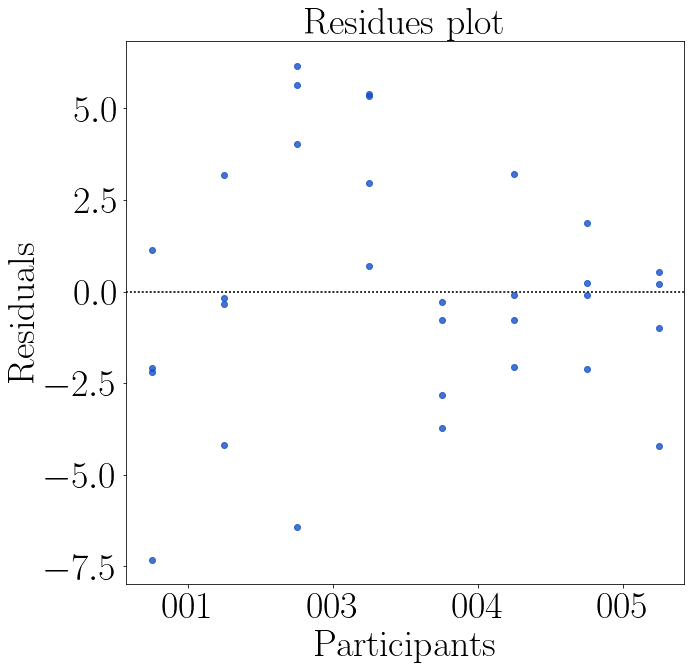

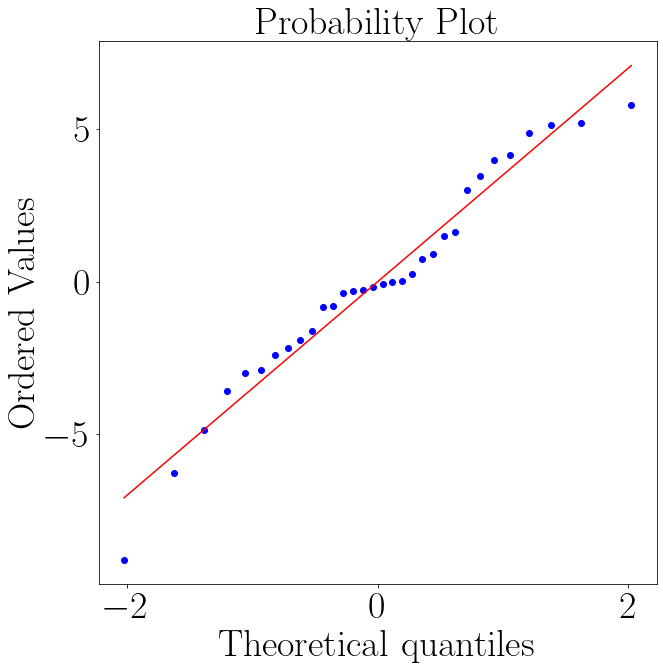

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.166
     \    Rounds   0.308
\    Interaction   0.631
-----------------------
-----------------------
If the difference is higher than 0.72 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Haptic Belt} \ne \mu_{Virtual Cane}$ & **
     Haptic Belt & $X$ & Mixture      $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture     $H_1 : \mu_{Virtual Cane} \ne \mu_{Mixture}$ & **
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [92]:
aux = dfECGBPMMedio.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Sight'].drop(['Visual Condition', 'Base'], axis = 1)

lbl = 'bpm_two_way_sight'
teste = 'ECG'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedTwoWayAnovaTable(anova,4,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the BPM on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,'ECG', colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the average BPM on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,'ECG', colformat = 'rclr', escape = False)
label = 0
caption = 0

#### Cegos

##### Two Way

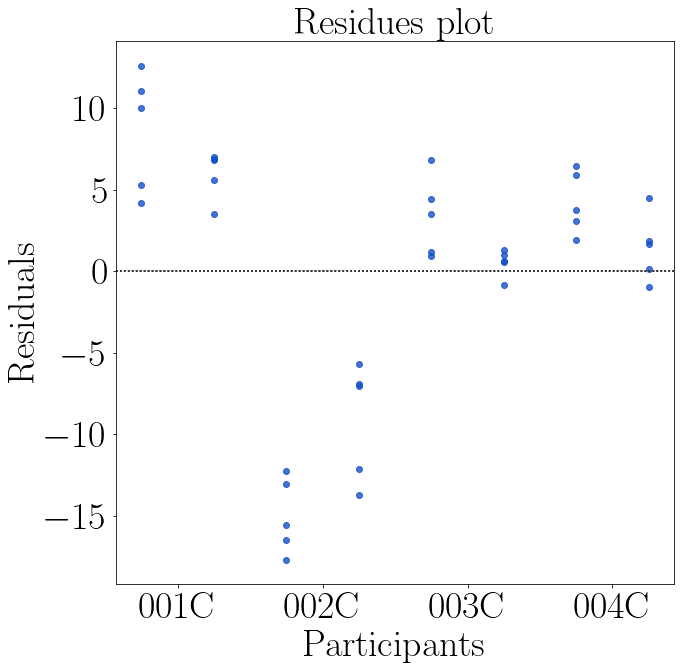

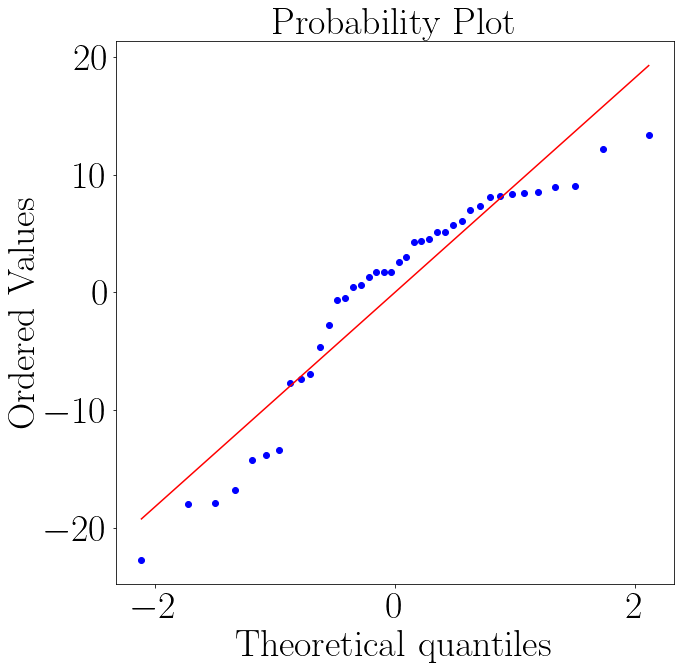

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.100
     \    Rounds   0.371
\    Interaction   0.894
-----------------------
-----------------------
If the difference is higher than 0.83 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
              Base & $X$ & Audio               $H_1 : \mu_{Base} \ne \mu_{Audio}$ & **
        Base & $X$ & Haptic Belt             $H_0 : \mu_{Base} = \mu_{Haptic Belt}$ & 
       Base & $X$ & Virtual Cane        $H_1 : \mu_{Base} \ne \mu_{Virtual Cane}$ & **
            Base & $X$ & Mixture             $H_1 : \mu_{Base} \ne \mu_{Mixture}$ & **
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Hapt

<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [93]:
aux = dfECGBPMMedio.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1)

lbl = 'bpm_two_way_blind'
teste = 'ECG'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedTwoWayAnovaTable(anova,5,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the BPM on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,'ECG', colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the average BPM on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,'ECG', colformat = 'rclr', escape = False)
label = 0
caption = 0

### SDNN

#### Videntes

##### Two Way

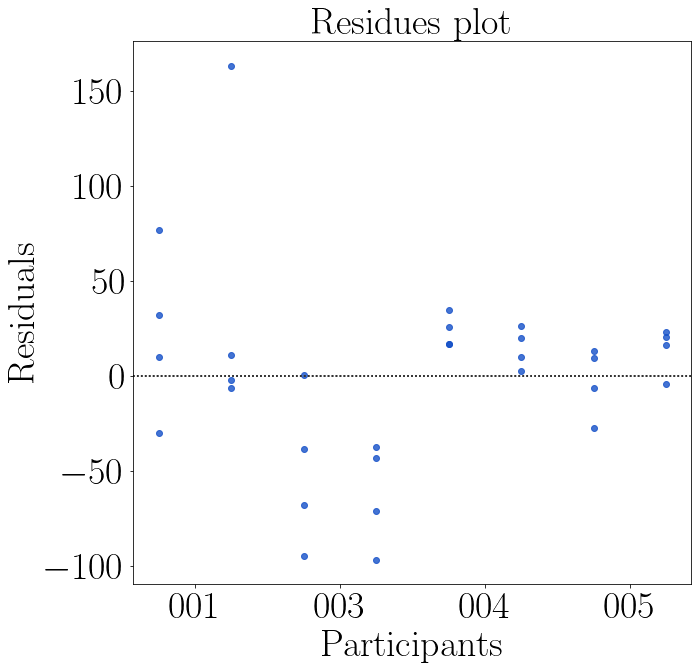

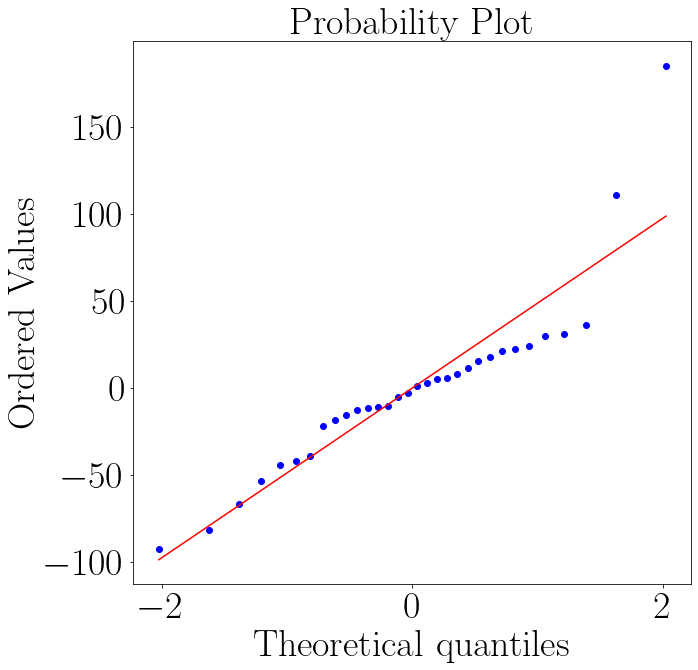

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.189
     \    Rounds   0.969
\    Interaction   0.455
-----------------------
-----------------------
If the difference is higher than 9.17 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Haptic Belt} \ne \mu_{Virtual Cane}$ & **
     Haptic Belt & $X$ & Mixture      $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture         $H_0 : \mu_{Virtual Cane} = \mu_{Mixture}$ & 
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [94]:
aux = dfECGSDNN.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Sight'].drop(['Visual Condition', 'Base'], axis = 1)

lbl = 'sdnn_two_way_sight'
teste = 'ECG'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedTwoWayAnovaTable(anova,4,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the average SDNN on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,'ECG', colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the average SDNN on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,'ECG', colformat = 'rclr', escape = False)
label = 0
caption = 0

#### Cegos

##### Two Way

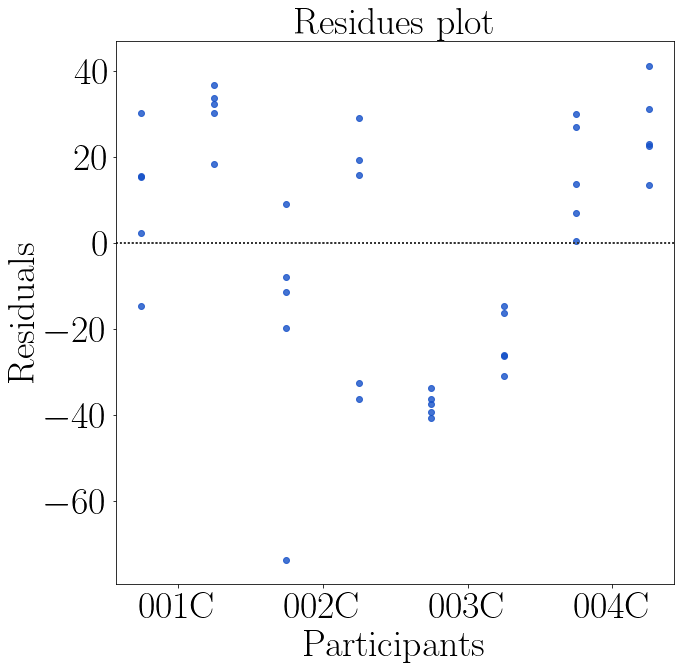

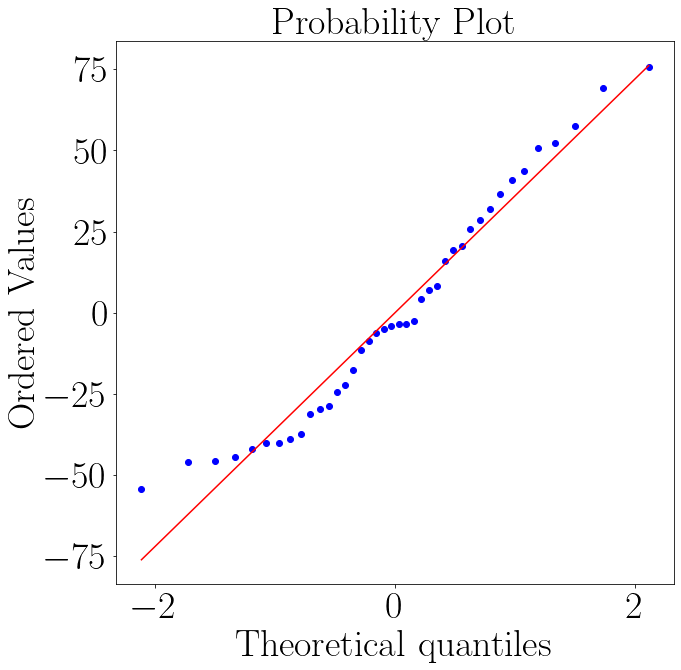

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.486
     \    Rounds   0.223
\    Interaction   0.473
-----------------------
-----------------------
If the difference is higher than 3.78 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
              Base & $X$ & Audio                   $H_0 : \mu_{Base} = \mu_{Audio}$ & 
        Base & $X$ & Haptic Belt             $H_0 : \mu_{Base} = \mu_{Haptic Belt}$ & 
       Base & $X$ & Virtual Cane        $H_1 : \mu_{Base} \ne \mu_{Virtual Cane}$ & **
            Base & $X$ & Mixture             $H_1 : \mu_{Base} \ne \mu_{Mixture}$ & **
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Hapt

<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [95]:
aux = dfECGSDNN.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1)

lbl = 'sdnn_two_way_blind'
teste = 'ECG'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedTwoWayAnovaTable(anova,5,2,4,0.05)
label = 'tab:blocdanova_' + lbl
caption = 'Anova p-value for the average SDNN on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,'ECG', colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the average SDNN on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,'ECG', colformat = 'rclr', escape = False)
label = 0
caption = 0

### GSR

#### Videntes

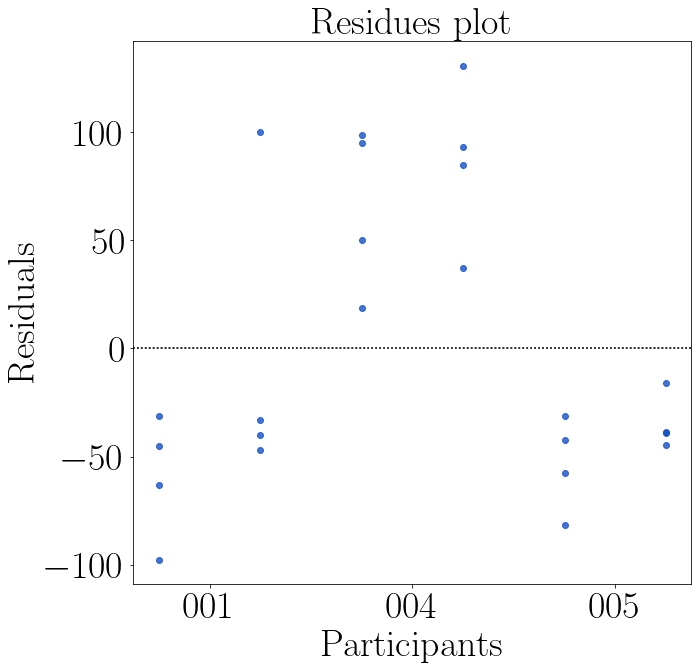

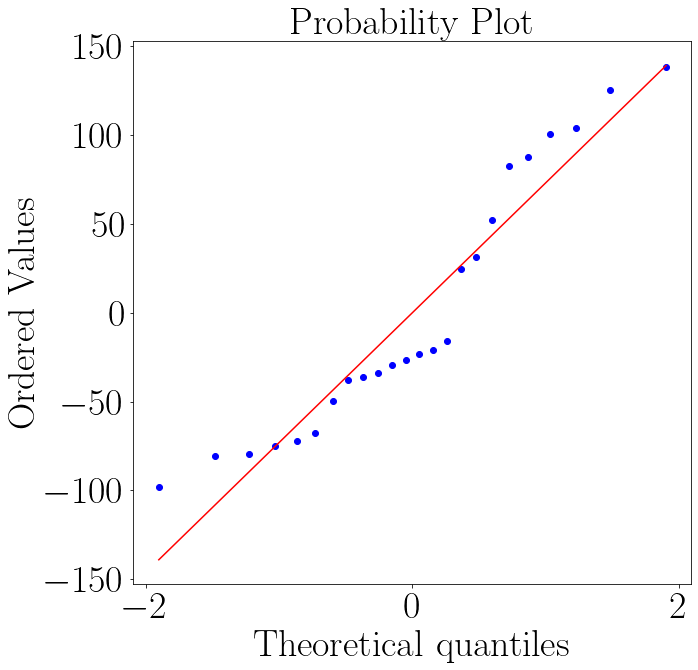

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.802
     \    Rounds   0.354
\    Interaction   0.686
-----------------------
-----------------------
If the difference is higher than 11.87 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                      \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt        $H_0 : \mu_{Audio} = \mu_{Haptic Belt}$ & 
      Audio & $X$ & Virtual Cane   $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_0 : \mu_{Audio} = \mu_{Mixture}$ & 
Haptic Belt & $X$ & Virtual Cane $H_0 : \mu_{Haptic Belt} = \mu_{Virtual Cane}$ & 
     Haptic Belt & $X$ & Mixture  $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture $H_1 : \mu_{Virtual Cane} \ne \mu_{Mixture}$ & **
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [96]:
aux = dfGSR_var_cen_etp.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Sight'].drop(['Visual Condition', 'Base'], axis = 1)

lbl = 'gsr_two_way_sight'
teste = 'GSR'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()


#df_summary = AnovaTable(anova)
#label = 'tab:anova_mental_demand_avg'
#caption = 'Anova p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(df_summary,label,caption,'Nasa', colformat = 'lrrrrr', escape = False)
#label = 0
#caption = 0

df_summary,lsd = BlockedTwoWayAnovaTable(anova,4,2,3,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the skin conductance average on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,'GSR', colformat = 'lrrrrl', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the skin conductance average on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,'GSR', colformat = 'rclr', escape = False)
label = 0
caption = 0

#lsd = LSDPostHocAnova(anova)
#label = 'tab:lsd_mental_demand_avg'
#caption = 'Cross validation p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(lsd,label,caption,'Nasa', colformat = 'rclr', escape = False)
#label = 0
#caption = 0

#dun_0 = 
#DunnettPostHocAnova(anova,dun_0,anova['Base'])

#### Cegos

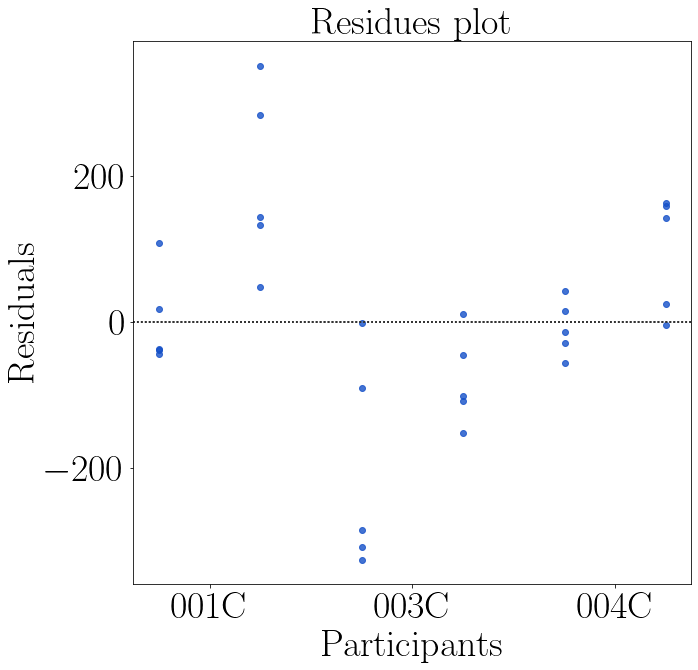

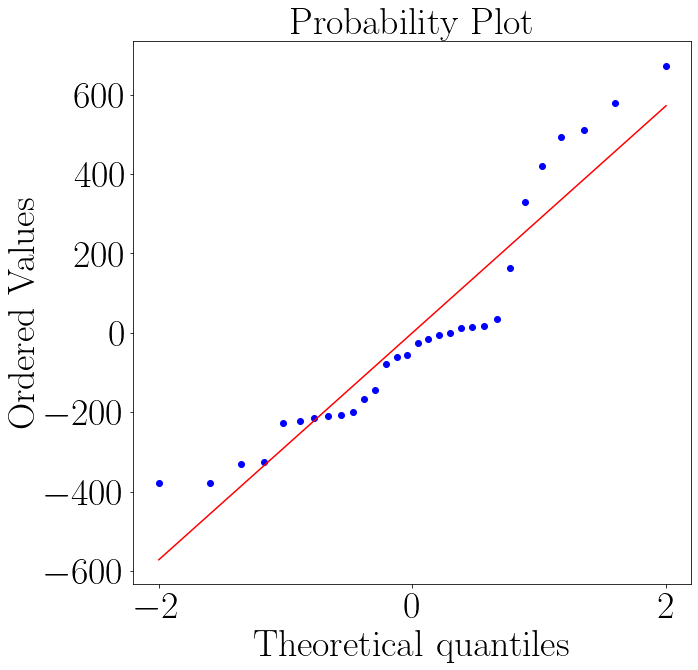

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.051
     \    Rounds   0.722
\    Interaction   0.996
-----------------------
-----------------------
If the difference is higher than 50.86 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
              Base & $X$ & Audio               $H_1 : \mu_{Base} \ne \mu_{Audio}$ & **
        Base & $X$ & Haptic Belt         $H_1 : \mu_{Base} \ne \mu_{Haptic Belt}$ & **
       Base & $X$ & Virtual Cane        $H_1 : \mu_{Base} \ne \mu_{Virtual Cane}$ & **
            Base & $X$ & Mixture             $H_1 : \mu_{Base} \ne \mu_{Mixture}$ & **
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Hap

<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [97]:
aux = dfGSR_var_cen_etp.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1)

lbl = 'gsr_two_way_blind'
teste = 'GSR'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()


#df_summary = AnovaTable(anova)
#label = 'tab:anova_mental_demand_avg'
#caption = 'Anova p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(df_summary,label,caption,'Nasa', colformat = 'lrrrrr', escape = False)
#label = 0
#caption = 0

df_summary,lsd = BlockedTwoWayAnovaTable(anova,5,2,3,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the mental demand average on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,'GSR', colformat = 'lrrrrl', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the mental demand average on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,'GSR', colformat = 'rclr', escape = False)
label = 0
caption = 0

#lsd = LSDPostHocAnova(anova)
#label = 'tab:lsd_mental_demand_avg'
#caption = 'Cross validation p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(lsd,label,caption,'Nasa', colformat = 'rclr', escape = False)
#label = 0
#caption = 0

#dun_0 = 
#DunnettPostHocAnova(anova,dun_0,anova['Base'])

### Demanda Mental

#### Videntes

##### Two Way

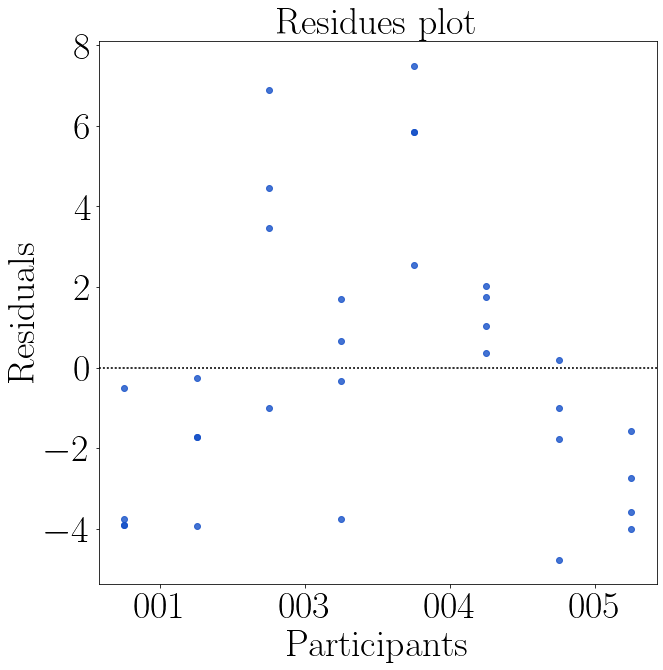

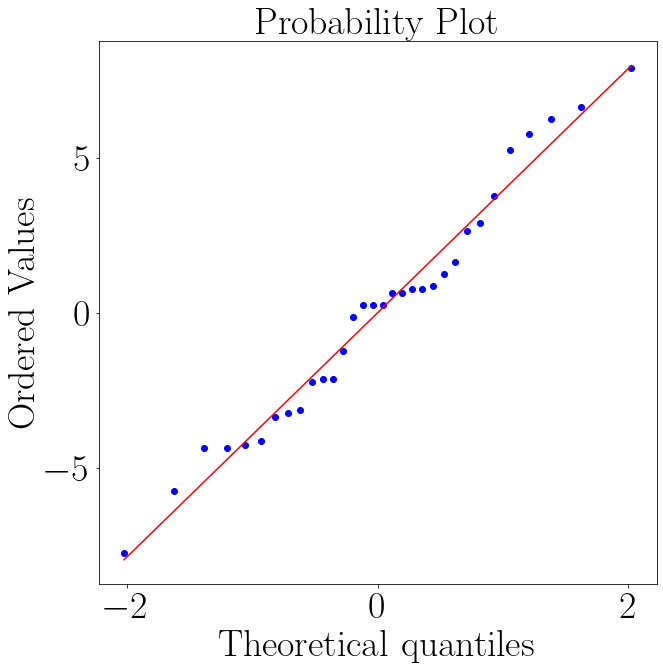

<class 'numpy.float64'>
          Source P-Value
    \    Methods 0.049**
     \    Rounds   0.075
\    Interaction   0.990
-----------------------
-----------------------
If the difference is higher than 0.69 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture                $H_0 : \mu_{Audio} = \mu_{Mixture}$ & 
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Haptic Belt} \ne \mu_{Virtual Cane}$ & **
     Haptic Belt & $X$ & Mixture      $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture     $H_1 : \mu_{Virtual Cane} \ne \mu_{Mixture}$ & **
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [98]:
aux = dfMdVariation.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Sight'].drop(['Visual Condition','Base'], axis = 1)

lbl = 'md_avg_two_way_sight'
teste = 'Nasa'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()


df_summary,lsd = BlockedTwoWayAnovaTable(anova,4,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the mental demand average on each method for sighted users.'
TabelaLatexSemIndex(df_summary,label,caption,teste, colformat = 'lrrrrl', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the mental demand average on each method for sighted users.'
TabelaLatexSemIndex(lsd,label,caption,teste, colformat = 'rcllr', escape = False)
label = 0
caption = 0


#### Cegos

##### Two Way

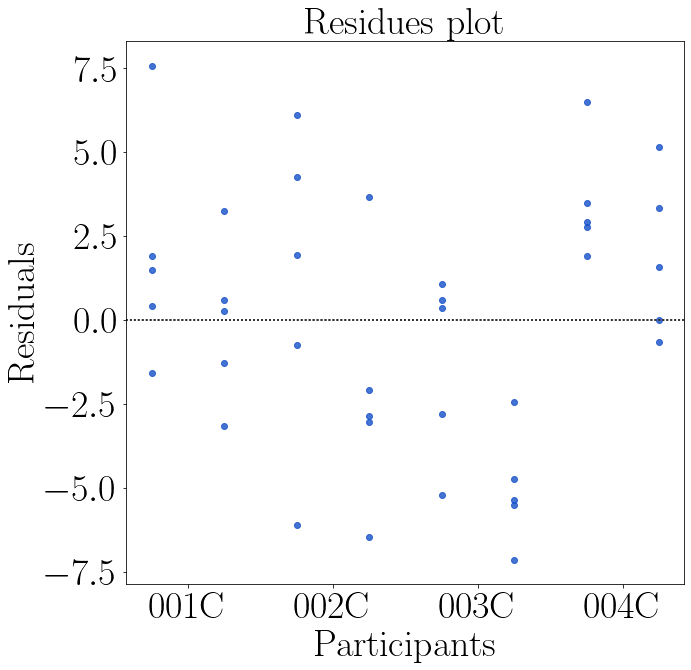

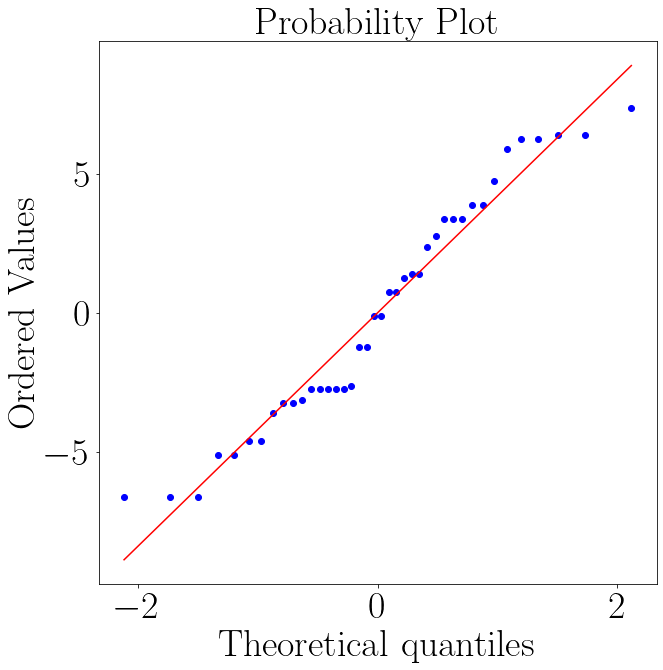

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.170
     \    Rounds   0.075
\    Interaction   0.993
-----------------------
-----------------------
If the difference is higher than 0.67 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
              Base & $X$ & Audio                   $H_0 : \mu_{Base} = \mu_{Audio}$ & 
        Base & $X$ & Haptic Belt         $H_1 : \mu_{Base} \ne \mu_{Haptic Belt}$ & **
       Base & $X$ & Virtual Cane        $H_1 : \mu_{Base} \ne \mu_{Virtual Cane}$ & **
            Base & $X$ & Mixture             $H_1 : \mu_{Base} \ne \mu_{Mixture}$ & **
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Hapt

<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [99]:
aux = dfMdVariation.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1)

lbl = 'md_avg_two_way_blind'
teste = 'Nasa'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedTwoWayAnovaTable(anova,5,2,4,0.05)
label = 'tab:blocanova_' + lbl
#caption = 'Anova p-value for the mental demand average on each method for blinded users.'
caption = 'ANOVA p-value for mental demand -- blind participants'
TabelaLatexSemIndex(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the mental demand average on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,teste, colformat = 'rcllr', escape = False)
label = 0
caption = 0

### Carga Mental

#### Videntes

##### Two Way

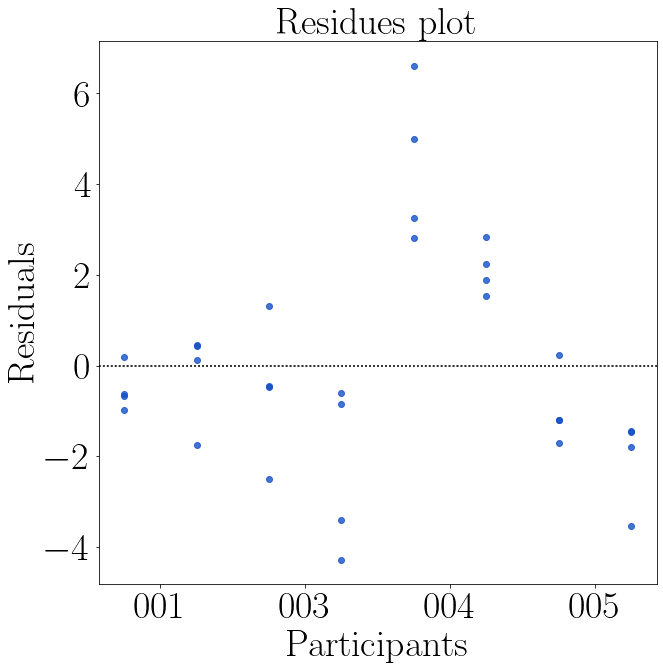

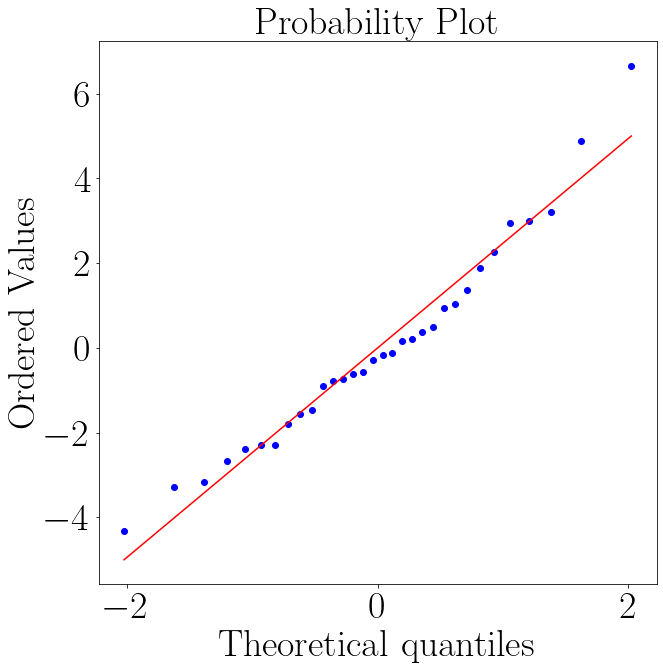

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.086
     \    Rounds 0.034**
\    Interaction   0.688
-----------------------
-----------------------
If the difference is higher than 0.32 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Haptic Belt} \ne \mu_{Virtual Cane}$ & **
     Haptic Belt & $X$ & Mixture      $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture     $H_1 : \mu_{Virtual Cane} \ne \mu_{Mixture}$ & **
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [100]:
aux = dfCmVariation.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Sight'].drop(['Visual Condition', 'Base'], axis = 1)

lbl = 'nasa_avg_two_way_sight'
teste = 'Nasa'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()


df_summary,lsd = BlockedTwoWayAnovaTable(anova,4,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the NASA-TLX score on each method for sighted users.'
TabelaLatexSemIndex(df_summary,label,caption,'Nasa', colformat = 'lrrrrl', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the NASA-TLX score average on each method for sighted users.'
TabelaLatexSemIndex(lsd,label,caption,'Nasa', colformat = 'rcllr', escape = False)
label = 0
caption = 0


#### Cegos

##### Two Way

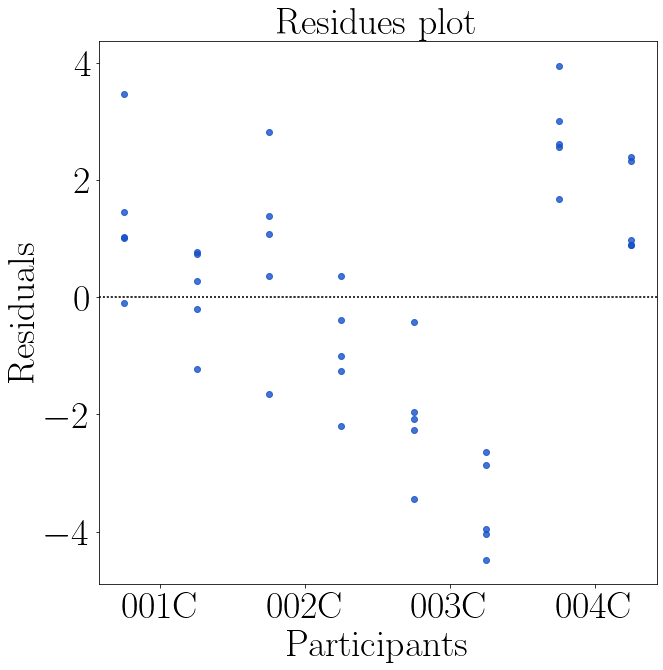

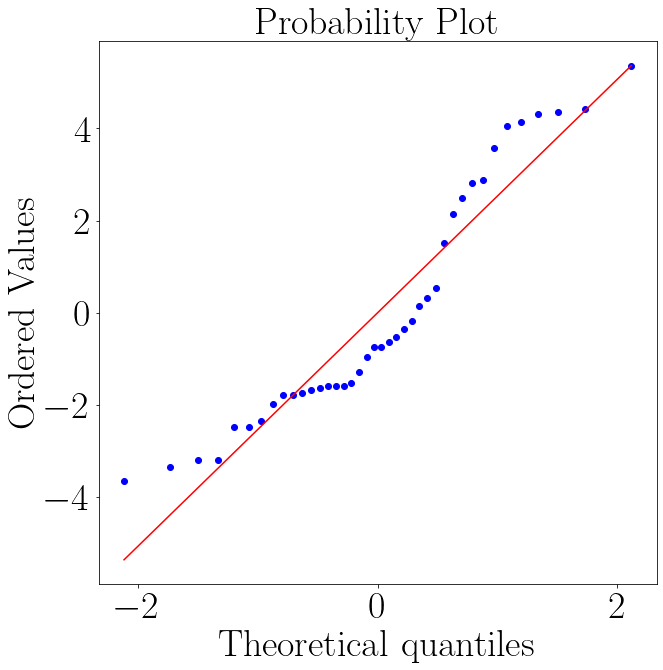

<class 'numpy.float64'>
          Source P-Value
    \    Methods 0.029**
     \    Rounds 0.022**
\    Interaction   0.814
-----------------------
-----------------------
If the difference is higher than 0.22 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
              Base & $X$ & Audio                   $H_0 : \mu_{Base} = \mu_{Audio}$ & 
        Base & $X$ & Haptic Belt         $H_1 : \mu_{Base} \ne \mu_{Haptic Belt}$ & **
       Base & $X$ & Virtual Cane        $H_1 : \mu_{Base} \ne \mu_{Virtual Cane}$ & **
            Base & $X$ & Mixture             $H_1 : \mu_{Base} \ne \mu_{Mixture}$ & **
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Hapt

<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [101]:
aux = dfCmVariation.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1)

lbl = 'nasa_avg_two_way_blind'
teste = 'Nasa'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedTwoWayAnovaTable(anova,5,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the NASA-TLX score on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,teste, colformat = 'lrrrrl', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the NASA-TLX score on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,teste, colformat = 'rcllr', escape = False)
label = 0
caption = 0


### Sagat

#### Videntes

##### Two Way

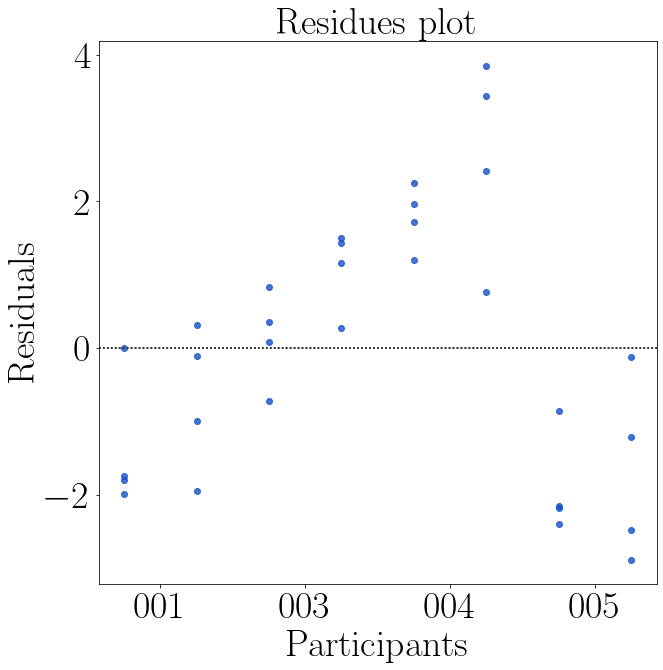

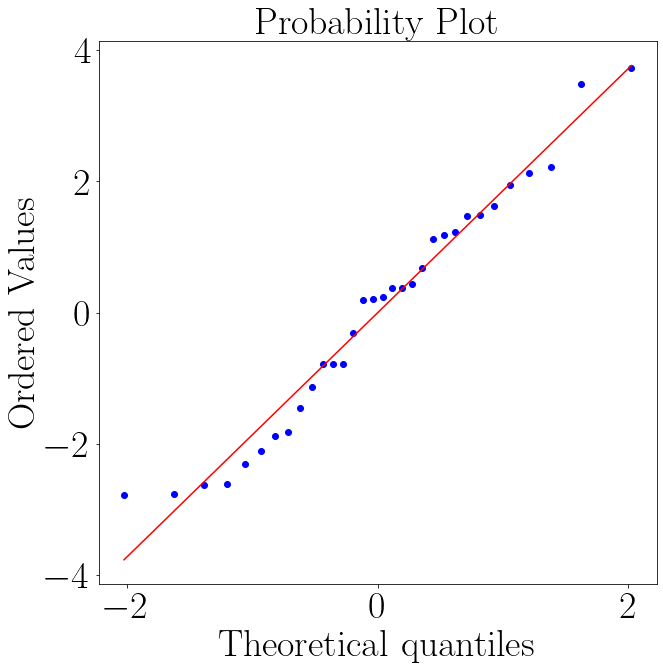

<class 'numpy.float64'>
          Source P-Value
    \    Methods 0.035**
     \    Rounds   0.095
\    Interaction   0.578
-----------------------
-----------------------
If the difference is higher than 0.21 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt            $H_0 : \mu_{Audio} = \mu_{Haptic Belt}$ & 
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Haptic Belt} \ne \mu_{Virtual Cane}$ & **
     Haptic Belt & $X$ & Mixture      $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture     $H_1 : \mu_{Virtual Cane} \ne \mu_{Mixture}$ & **
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [102]:
aux = dfSaVariation.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Sight'].drop(['Visual Condition','Base'], axis = 1)

lbl = 'sagat_avg_two_way_sight'
teste = 'Sagat'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()


#df_summary = AnovaTable(anova)
#label = 'tab:anova_mental_demand_avg'
#caption = 'Anova p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(df_summary,label,caption,'Nasa', colformat = 'lrrrrr', escape = False)
#label = 0
#caption = 0

df_summary,lsd = BlockedTwoWayAnovaTable(anova,4,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the SAGAT score on each method for sighted users.'
TabelaLatexSemIndex(df_summary,label,caption,'Sagat', colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the SAGAT score on each method for sighted users.'
TabelaLatexSemIndex(lsd,label,caption,'Sagat', colformat = 'rclr', escape = False)
label = 0
caption = 0

#lsd = LSDPostHocAnova(anova)
#label = 'tab:lsd_mental_demand_avg'
#caption = 'Cross validation p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(lsd,label,caption,'Nasa', colformat = 'rclr', escape = False)
#label = 0
#caption = 0

#dun_0 = 
#DunnettPostHocAnova(anova,dun_0,anova['Base'])

#### Cegos

##### Two Way

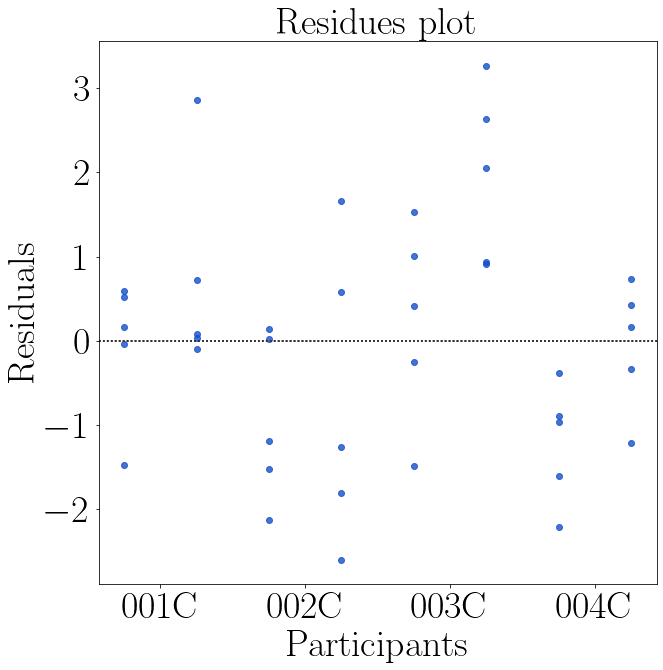

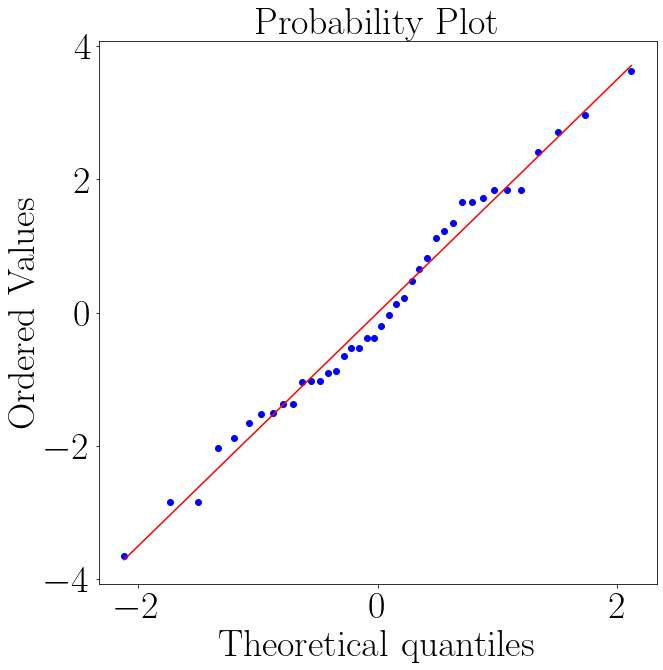

<class 'numpy.float64'>
          Source P-Value
    \    Methods   0.277
     \    Rounds 0.002**
\    Interaction   0.834
-----------------------
-----------------------
If the difference is higher than 0.24 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
              Base & $X$ & Audio               $H_1 : \mu_{Base} \ne \mu_{Audio}$ & **
        Base & $X$ & Haptic Belt         $H_1 : \mu_{Base} \ne \mu_{Haptic Belt}$ & **
       Base & $X$ & Virtual Cane        $H_1 : \mu_{Base} \ne \mu_{Virtual Cane}$ & **
            Base & $X$ & Mixture                 $H_0 : \mu_{Base} = \mu_{Mixture}$ & 
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture            $H_1 : \mu_{Audio} \ne \mu_{Mixture}$ & **
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Hapt

<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [103]:
aux = dfSaVariation.reset_index(level = [1,2])
anova = aux[aux['Visual Condition'] == 'Blind'].drop(['Visual Condition'], axis = 1)

lbl = 'sagat_avg_two_way_blind'
teste = 'Sagat'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.drop('Round', axis = 1).columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0.5,2.5,4.5,6.5]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()


#df_summary = AnovaTable(anova)
#label = 'tab:anova_mental_demand_avg'
#caption = 'Anova p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(df_summary,label,caption,'Nasa', colformat = 'lrrrrr', escape = False)
#label = 0
#caption = 0

df_summary,lsd = BlockedTwoWayAnovaTable(anova,5,2,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the SAGAT score on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,teste, colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the SAGAT score on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,teste, colformat = 'rclr', escape = False)
label = 0
caption = 0

#lsd = LSDPostHocAnova(anova)
#label = 'tab:lsd_mental_demand_avg'
#caption = 'Cross validation p-value for the average mental demand on each method for blinded users.'
#TabelaLatexSemIndex(lsd,label,caption,'Nasa', colformat = 'rclr', escape = False)
#label = 0
#caption = 0

#dun_0 = 
#DunnettPostHocAnova(anova,dun_0,anova['Base'])

### Questionarios

#### Vidente

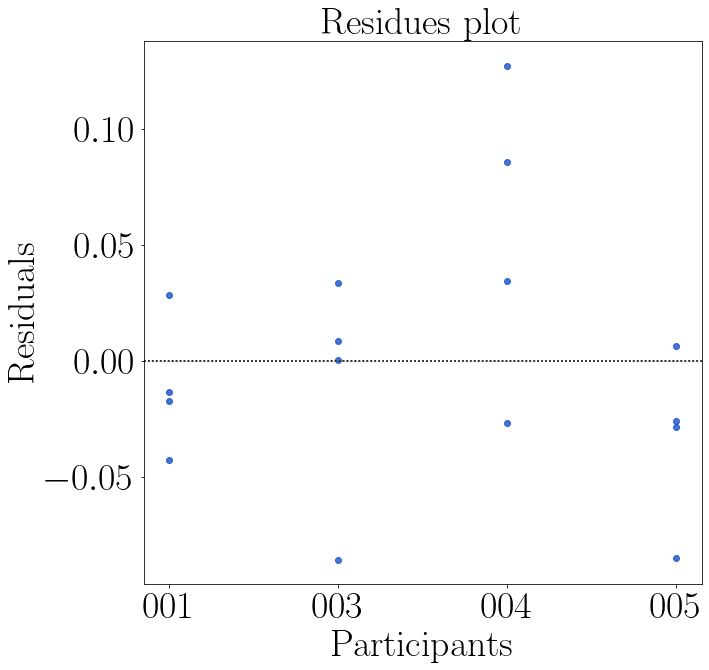

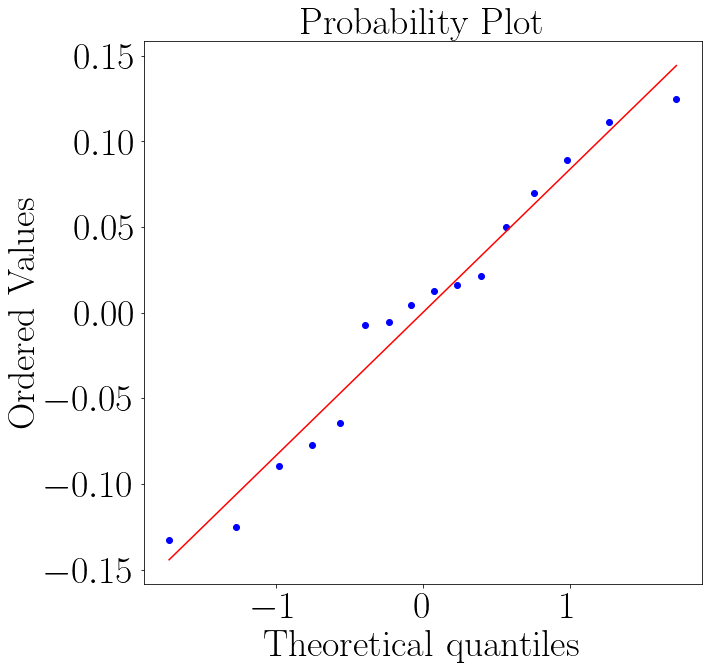

Source P-Value
Method 0.016**
-----------------------
-----------------------
If the difference is higher than 0.05 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture                $H_0 : \mu_{Audio} = \mu_{Mixture}$ & 
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Haptic Belt} \ne \mu_{Virtual Cane}$ & **
     Haptic Belt & $X$ & Mixture      $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture     $H_1 : \mu_{Virtual Cane} \ne \mu_{Mixture}$ & **
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [104]:
anova = pgQuestionario_media[pgQuestionario_media['Visual Condition'] == 'Sight'].drop('Visual Condition', axis = 1)

lbl = 'questionnaire_sight'
teste = 'Questionario'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0,1,2,3]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedAnovaTable(anova,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the questionnaire score on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,teste, colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the questionnaire score on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,teste, colformat = 'rcllr', escape = False)
label = 'tab:lsd_' + lbl
TabelaLatexSemIndexSemBegin(lsd,label,caption,teste, colformat = 'rcllr', escape = False)
label = 0
caption = 0

#### Cegos

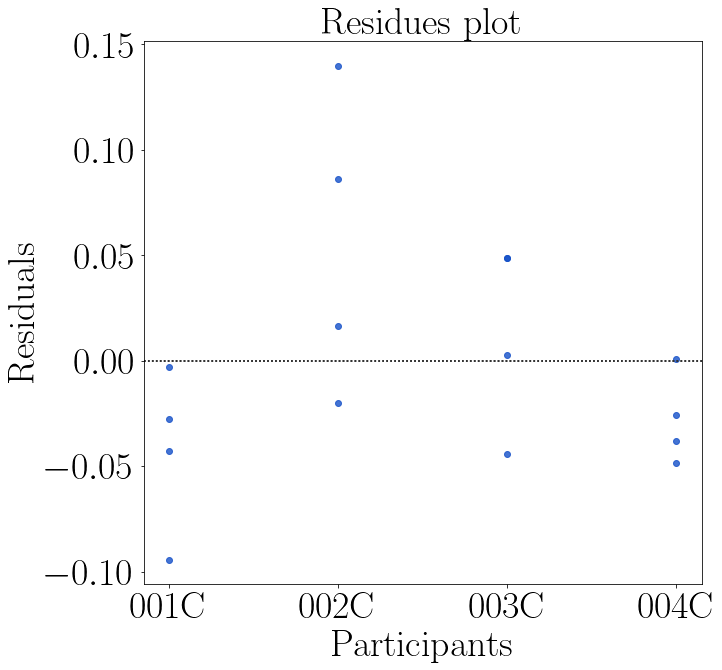

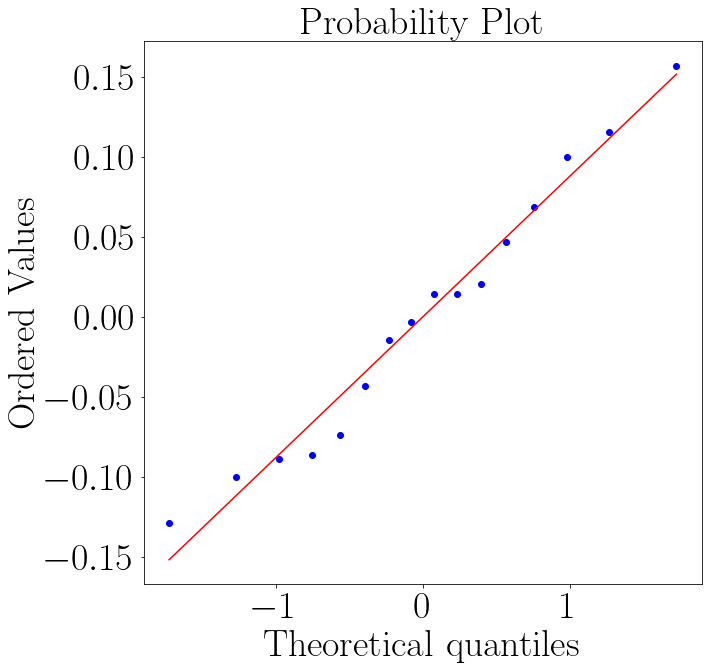

Source P-Value
Method 0.001**
-----------------------
-----------------------
If the difference is higher than 0.05 then the alternative hypothesis may be valid
      \multicolumn{3}{c}{Method}                          \multicolumn{2}{c}{Analysis}
       Audio & $X$ & Haptic Belt        $H_1 : \mu_{Audio} \ne \mu_{Haptic Belt}$ & **
      Audio & $X$ & Virtual Cane       $H_1 : \mu_{Audio} \ne \mu_{Virtual Cane}$ & **
           Audio & $X$ & Mixture                $H_0 : \mu_{Audio} = \mu_{Mixture}$ & 
Haptic Belt & $X$ & Virtual Cane $H_1 : \mu_{Haptic Belt} \ne \mu_{Virtual Cane}$ & **
     Haptic Belt & $X$ & Mixture      $H_1 : \mu_{Haptic Belt} \ne \mu_{Mixture}$ & **
    Virtual Cane & $X$ & Mixture     $H_1 : \mu_{Virtual Cane} \ne \mu_{Mixture}$ & **
-----------------------
-----------------------


<ipython-input-12-3669a4f13124>:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tabela = pd.DataFrame.to_latex(df, label = label, caption = caption, position = '!htb', float_format="{:0.3f}".format, escape = escape, index = False, column_format = colformat)


In [105]:
anova = pgQuestionario_media[pgQuestionario_media['Visual Condition'] == 'Blind'].drop('Visual Condition', axis = 1)

lbl = 'questionnaire_blind'
teste = 'Questionario'

res_amostras = pd.DataFrame([], columns=anova.columns)
anovaArray = []
anovaErroArray = []
plt.figure(figsize = tamanhoBarra2)
for a in anova.columns:
    res_amostras_a = []
    for n_ij in anova[a]:
        res_amostras_a.append(n_ij - np.mean(anova[a]))
        anovaErroArray.append(n_ij - np.mean(anova[a]))
        anovaArray.append(n_ij)
    res_amostras[a] = res_amostras_a
    #fig = sm.qqplot(res_amostras[a], fit = True, line = 'r')
    #plt.show()
    sns.residplot(y=a, x=res_amostras.index, data = res_amostras, color = ccmBlue)
plt.title('Residues plot')
plt.ylabel('Residuals')
tickPos = [0,1,2,3]
plt.xticks(tickPos, anova.index.unique())
plt.xlabel('Participants')
#plt.savefig(teste + '/Figuras/png/residplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/residplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/residplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()
plt.figure(figsize = tamanhoBarra2)
stats.probplot(anovaErroArray, plot=plt)
#plt.savefig(teste + '/Figuras/png/qqplot_' + lbl + '.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/qqplot_' + lbl + '.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/qqplot_' + lbl + '.pgf',bbox_inches='tight')
plt.show()

df_summary,lsd = BlockedAnovaTable(anova,4,0.05)
label = 'tab:blocanova_' + lbl
caption = 'Anova p-value for the questionnaire score on each method for blinded users.'
TabelaLatexSemIndex(df_summary,label,caption,teste, colformat = 'lrrrrr', escape = False)
label = 'tab:blocanova_' + lbl
TabelaLatexSemIndexSemBegin(df_summary,label,caption,teste, colformat = 'll', escape = False)
label = 'tab:lsd_' + lbl
caption = 'Cross validation p-value for the questionnaire score on each method for blinded users.'
TabelaLatexSemIndex(lsd,label,caption,teste, colformat = 'rcllr', escape = False)
label = 'tab:lsd_' + lbl
TabelaLatexSemIndexSemBegin(lsd,label,caption,teste, colformat = 'rcllr', escape = False)
label = 0
caption = 0

## Gráficos com todos os métodos

In [106]:
tamanhoBarra5 = [18,7]
tamanhoBarra2 = [10,10]
tamanhoBox = [10,10]

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

### Gráfico de barra ECG

#### Frequência cardiaca

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


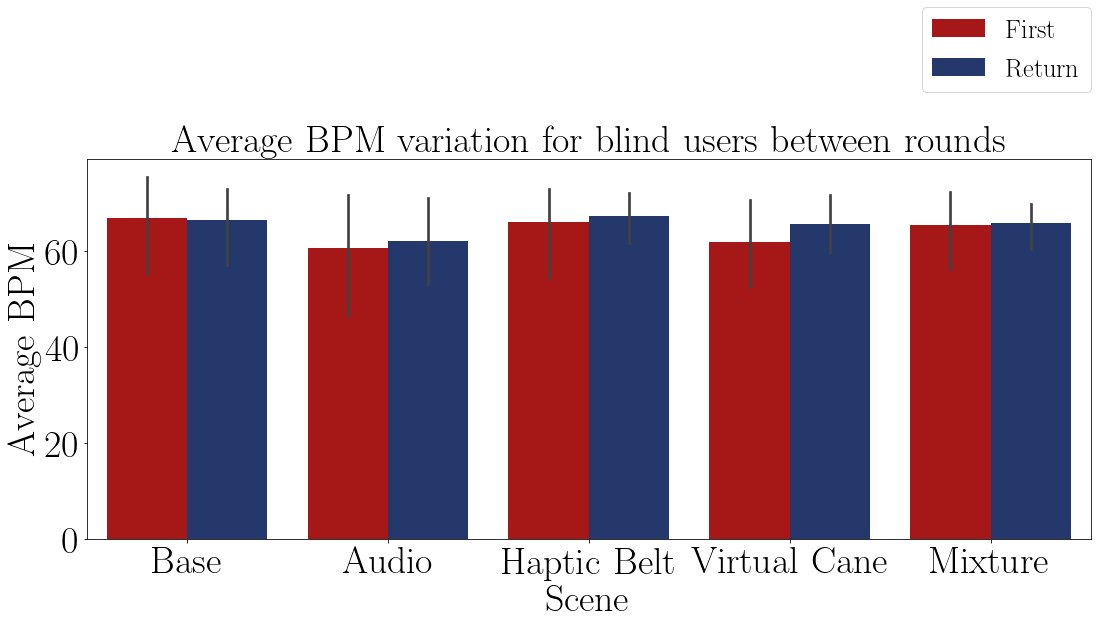

In [107]:
plot = dfECGBPMMedio.reset_index(level = [1,2]).copy()

score = 'average BPM'
Score = 'Average BPM'
teste = 'ECG'
label = 'ecg_bpm_5'

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
#plt.title(Score + ' variation for sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' variation for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene.pdf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' variation for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '.pdf',bbox_inches='tight')
#plt.show()

#### Desvio Padrão entre intervalos

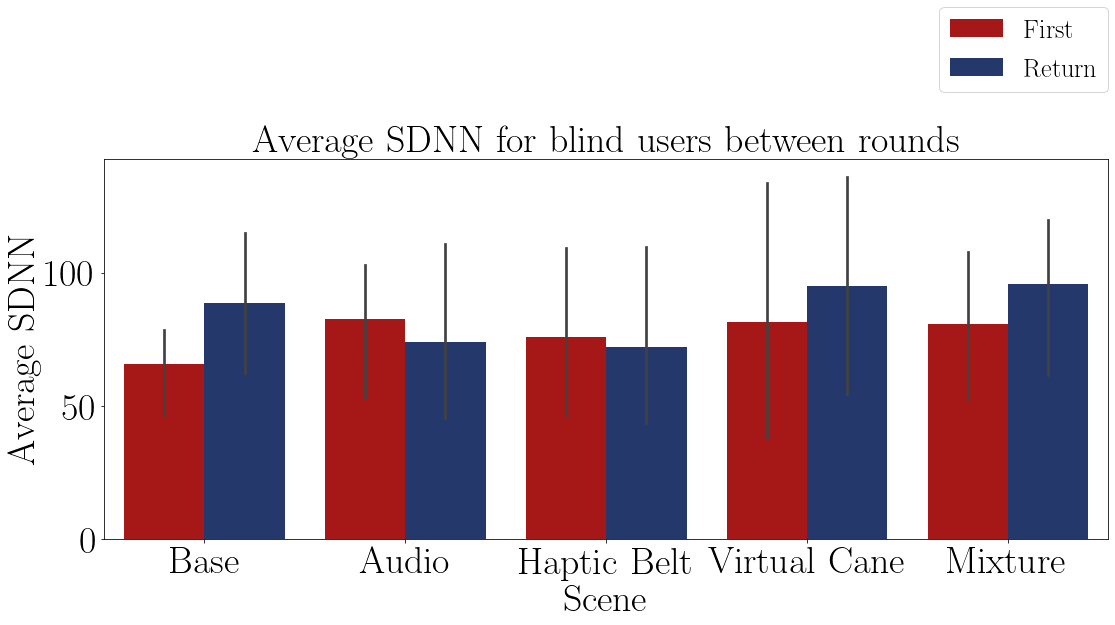

In [108]:
plot = dfECGSDNN.reset_index(level = [1,2]).copy()

score = 'average SDNN'
Score = 'Average SDNN'
teste = 'ECG'
label = 'ecg_sdnn_5'

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
#plt.title(Score + ' for sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene.pdf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '.pdf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da variação do GSR Médio

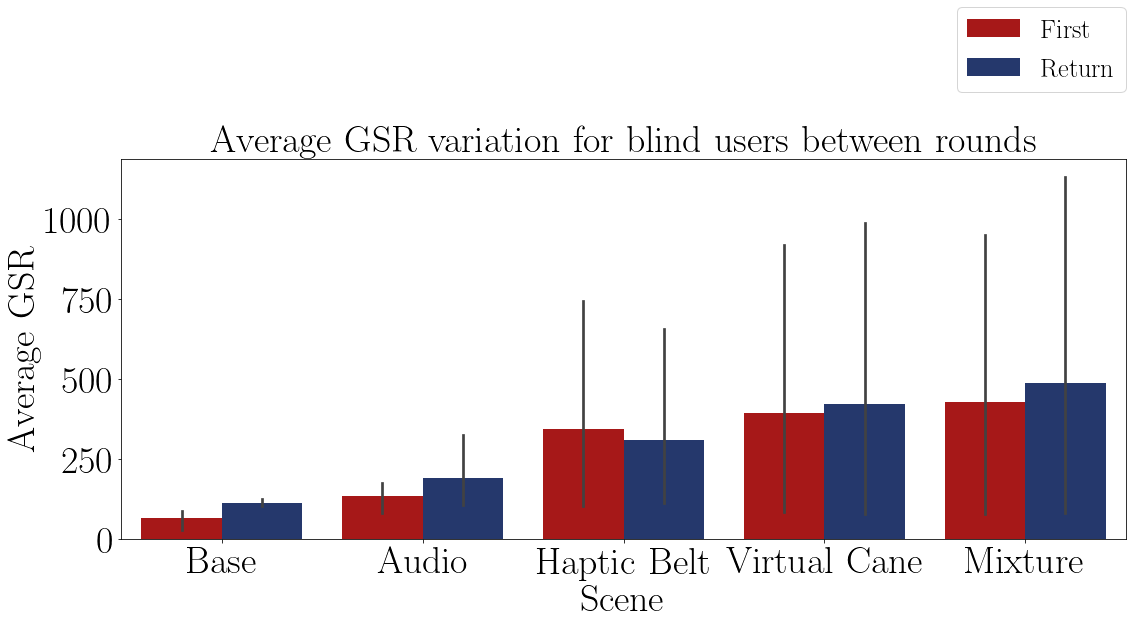

In [109]:
plot = dfGSR_var_cen_etp.reset_index(level = [1,2]).copy()
score = 'average gsr'
Score = 'Average GSR'
teste = 'GSR'
label = 'gsr_avg_5'

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')


plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
#plt.title(Score + ' variation for sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' variation for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' variation for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da média da demanda mental

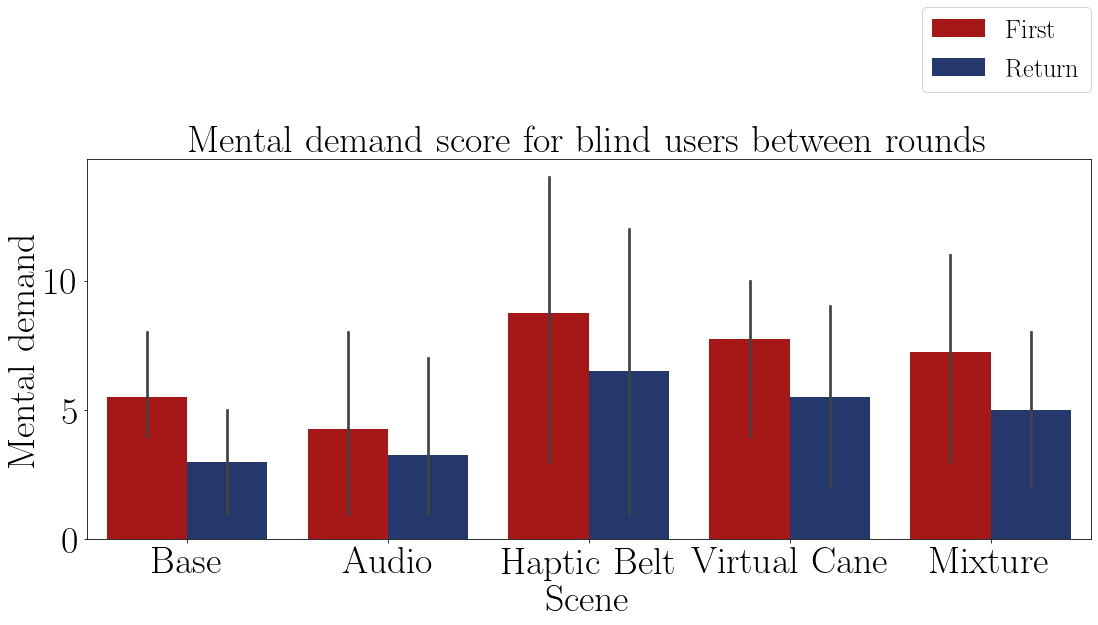

In [110]:
plot = dfMdVariation.reset_index(level = [1,2]).copy()
score = 'mental demand'
Score = 'Mental demand'
teste = 'Nasa'
label = 'md_avg_5'

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' score for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
#plt.title(Score + ' score for sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
##plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' score for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
##plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene.pdf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' score for \n blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
##plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_global.pdf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da média da carga mental

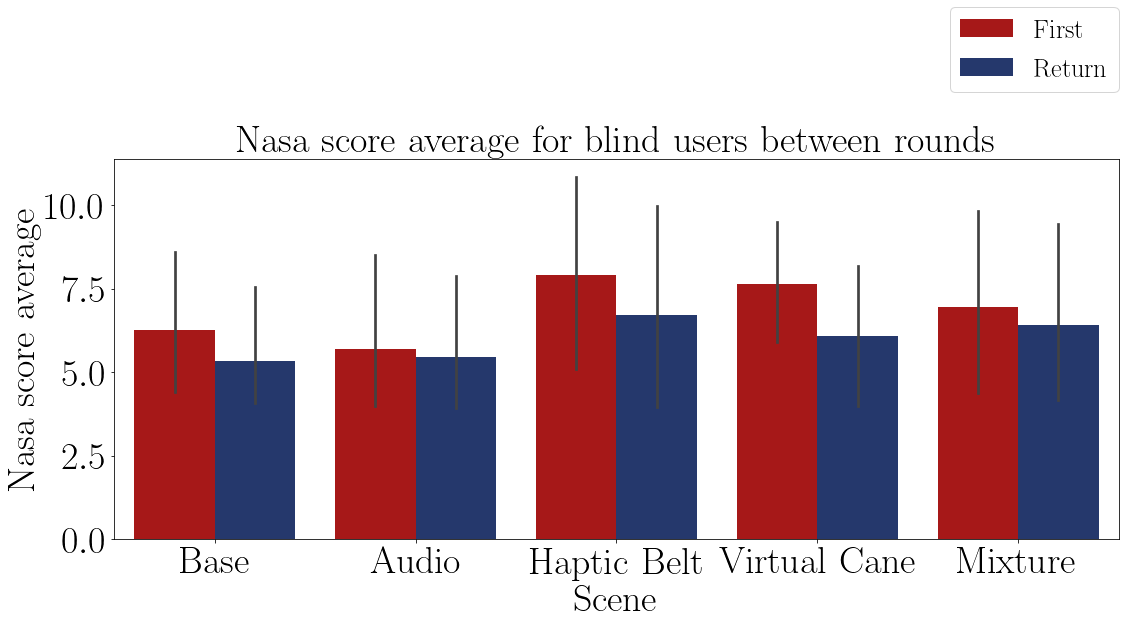

In [111]:
plot = dfCmVariation.reset_index(level = [1,2]).copy()
score = 'nasa score average'
Score = 'Nasa score average'
teste = 'Nasa'
label = 'nasa_avg_5'

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
#plt.title(Score + ' for sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' for \n blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da média da pontuação do Sagat

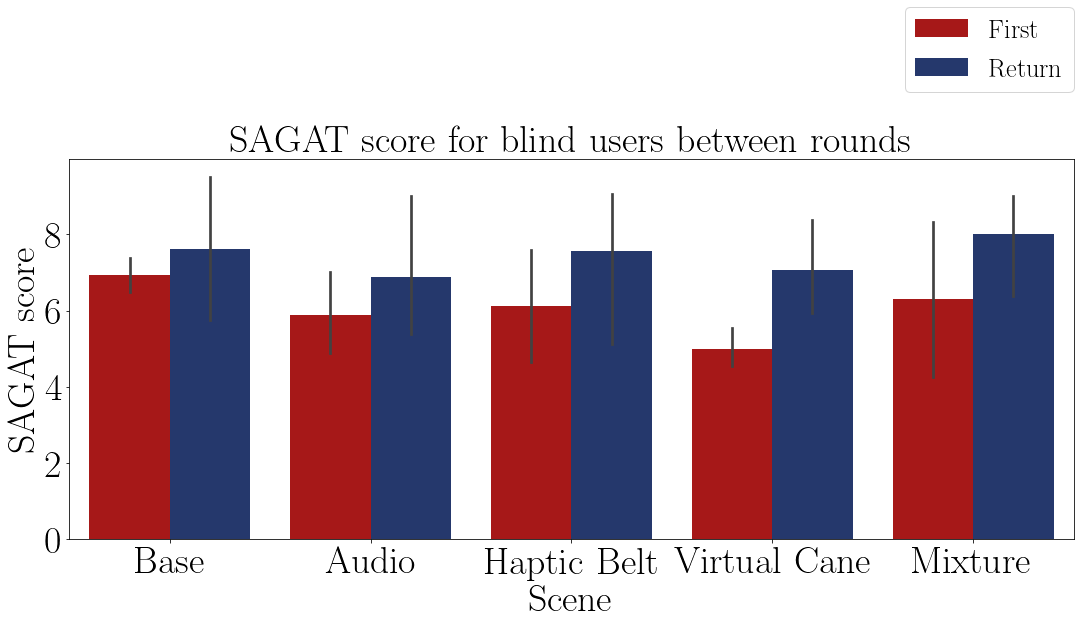

In [112]:
plot = dfSaVariation.reset_index(level = [1,2]).copy()
score = 'SAGAT score'
Score = 'SAGAT score'
teste = 'Sagat'
label = 'sagat_avg_5'

tamanhoBarra5 = [18,7]
tamanhoBarra2 = [10,10]
tamanhoBox = [10,10]

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
#plt.title(Score + ' for sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
#plt.show()

### Box plot da média do ECG

#### Frequência cardiaca

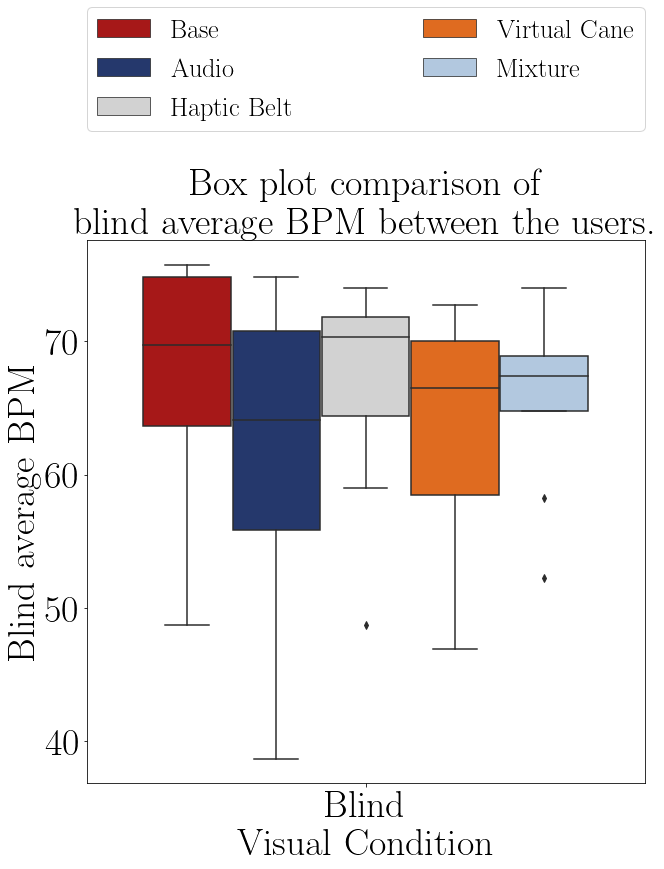

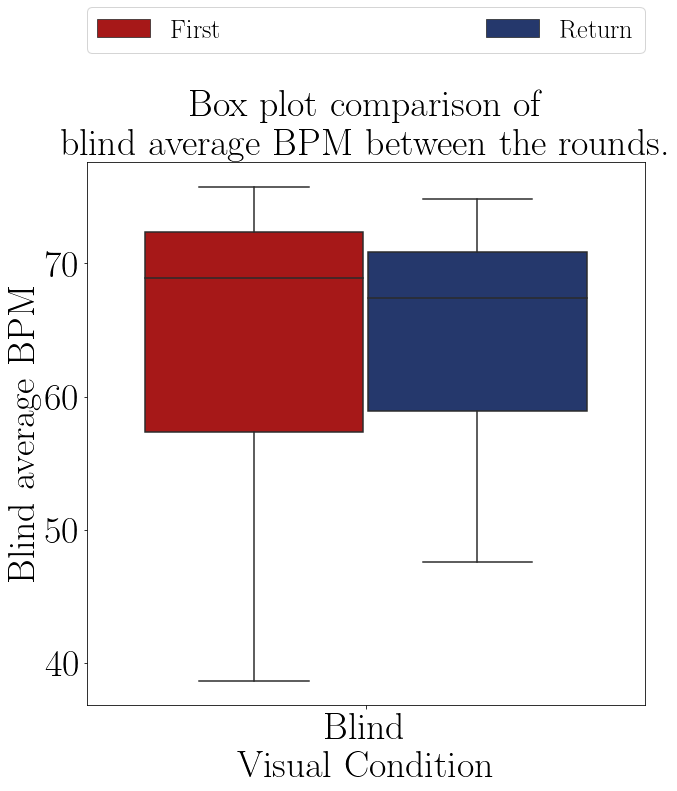

In [113]:
plot = dfECGBPMMedio.reset_index(level = 1).copy()
score = 'blind average BPM'
Score = 'Blind average BPM'
teste = 'ECG'
label = 'ecg_bpm_blind'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition','Round'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
#plt.axhline(y=0, linestyle='--',color = 'black')
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')

#### Desvio Padrão entre intervalos

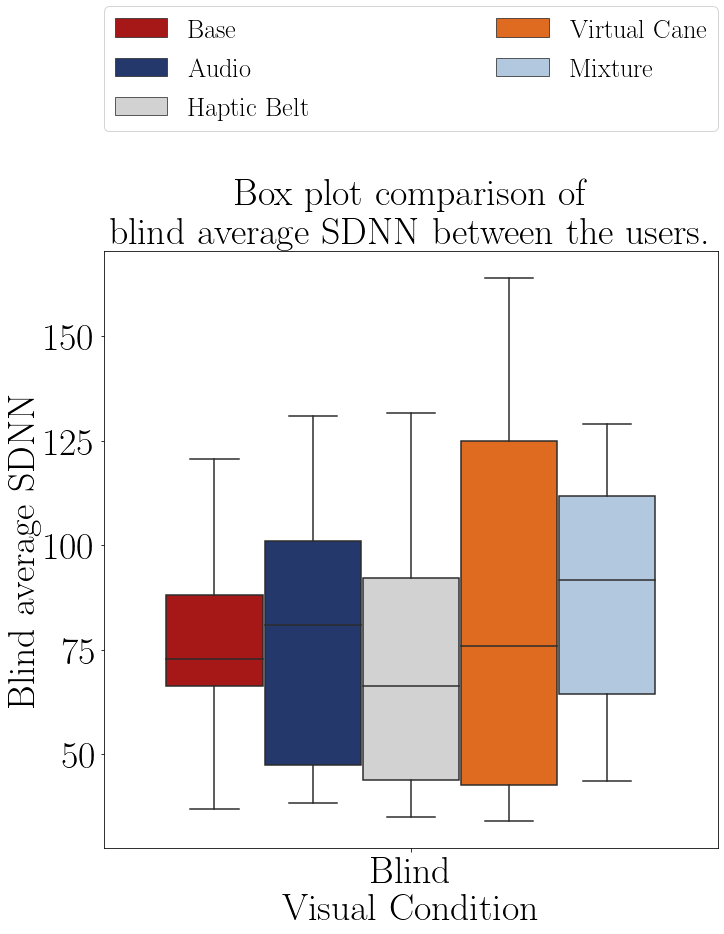

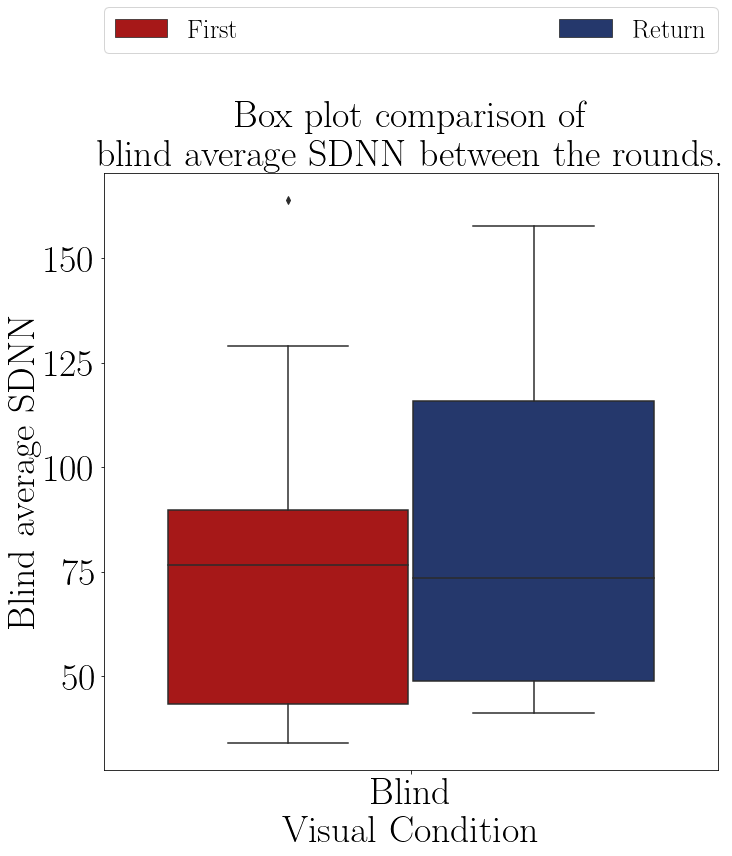

In [114]:
score = 'blind average SDNN'
Score = 'Blind average SDNN'
teste = 'ECG'
label = 'ecg_sdnn_blind'

tamanhoBox = [11,11]

if len(dfECGSDNN.index.names) == 1:
    plot = dfECGSDNN.copy()
else:
    plot = dfECGSDNN.reset_index(level = 1).copy()

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition', 'Round'], var_name = 'Scene', value_name = 'Score' ,ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()  

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')


### Box plot da variação do ECG

#### Frequência cardiaca

In [115]:
score = 'blind BPM variation'
Score = 'Blind BPM variation'
teste = 'ECG'
label = 'ecg_bpm_var_blind'

tamanhoBox = [11,11]

if len(dfECGBPMMedio_var_cen_par.index.names) == 1:
    plot = dfECGBPMMedio_var_cen_par.copy()
else:
    plot = dfECGBPMMedio_var_cen_par.reset_index(level = 1).copy()
plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition'], var_name = 'Scene', value_name = 'Data' ,ignore_index=True)
mdMelt.set_index('Participant')

#plt.figure(figsize = tamanhoBox)
#sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Data', hue = "Scene")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
#plt.title('Box plot comparison of \n' + score + ' between the users.')
##plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
#plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()


,Visual Condition,Scene,Data
Participant,,,
001C,Blind,Base,-4.7021
002C,Blind,Base,3.7717
003C,Blind,Base,-1.0356
004C,Blind,Base,-0.3514
001C,Blind,Audio,-2.095
002C,Blind,Audio,8.9099
003C,Blind,Audio,-2.454
004C,Blind,Audio,1.2313
001C,Blind,Haptic Belt,-4.9437


#### Desvio Padrão entre intervalos

In [116]:
score = 'blind average SDNN variation'
Score = 'Blind average SDNN variation'
teste = 'ECG'
label = 'ecg_sdnn_var_blind'

tamanhoBox = [11,11]

if len(dfECGSDNN_var_cen_par.index.names) == 1:
    plot = dfECGSDNN_var_cen_par.copy()
else:
    plot = dfECGSDNN_var_cen_par.reset_index(level = 1).copy()

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition'], var_name = 'Scene', value_name = 'Data' ,ignore_index=True)
mdMelt.set_index('Participant')

#plt.figure(figsize = tamanhoBox)
#sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Data', hue = "Scene")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
#plt.title('Box plot comparison of \n' + score + ' between the users.')
##plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
#plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()  


,Visual Condition,Scene,Data
Participant,,,
001C,Blind,Base,39.4267
002C,Blind,Base,35.1794
003C,Blind,Base,15.8803
004C,Blind,Base,1.2222
001C,Blind,Audio,23.8243
002C,Blind,Audio,-49.236
003C,Blind,Audio,2.8709
004C,Blind,Audio,-11.9322
001C,Blind,Haptic Belt,6.8525


### Box plot da variação do GSR Médio

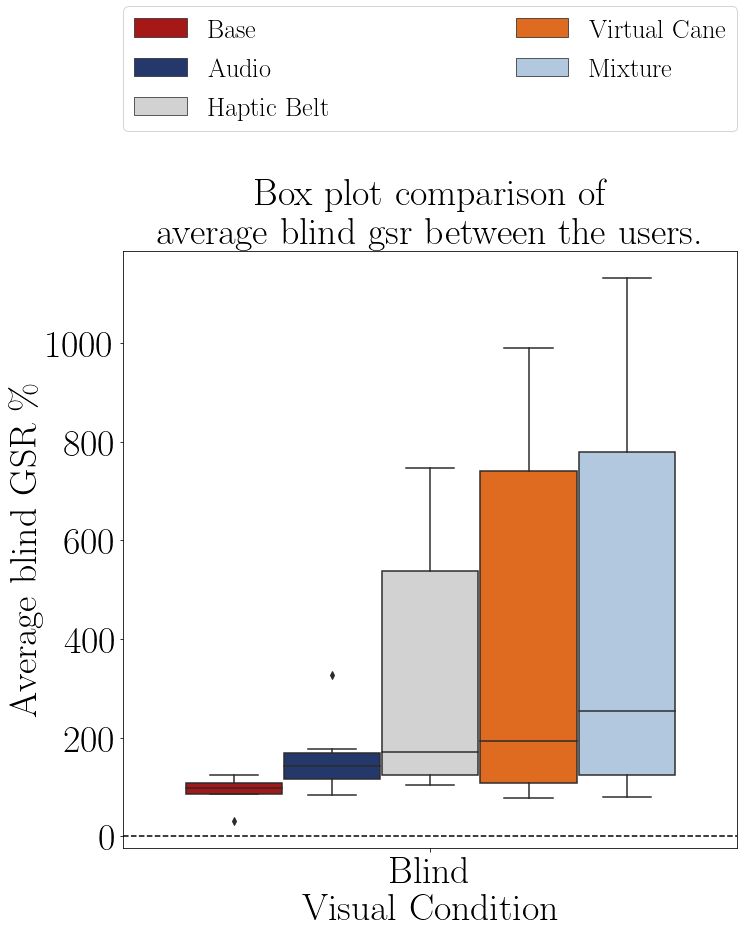

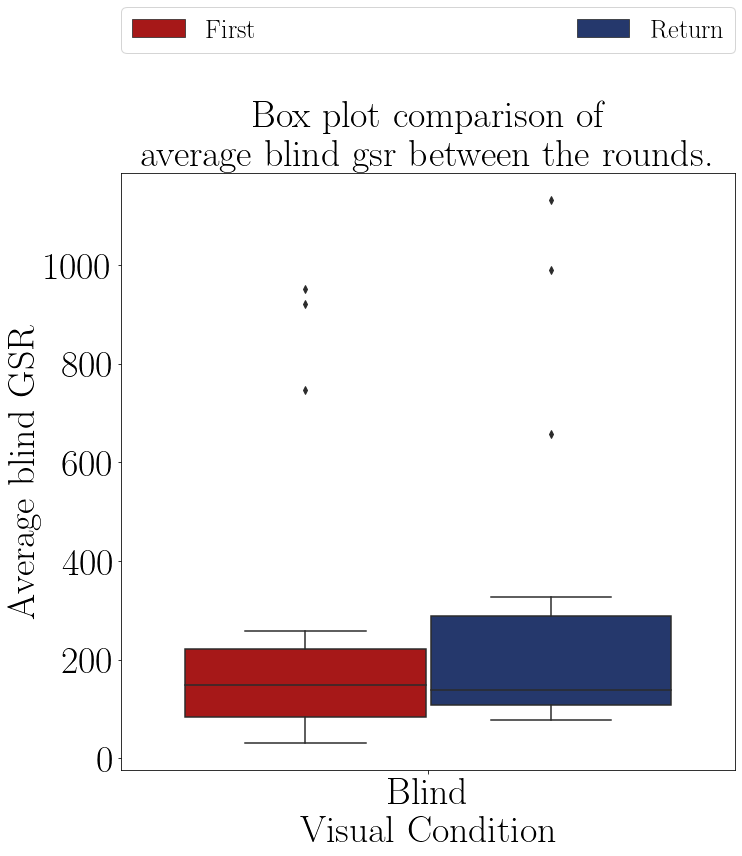

In [117]:
plot = dfGSR_var_cen_etp.reset_index(level = 1).copy()
score = 'average blind gsr'
Score = 'Average blind GSR'
teste = 'GSR'
label = 'gsr_avg_blind'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition','Round'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.axhline(y=0, linestyle='--',color = 'black')
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score + ' \%')
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')

### Box plot da média da demanda mental

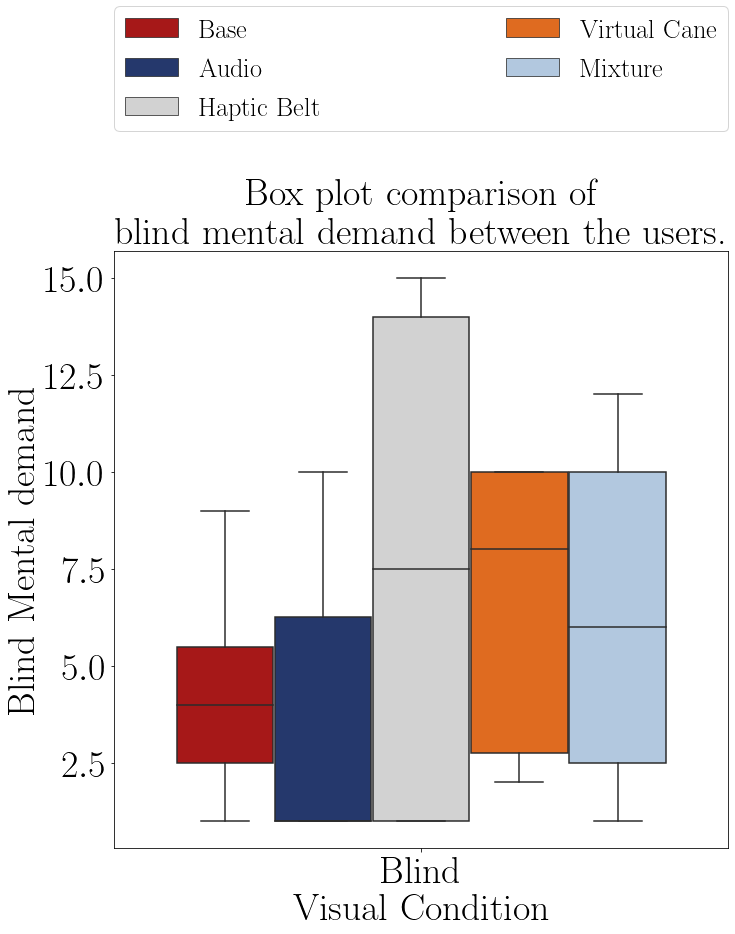

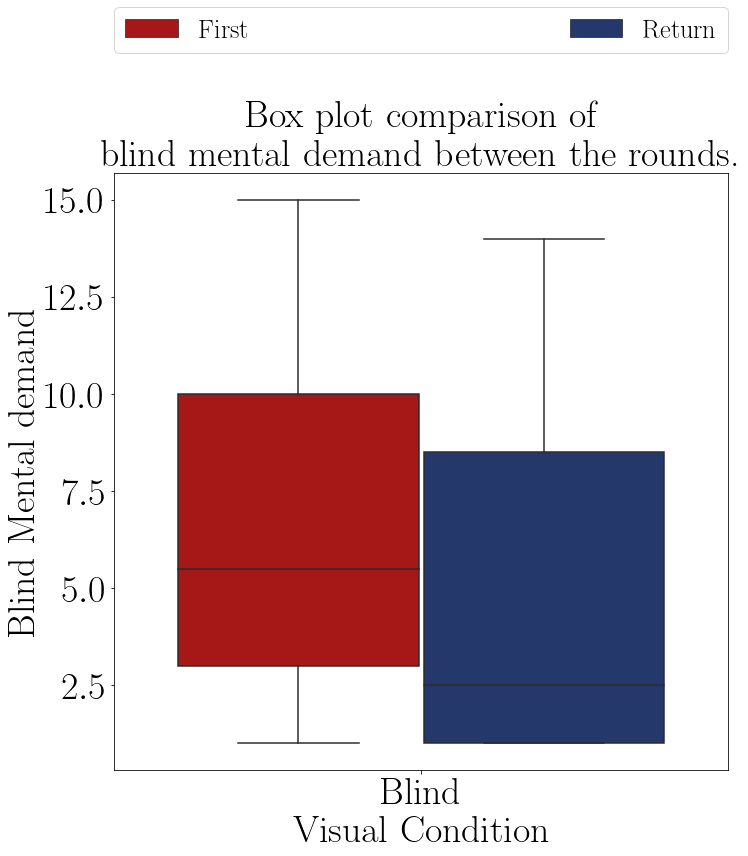

In [118]:
plot = dfMdVariation.reset_index(level = [1,2]).copy()
score = 'blind mental demand'
Score = 'Blind Mental demand'
teste = 'Nasa'
label = 'md_blind'

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot,id_vars = ['Visual Condition','Round'], var_name = 'Scene', value_name = 'Score')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')
plt.show()

### Box plot da média da Carga Mental

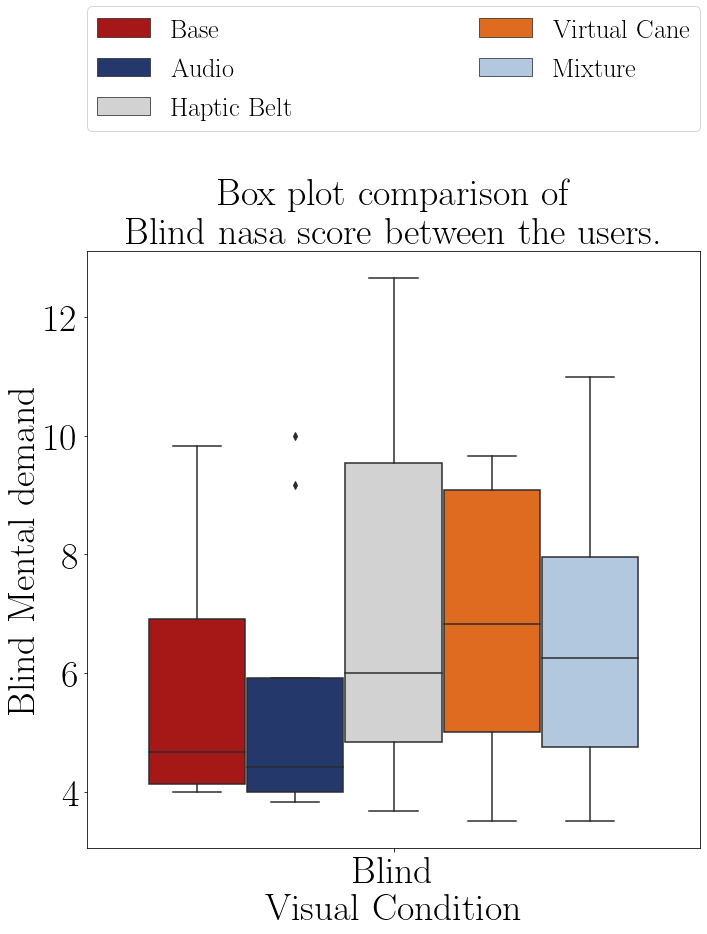

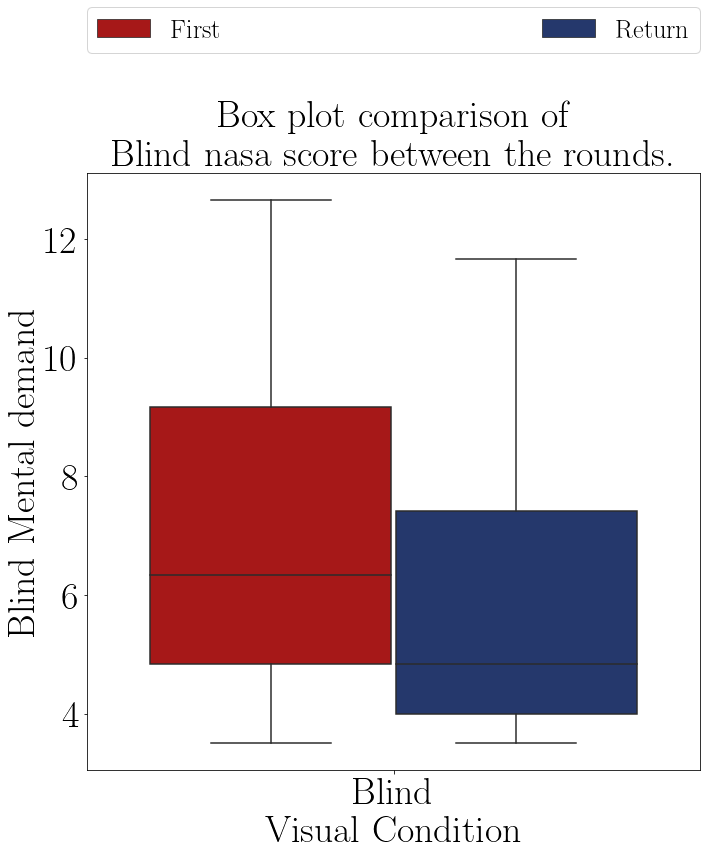

In [119]:
plot = dfCmVariation.reset_index(level = [1,2]).copy()

score = 'blind nasa score'
score = 'Blind nasa score'
teste = 'Nasa'
label = 'nasa_blind'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot,id_vars = ['Visual Condition','Round'], var_name = 'Scene', value_name = 'Score')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')

### Box plot da média do SAGAT

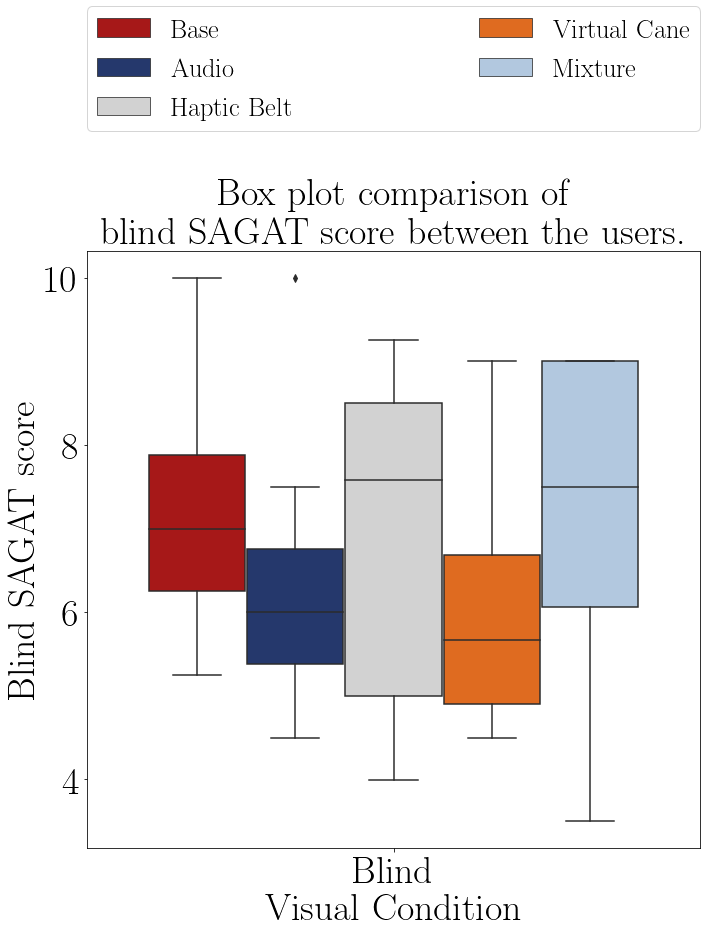

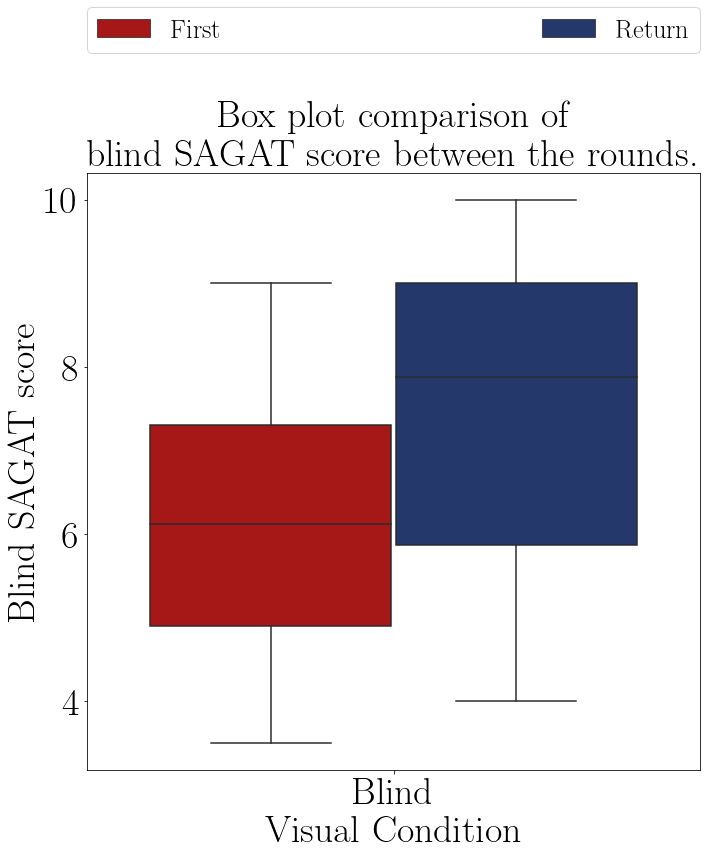

In [120]:
plot = dfSaVariation.reset_index(level = [1,2]).copy()

score = 'blind SAGAT score'
Score = 'Blind SAGAT score'
teste = 'SAGAT'
label = 'sagat_blind'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot,id_vars = ['Visual Condition', 'Round'], var_name = 'Scene', value_name = 'Score')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')

## Gráficos sem a Base

In [121]:
tamanhoBarra5 = [18,7]
tamanhoBarra2 = [10,10]
tamanhoBox = [10,10]

### Gráfico de barra da variação do ECG

#### Frequência cardiaca

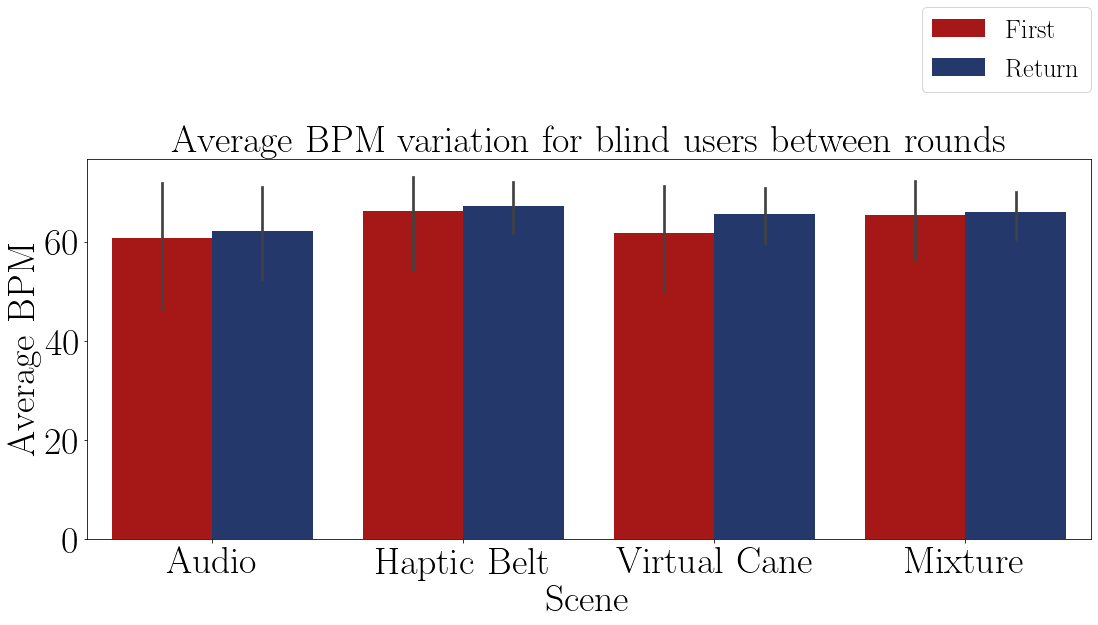

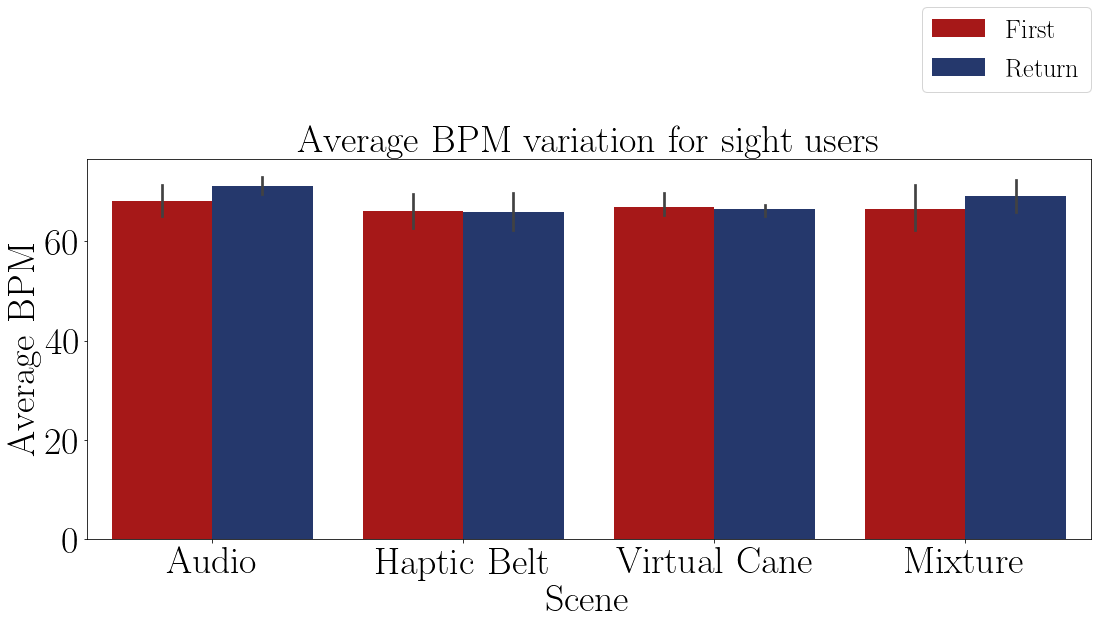

In [122]:
plot = dfECGBPMMedio.drop('Base', axis = 1).reset_index(level = [1,2]).copy()

teste = 'ECG'

score = 'average BPM'
Score = 'Average BPM'
label = 'ecg_bpm_4'

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for sight users')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' variation for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' variation for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()


#### Desvio Padrão entre intervalos

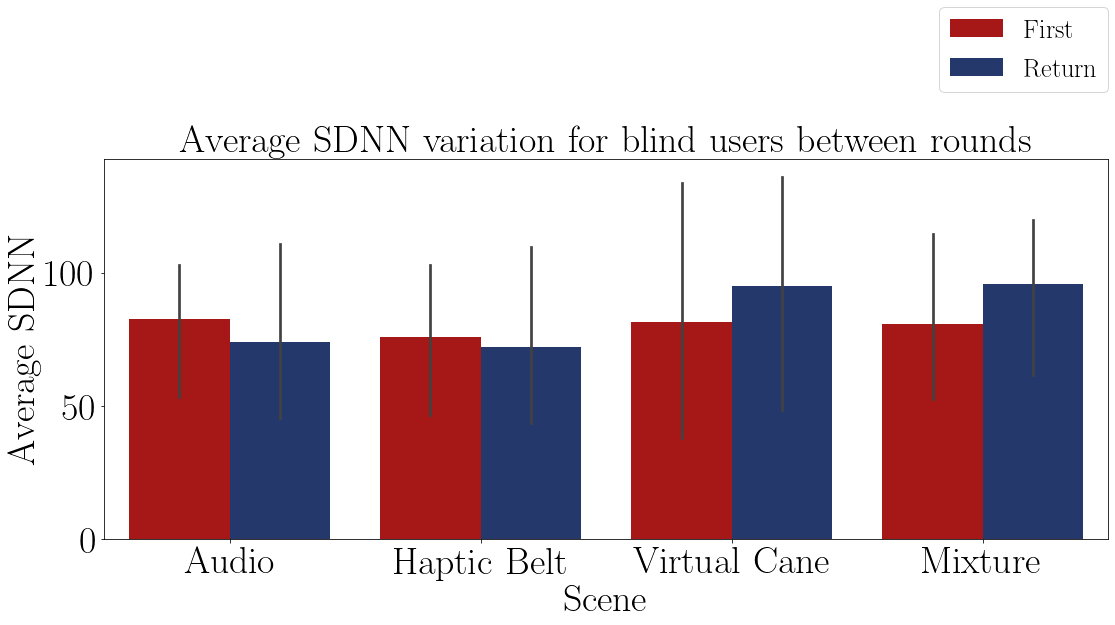

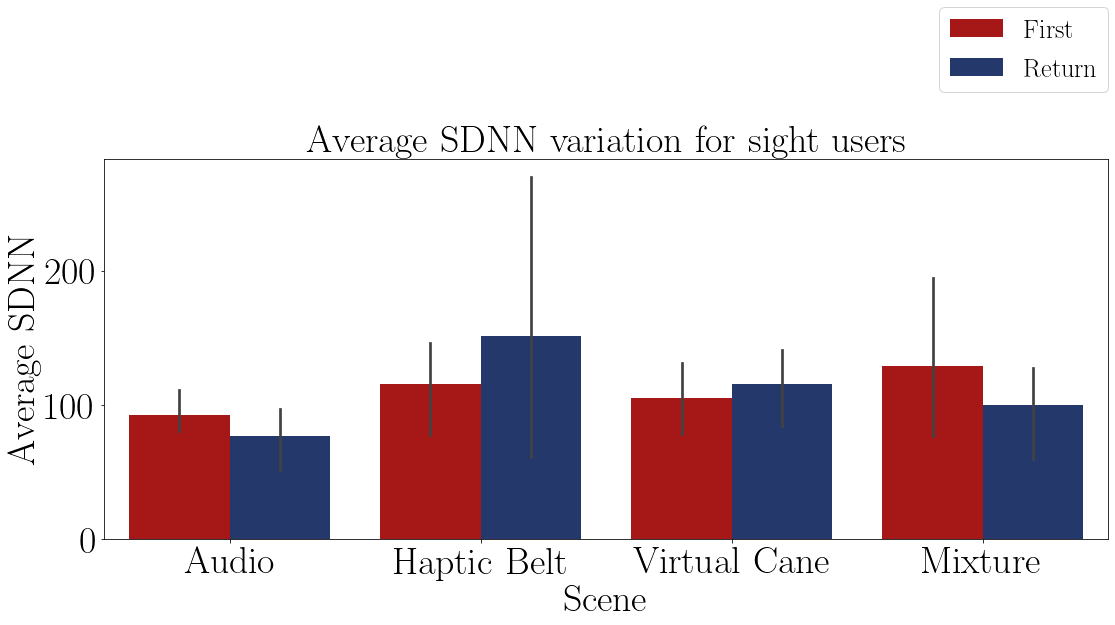

In [123]:
plot = dfECGSDNN.drop('Base', axis = 1).reset_index(level = [1,2]).copy()

teste = 'ECG'

score = 'average SDNN'
Score = 'Average SDNN'
label = 'ecg_sdnn_4'

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for sight users')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' variation for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' variation for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()


### Gráfico de barra da variação do GSR Médio

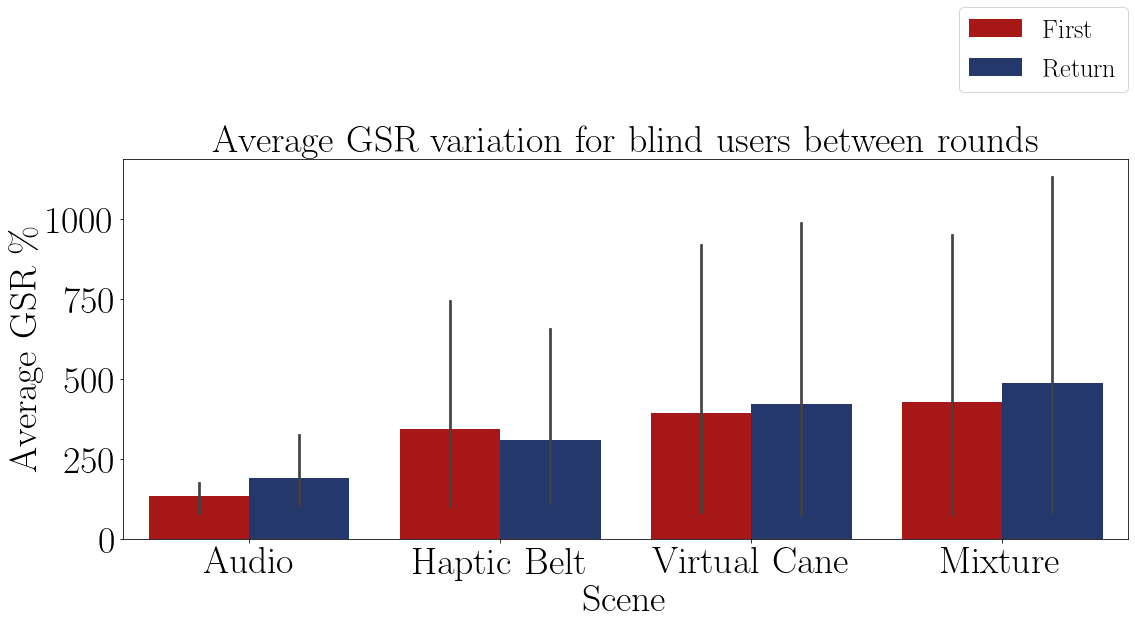

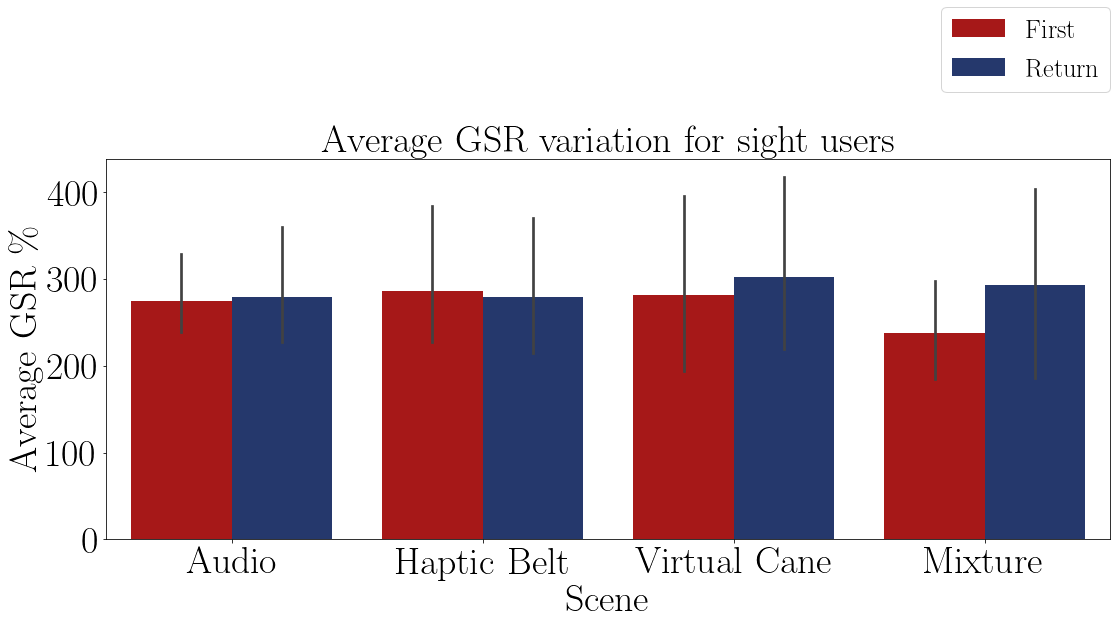

In [124]:
plot = dfGSR_var_cen_etp.reset_index(level = [1,2]).drop('Base', axis = 1).copy()
score = 'average gsr'
Score = 'Average GSR'
teste = 'GSR'
label = 'gsr_avg_4'

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score + ' \%')
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' variation for sight users')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score + ' \%')
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' variation for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score + ' \%')
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' variation for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score + ' \%')
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da média da demanda mental

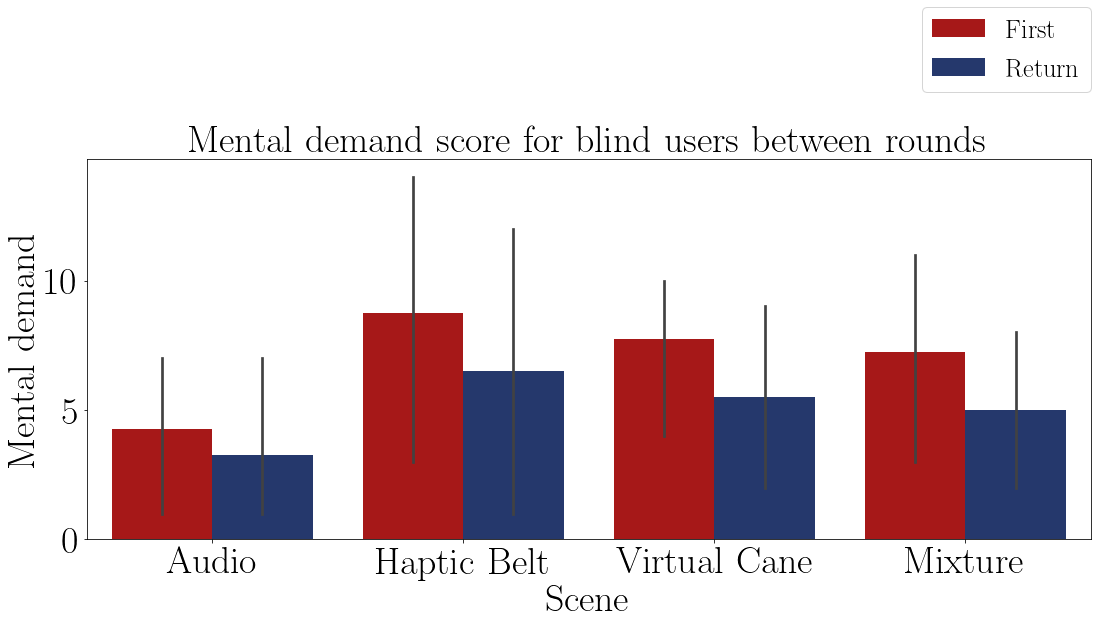

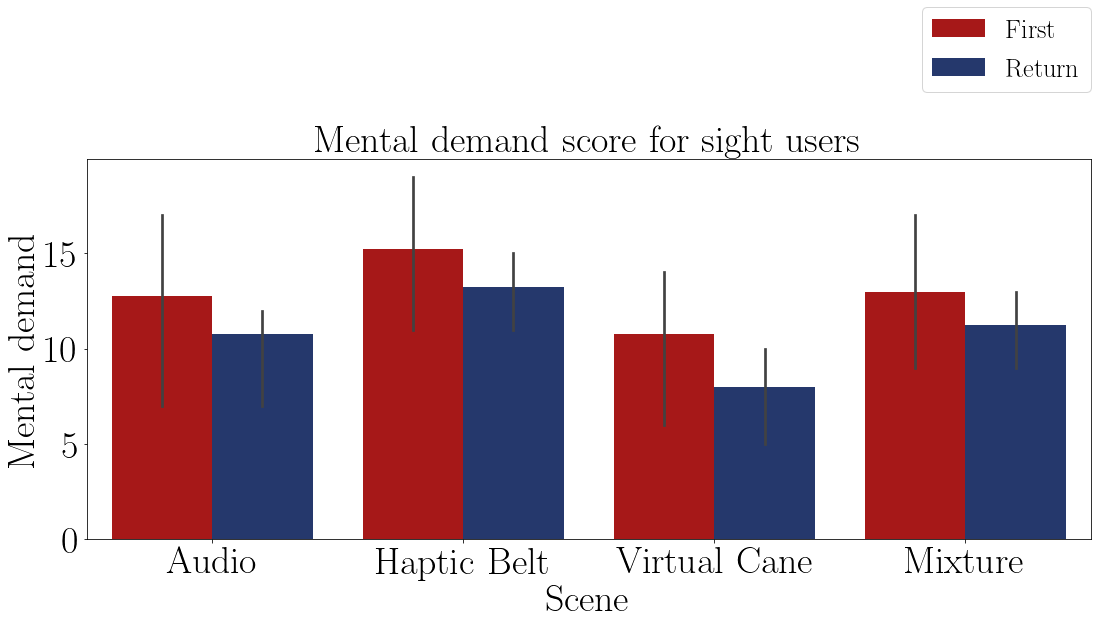

In [125]:
plot = dfMdVariation.reset_index(level = [1,2]).drop('Base', axis = 1).copy()
score = 'mental demand'
Score = 'Mental demand'
teste = 'Nasa'
label = 'md_avg_4'

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' score for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' score for sight users')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' score for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' score for \n blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da média da carga mental

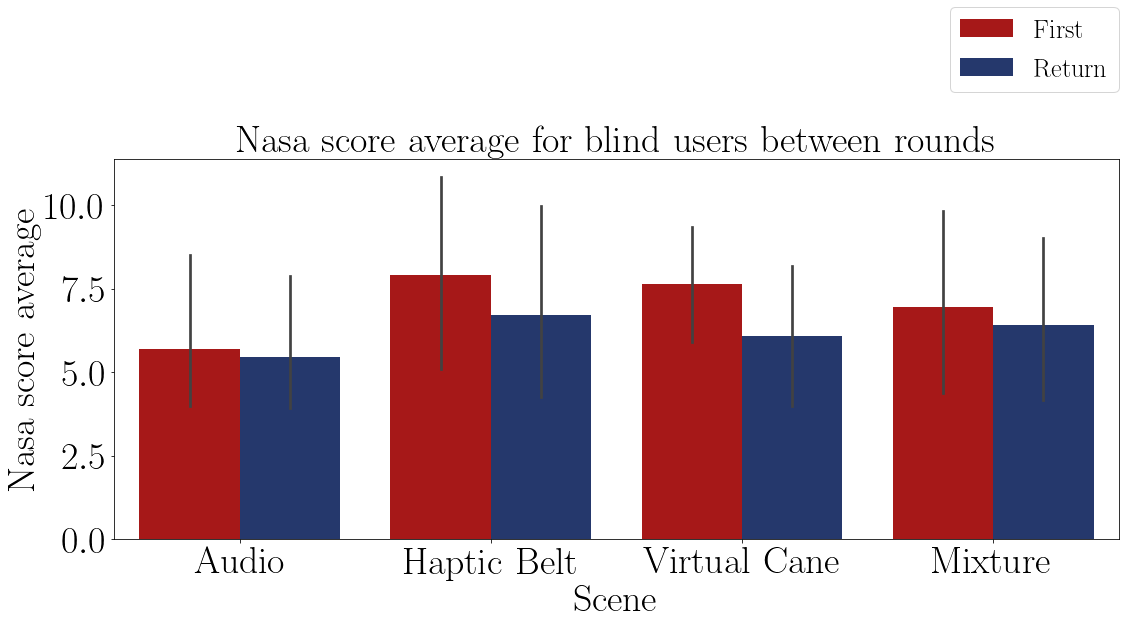

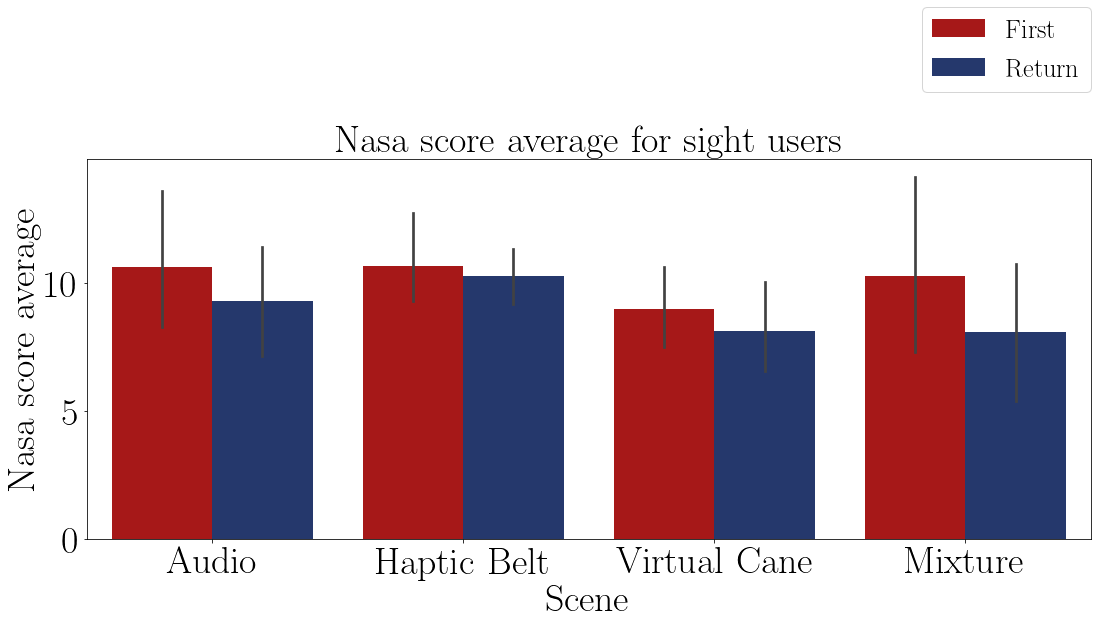

In [126]:
plot = dfCmVariation.reset_index(level = [1,2]).drop('Base', axis = 1).copy()
score = 'nasa score average'
Score = 'Nasa score average'
teste = 'Nasa'
label = 'nasa_avg_4'

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' for sight users')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' for \n blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da média da pontuação do Sagat

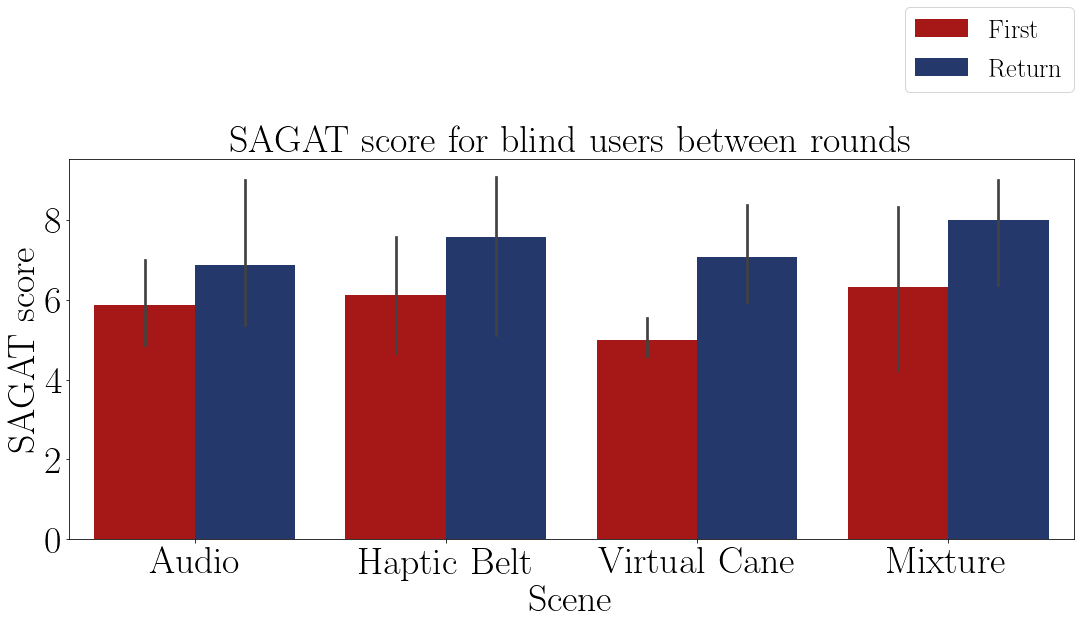

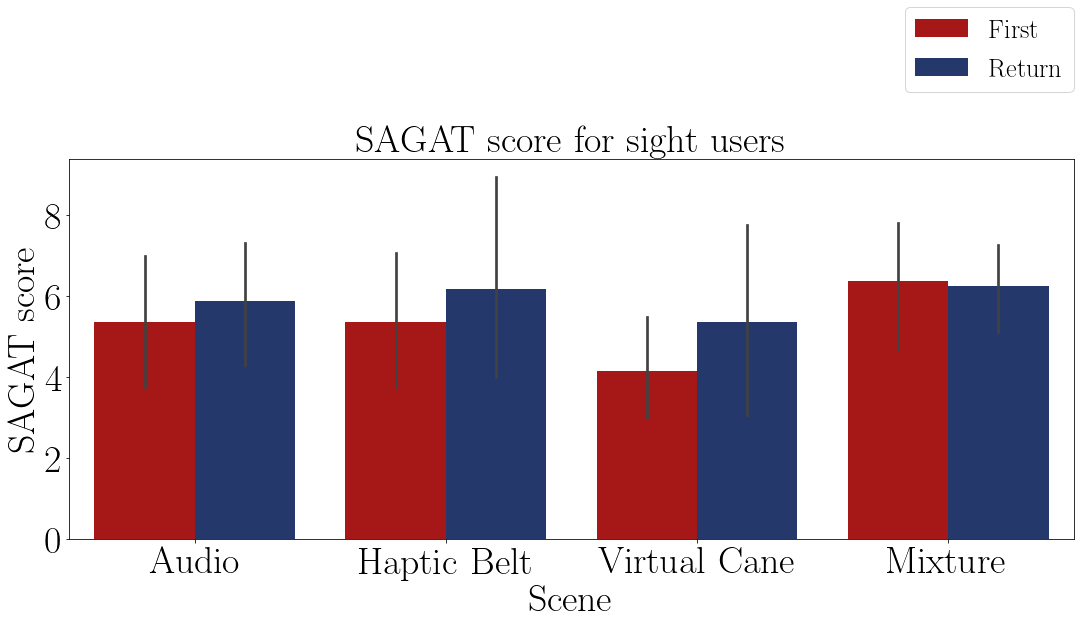

In [127]:
plot = dfSaVariation.drop('Base', axis = 1).reset_index(level = [1,2]).copy()
score = 'SAGAT score'
Score = 'SAGAT score'
teste = 'Sagat'
label = 'sagat_avg_4'

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Round','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' for blind users between rounds')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score', hue = 'Round')
plt.title(Score + ' for sight users')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' for blind and sight users between rounds')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' for \n  blind and sight users')
##plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
#plt.show()

### Gráfico de barra da média da pontuação dos questionários

No handles with labels found to put in legend.


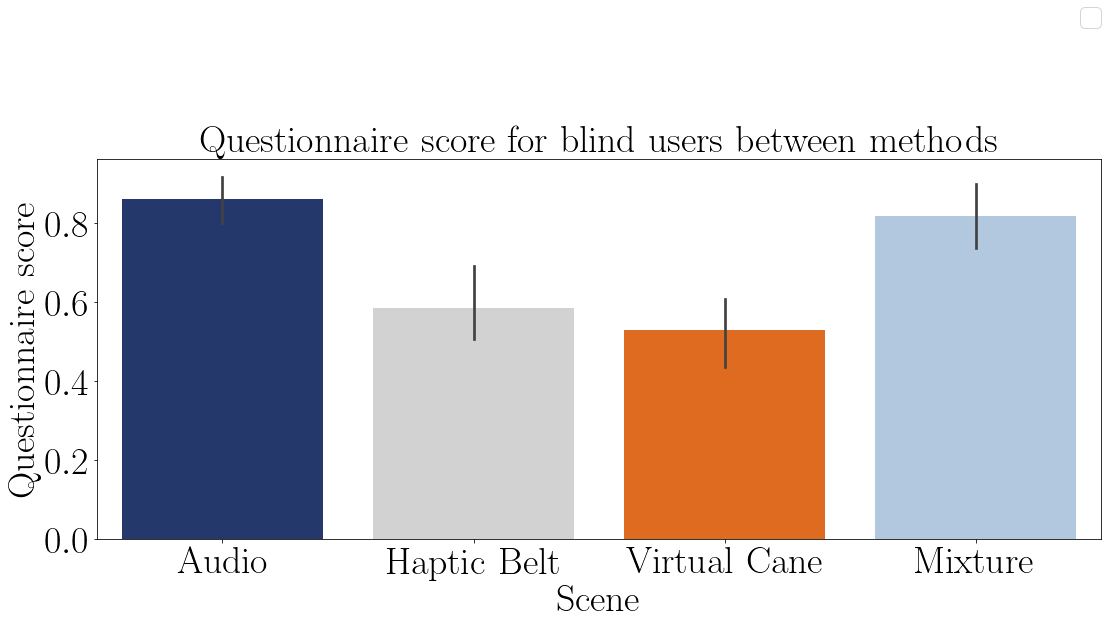

No handles with labels found to put in legend.


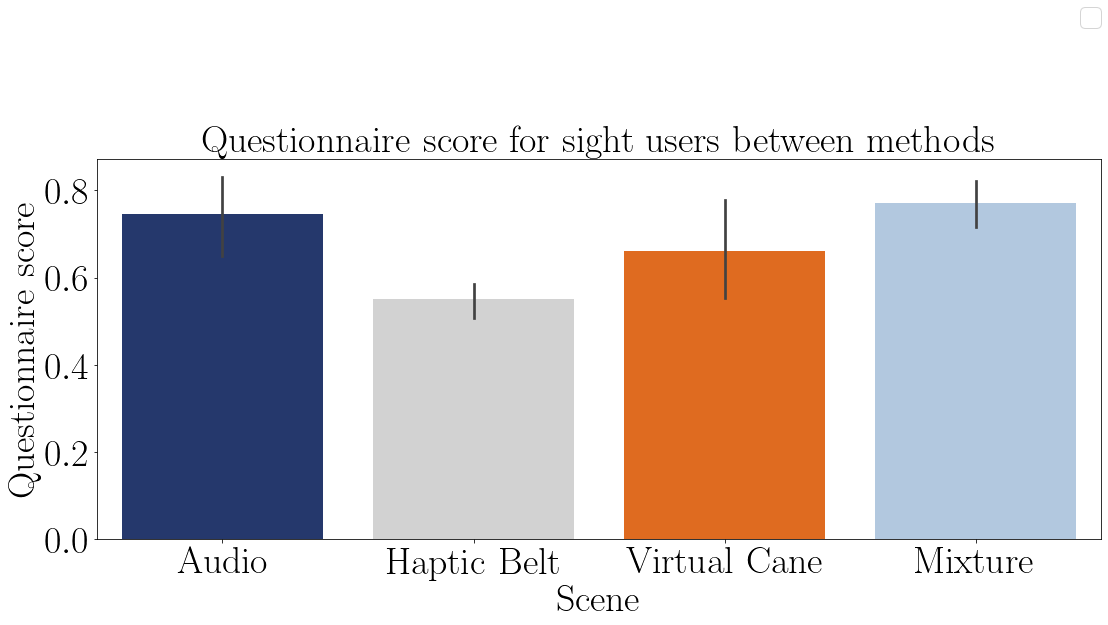

In [128]:
plot = pgQuestionario_media.copy()
score = 'questionnaire score'
Score = 'Questionnaire score'
teste = 'Questionario'
label = 'questionnaire'

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Blind'], x = 'Scene', y = 'Score')
plt.title(Score + ' for blind users between methods')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize = tamanhoBarra5)
sns.barplot(data = mdMelt[mdMelt['Visual Condition'] == 'Sight'], x = 'Scene', y = 'Score')
plt.title(Score + ' for sight users between methods')
plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene_sight.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene_sight.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/barplot_' + label + '_scene_sight.pdf',bbox_inches='tight')
plt.show()

#plt.figure(figsize = tamanhoBarra5)
#sns.barplot(data = mdMelt, x = 'Scene', y = 'Score', hue = 'Visual Condition')
#plt.title(Score + ' comparison between blind and sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel('Average ' + score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_scene.pgf',bbox_inches='tight')
#plt.show()
#
#plt.figure(figsize = tamanhoBarra2)
#sns.barplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Global ' + score + ' score for \n blind and sight users')
#plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right', borderaxespad=0)
#plt.ylabel('Average ' + score)
#plt.savefig(teste + '/Figuras/png/barplot_' + label + '_global.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/barplot_' + label + '_global.pgf',bbox_inches='tight')
#plt.show()

### Box plot da variação do ECG

#### Frequência cardiaca

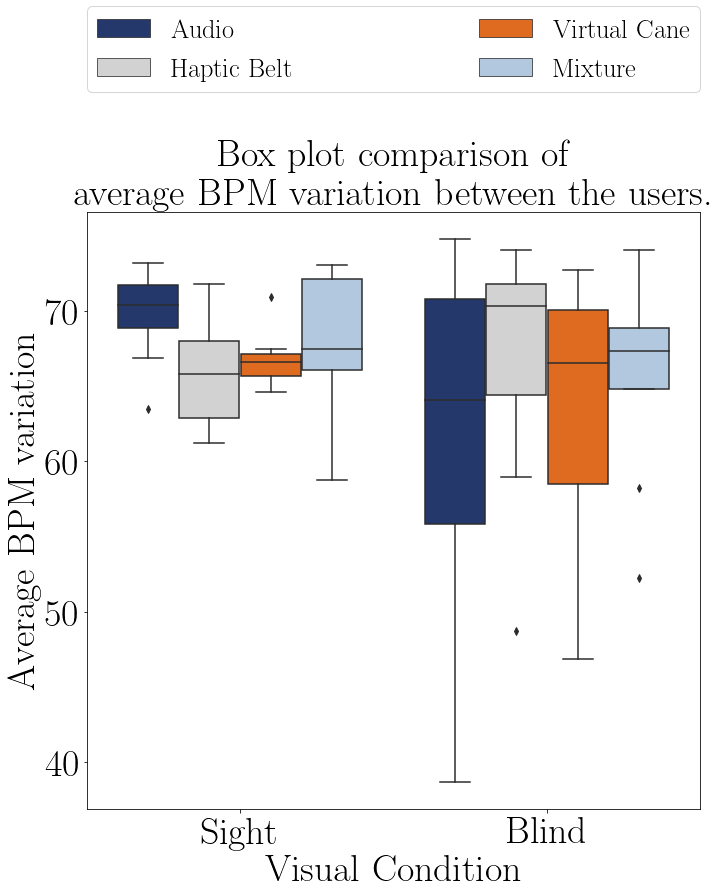

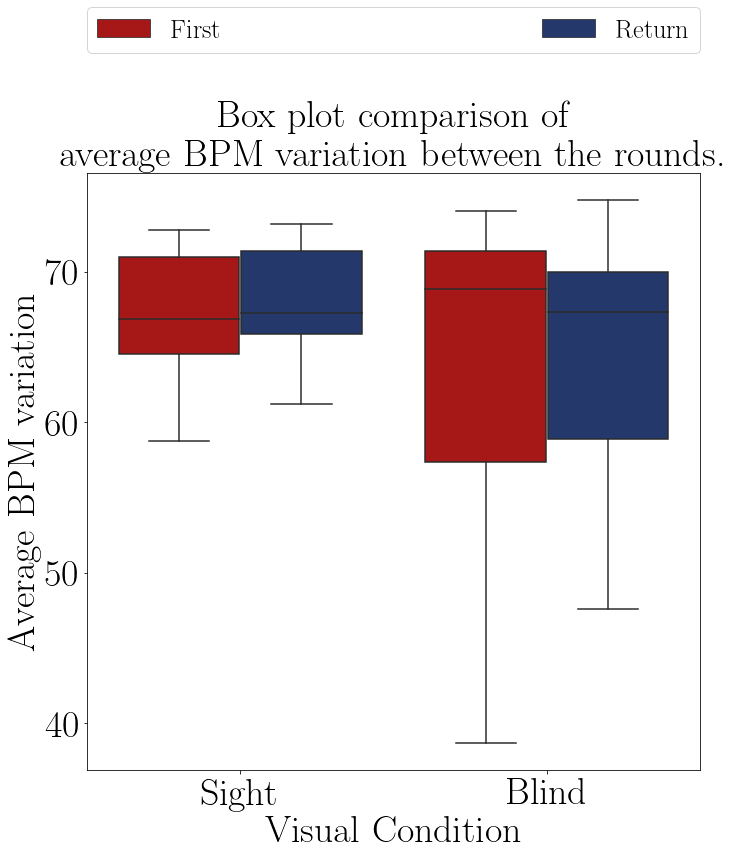

In [129]:
score = 'average BPM variation'
Score = 'Average BPM variation'
teste = 'ECG'
label = 'ecg_bpm_4'

tamanhoBox = [11,11]

if len(dfECGBPMMedio.index.names) == 1:
    plot = dfECGBPMMedio.drop('Base',axis = 1).copy()
else:
    plot = dfECGBPMMedio.reset_index(level = 1).drop('Base',axis = 1).copy()
plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition','Round'], var_name = 'Scene', value_name = 'Score' ,ignore_index=True)
mdMelt.set_index('Participant')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()  

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')
plt.show()

#mdMelt = pd.melt(plot,id_vars = 'Visual Condition', var_name = 'Scene', value_name = 'Score')

#plt.figure(figsize = tamanhoBox)
#sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Box plot comparison of \n the global ' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/boxplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()


#dfECGDadosBPMMedio_var_cen_par
#dfECGDadosSDNN_var_cen_par
#dfECGDadosRMSSD_var_cen_par
#dfECGDadosPNN50_var_cen_par
#dfECGDadosLFHF_var_cen_par



#### Desvio Padrão entre intervalos

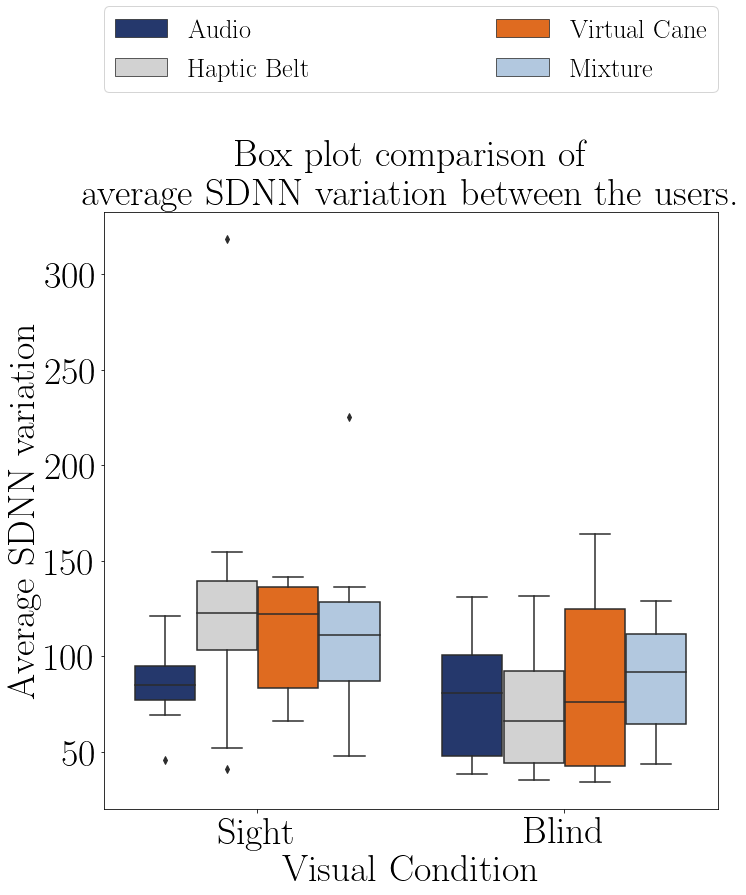

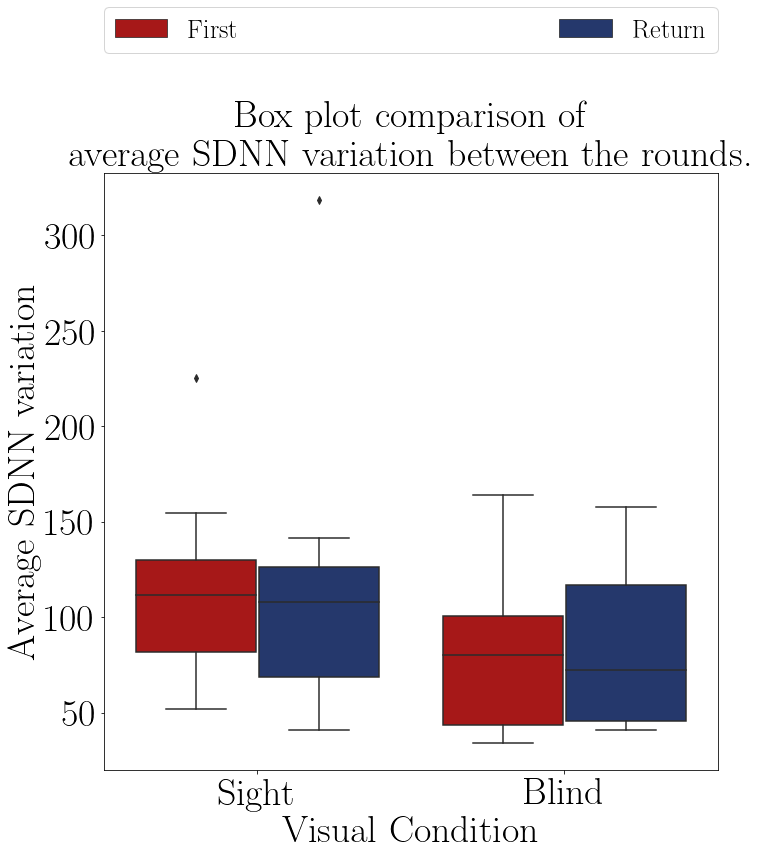

In [130]:
score = 'average SDNN variation'
Score = 'Average SDNN variation'
teste = 'ECG'
label = 'ecg_sdnn_4'

tamanhoBox = [11,11]

if len(dfECGBPMMedio.index.names) == 1:
    plot = dfECGSDNN.drop('Base',axis = 1).copy()
else:
    plot = dfECGSDNN.reset_index(level = 1).drop('Base',axis = 1).copy()
plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition','Round'], var_name = 'Scene', value_name = 'Score' ,ignore_index=True)
mdMelt.set_index('Participant')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
#plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()  

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')
plt.show()


#mdMelt = pd.melt(plot,id_vars = 'Visual Condition', var_name = 'Scene', value_name = 'Score')
#
#plt.figure(figsize = tamanhoBox)
#sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Box plot comparison of \n the global ' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
#plt.ylabel(Score)
#plt.savefig(teste + '/Figuras/png/boxplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()

#dfECGDadosBPMMedio_var_cen_par
#dfECGDadosSDNN_var_cen_par
#dfECGDadosRMSSD_var_cen_par
#dfECGDadosPNN50_var_cen_par
#dfECGDadosLFHF_var_cen_par



### Box plot da variação do GSR Médio

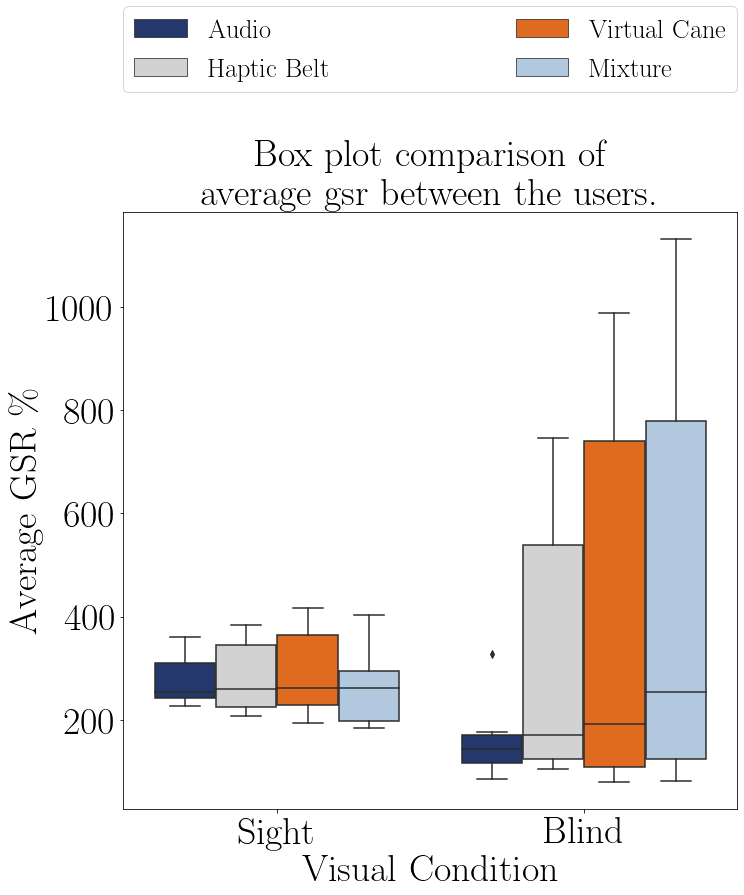

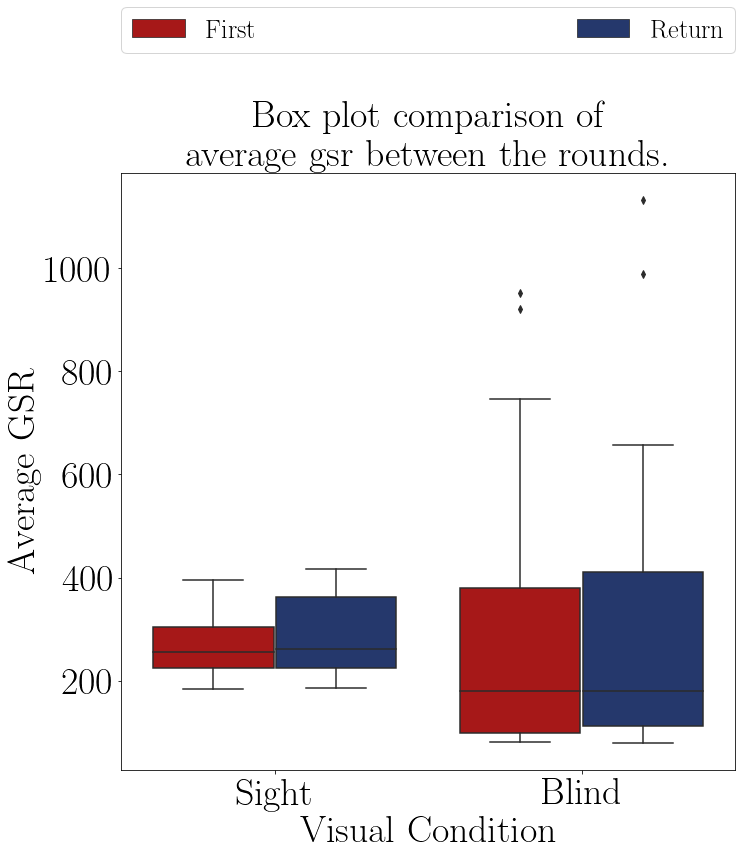

In [131]:
plot = dfGSR_var_cen_etp.reset_index(level = [1,2]).drop('Base',axis = 1).copy()
score = 'average gsr'
Score = 'Average GSR'
teste = 'GSR'
label = 'gsr_avg_4'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

mdMelt = pd.melt(plot.reset_index(),id_vars = ['Participant','Visual Condition','Round'], var_name = 'Scene', value_name = 'Score',ignore_index=True)
mdMelt.set_index('Participant')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
#plt.axhline(y=0, linestyle='--',color = 'black')
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score + ' \%')
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

#plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
#plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"
#
#mdMelt = pd.melt(plot,id_vars = 'Visual Condition', var_name = 'Scene', value_name = 'Score')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')

### Box plot da média da demanda mental

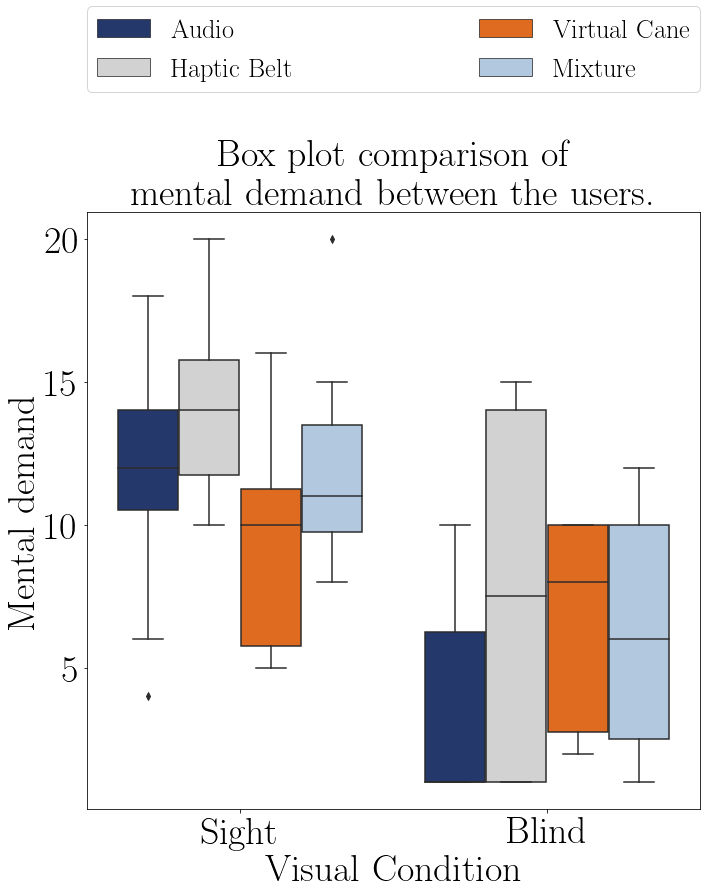

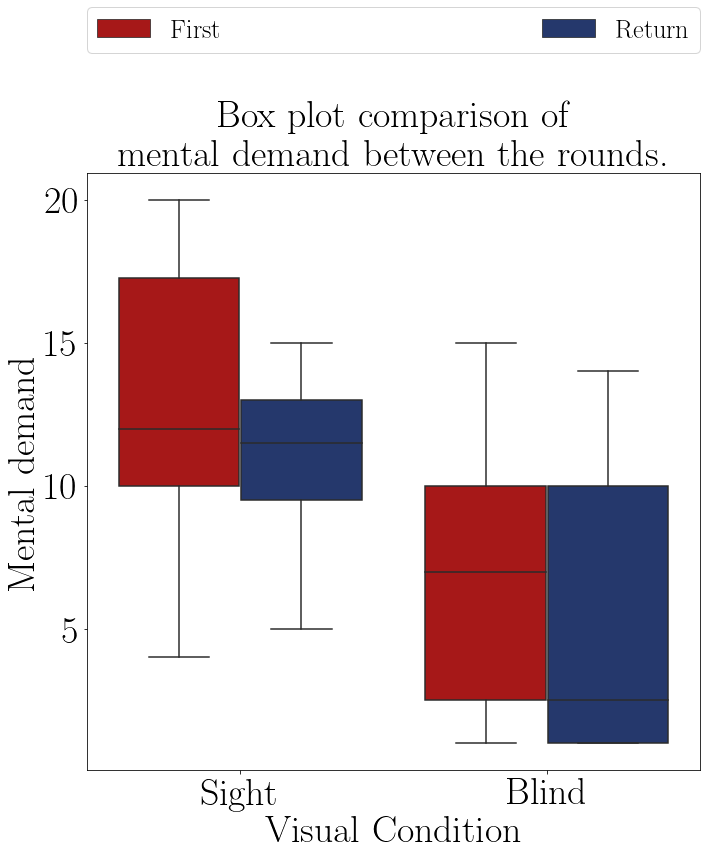

In [132]:
plot = dfMdVariation.reset_index(level = [1,2]).drop('Base',axis = 1).copy()
score = 'mental demand'
Score = 'Mental demand'
teste = 'Nasa'
label = 'noBase_md_4'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

mdMelt = pd.melt(plot,id_vars = ['Visual Condition','Round'], var_name = 'Scene', value_name = 'Score')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

#plt.figure(figsize = tamanhoBox)
#sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Box plot comparison of \n the global ' + score + ' between the users.')
##plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
#plt.ylabel('Average ' + score)
#plt.savefig(teste + '/Figuras/png/boxplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')
plt.show()

### Box plot da média da Carga Mental

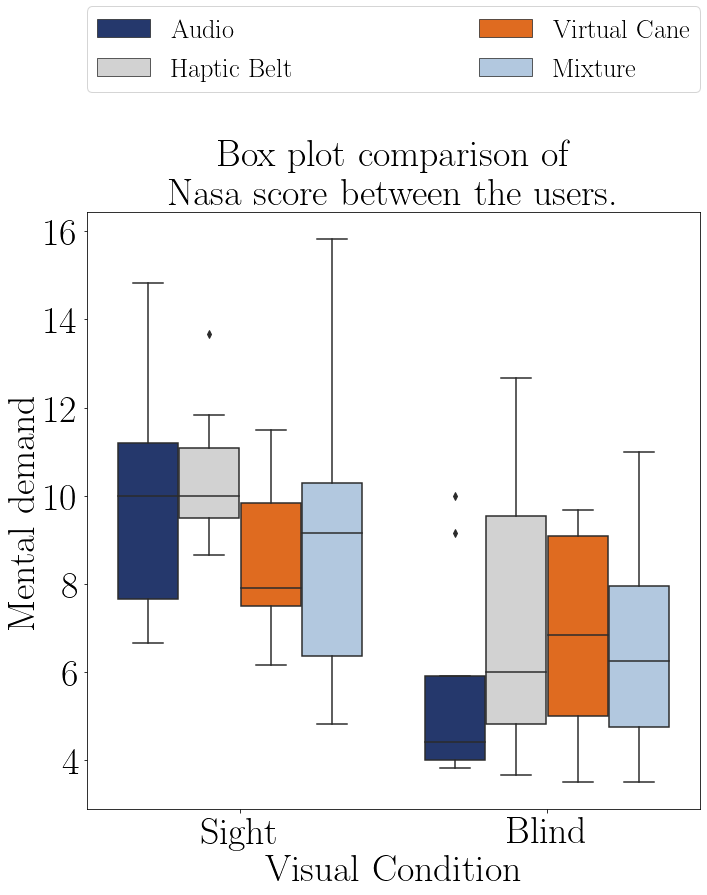

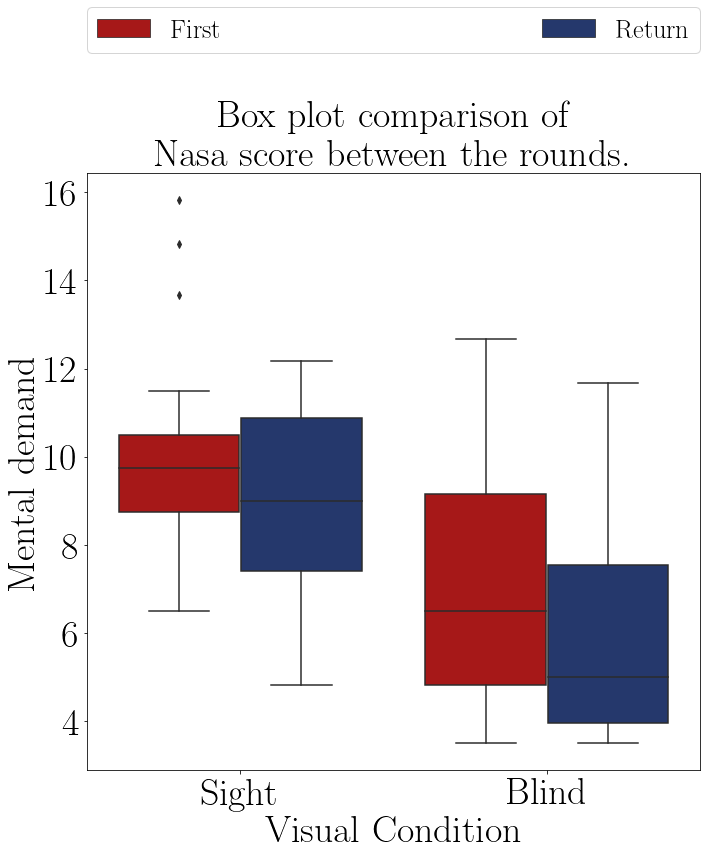

In [133]:
plot = dfCmVariation.reset_index(level = [1,2]).drop('Base',axis = 1).copy()

score = 'nasa score'
score = 'Nasa score'
teste = 'Nasa'
label = 'noBase_nasa_4'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

mdMelt = pd.melt(plot,id_vars = ['Visual Condition','Round'], var_name = 'Scene', value_name = 'Score')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

#plt.figure(figsize = tamanhoBox)
#sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Box plot comparison of \n the global ' + score + ' between the users.')
##plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
#plt.ylabel('Average ' + score)
#plt.savefig(teste + '/Figuras/png/boxplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')
plt.show()

### Box plot da média do SAGAT

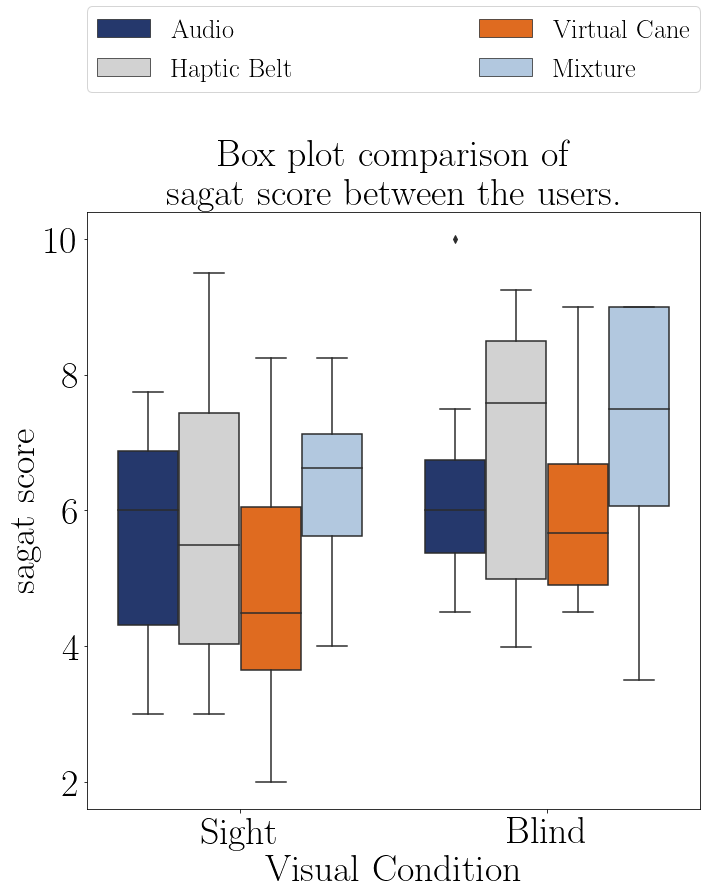

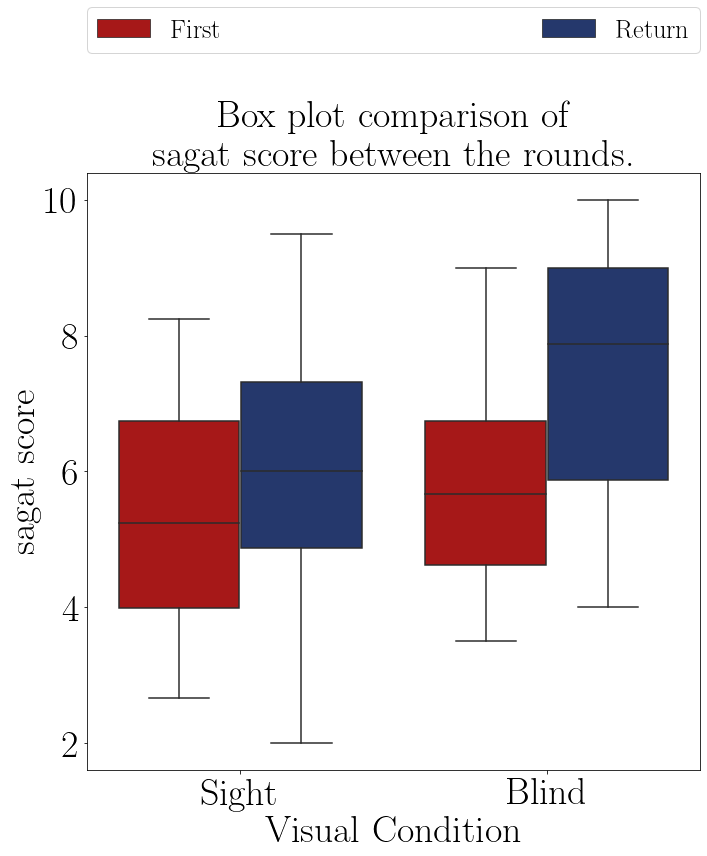

In [134]:
plot = dfSaVariation.reset_index(level = [1,2]).drop('Base',axis = 1).copy()

score = 'sagat score'
Score = 'sagat score'
teste = 'SAGAT'
label = 'sagat_4'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

mdMelt = pd.melt(plot,id_vars = ['Visual Condition', 'Round'], var_name = 'Scene', value_name = 'Score')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot,id_vars = ['Visual Condition', 'Round'], var_name = 'Scene', value_name = 'Score')

#plt.figure(figsize = tamanhoBox)
#sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
#plt.title('Box plot comparison of \n the global ' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
#plt.ylabel('Average ' + score)
#plt.savefig(teste + '/Figuras/png/boxplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '.pgf',bbox_inches='tight')
#plt.show()

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Round")
plt.title('Box plot comparison of \n' + score + ' between the rounds.')
#plt.legend(mode = 'expand') #, loc='upper right', bbox_to_anchor=(1.35, 1.45), borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel(Score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_rounds.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_rounds.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_rounds.pdf',bbox_inches='tight')
plt.show()

### Box plot da média dos Questionario

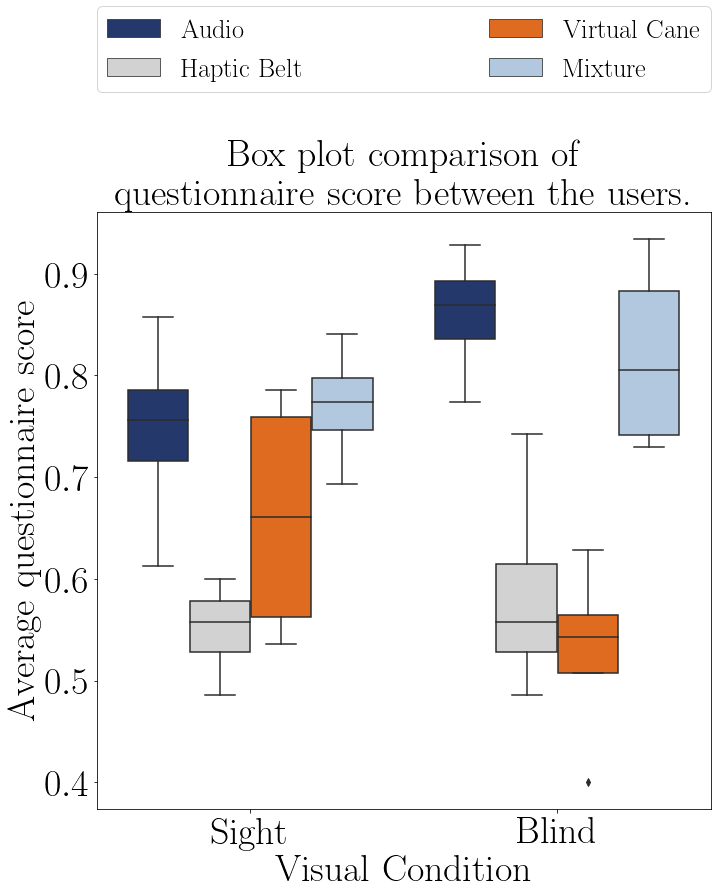

No handles with labels found to put in legend.


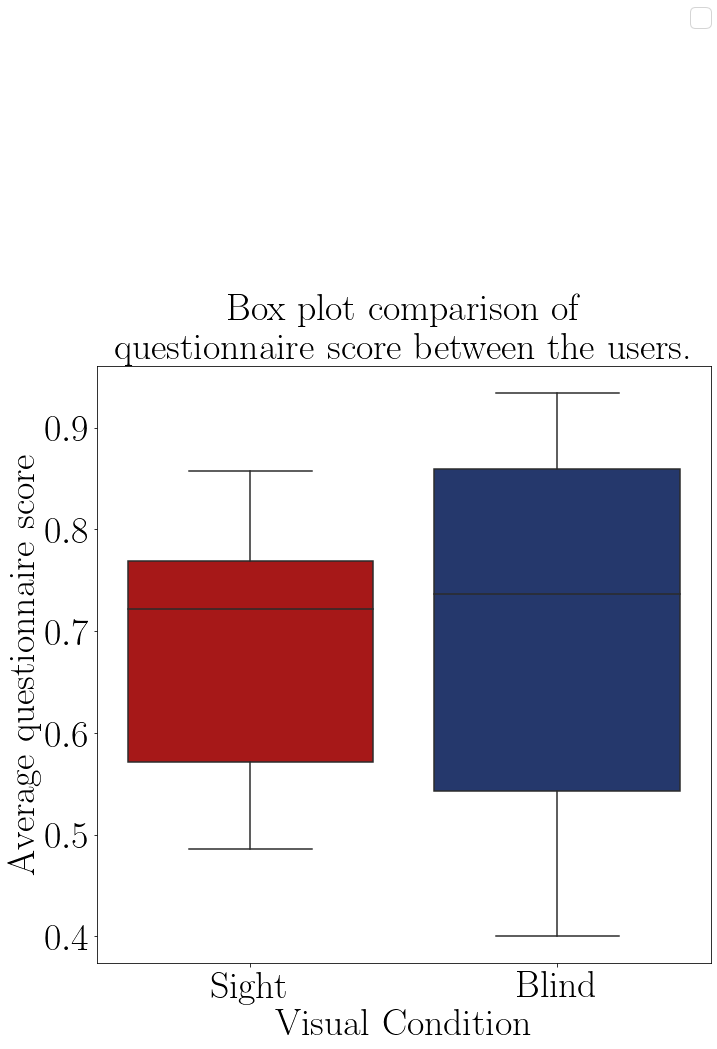

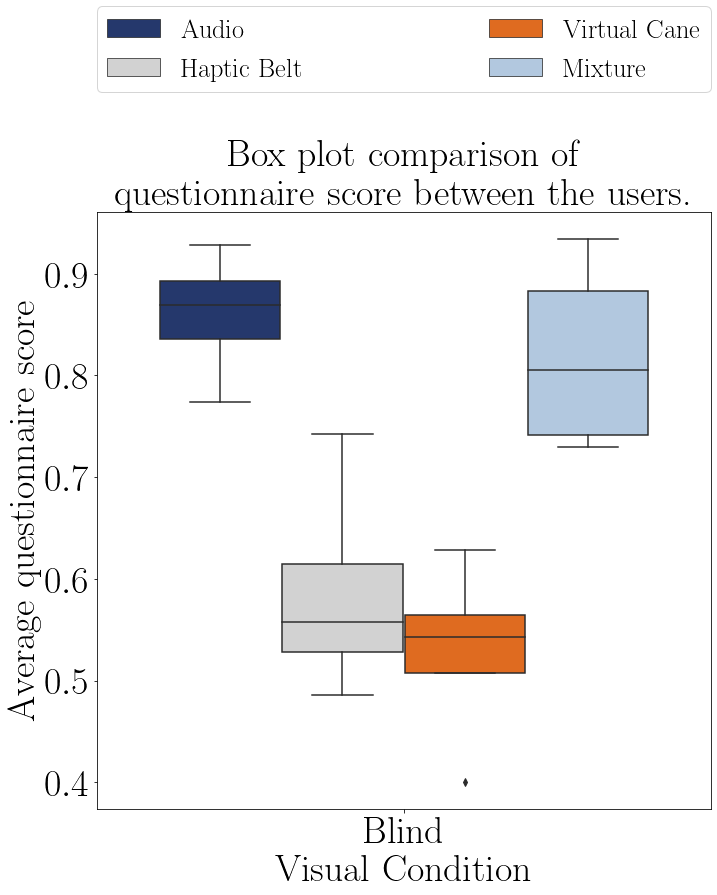

In [135]:
plot = pgQuestionario_media.copy()

score = 'questionnaire score'
Score = 'Questionnaire score'
teste = 'Questionario'
label = 'questionnaire'

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

mdMelt = pd.melt(plot,id_vars = 'Visual Condition', var_name = 'Scene', value_name = 'Score')

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
#plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Average ' + score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene.pdf',bbox_inches='tight')
plt.show()

plot.loc[plot['Visual Condition'] == 0, 'Visual Condition'] = "Sight"
plot.loc[plot['Visual Condition'] == 1, 'Visual Condition'] = "Blind"

# Create an array with the colors you want to use
paletaCores = [cor1,cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

mdMelt = pd.melt(plot,id_vars = 'Visual Condition', var_name = 'Scene', value_name = 'Score')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score')
plt.title('Box plot comparison of \n' + score + ' between the users.')
plt.legend(bbox_to_anchor=(1, 1.6), loc='upper right', borderaxespad=0)
plt.ylabel('Average ' + score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '.pdf',bbox_inches='tight')
plt.show()

# Create an array with the colors you want to use
paletaCores = [cor2,cor3,cor4,cor5,cor6,cor7]
# Set your custom color palette
sns.set_palette(sns.color_palette(paletaCores))

plot = pgQuestionario_media.copy()
plot = plot[plot['Visual Condition'] == 'Blind']

mdMelt = pd.melt(plot,id_vars = 'Visual Condition', var_name = 'Scene', value_name = 'Score')

plt.figure(figsize = tamanhoBox)
sns.boxplot(data = mdMelt, x = 'Visual Condition', y = 'Score', hue = "Scene")
plt.title('Box plot comparison of \n' + score + ' between the users.')
plt.legend(bbox_to_anchor=(0., 1.20, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel('Average ' + score)
plt.savefig(teste + '/Figuras/png/boxplot_' + label + '_scene_blind.png',bbox_inches='tight')
#plt.savefig(teste + '/Figuras/boxplot_' + label + '_scene_blind.pgf',bbox_inches='tight')
plt.savefig(teste + '/Figuras/pdf/boxplot_' + label + '_scene_blind.pdf',bbox_inches='tight')
plt.show()